In [1]:
import MySQLdb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns

In [2]:
myvars = {}
with open("epampana-mysql-password") as myfile:
    for line in myfile:
        name, var = line.partition(":")[::2]
        myvars[name.strip()] = var.strip()

myvars.keys()

# print("#",myvars['DB username'],"#", "#",myvars['DB password'],"#", "#",myvars['DB databasename'],"#")

import MySQLdb
conn = MySQLdb.connect(host="localhost", user=myvars['DB username'], passwd=myvars['DB password'], db='I501Fa21grp04_db')
cursor = conn.cursor()
# cursor = conn.cursor()
# cursor.execute('select * from `characteristics_combined_data`')
# accident_circumstance = cursor.fetchall()

accident_circumstance = pd.read_sql('select * from `characteristics_combined_data1`',conn)
accident_location = pd.read_sql('SELECT * FROM `places_combined_data1`',conn)
people_accident = pd.read_sql('SELECT * FROM `users_combined_data1`',conn)
accident_vehicle = pd.read_sql('SELECT * FROM `vechicles_combined_data1`',conn)
# accident_circumstance.axes
# accident_circumstance.mode()



In [3]:
# saved file in csv
accident_circumstance.to_csv('accident_circumstance.csv', encoding='utf-8')
accident_location.to_csv('accident_location.csv', encoding='utf-8')
people_accident.to_csv('people_accident.csv', encoding='utf-8')
accident_vehicle.to_csv('accident_vehicle.csv', encoding='utf-8')

In [4]:
accident_circumstance1 = accident_circumstance.copy()
accident_circumstance1.to_csv('accident_circumstance1.csv', encoding='utf-8')

In [5]:
accident_circumstance1.tail()

,Num_Acc,accident_year,accident_month,accident_day,hrmn,light_conditions,location,intersection:,atmospheric_condition,collision_type,municipality,postal_address,gps,latitude,longitude,dept
1015944,201900058836,2019,11,30,09:00,1,1,1,5,2,69288,A43 13.029 A 15.971,None,"45,6666600","5,0561200",69
1015945,201900058837,2019,11,27,07:50,1,1,1,8,4,67482,Autoroute A.35,None,"48,5769000","7,7269000",67
1015946,201900058838,2019,11,30,02:41,4,1,1,1,6,94021,AUTOROUTE A6A,None,"48,7717000","2,3457600",94
1015947,201900058839,2019,11,30,15:20,1,1,1,1,7,78640,A86 EXT,None,"48,7772890","2,2237590",78
1015948,201900058840,2019,11,29,20:50,3,1,1,1,2,92047,A13,None,"48,8351236","2,1751101",92


In [6]:
# Merging 4 tables into 1
accident_circumstance1 = accident_circumstance1.merge(accident_location, on=['Num_Acc'], how= 'inner')
accident_circumstance1 = accident_circumstance1.merge(people_accident, on=['Num_Acc'], how= 'inner')
accident_circumstance1 = accident_circumstance1.merge(accident_vehicle, on=['Num_Acc'], how= 'inner')
accident_circumstance1.to_csv('accident_circumstance1.csv', encoding='utf-8')



In [7]:
accident_circumstance1

,Num_Acc,accident_year,accident_month,accident_day,hrmn,light_conditions,location,intersection:,atmospheric_condition,collision_type,...,pedestrian_action,injured_pedestrian_alone_or_not,flow_direction,vechicle_category,number_of_occupants_in_public_transport,fixed_obstacle_struck,movable_obstacle_struck,Initial_shock_point,manv_before_accident,num_veh_y
0,200500000001,5,1,12,1900,3,2,1,1,3,...,0,0,0,7,000,00,2,1,01,A01
1,200500000002,5,1,21,1600,1,2,1,1,1,...,0,0,0,7,000,00,2,7,16,A01
2,200500000003,5,1,21,1845,3,1,1,2,1,...,0,0,0,2,000,00,2,1,01,A01
3,200500000004,5,1,4,1615,1,1,1,1,5,...,0,0,0,7,000,00,2,1,13,A01
4,200500000005,5,1,10,1945,3,1,1,3,6,...,0,0,0,7,000,06,0,8,01,A01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1338194,201900030058,2019,9,2,19:00,1,1,1,1,7,...,0,-1,2,33,,00,0,0,1,A01
1338195,201900030059,2019,9,4,16:35,1,2,4,1,4,...,0,-1,1,15,,00,2,2,12,A01
1338196,201900030060,2019,9,4,08:50,1,2,1,1,4,...,0,-1,2,7,,00,2,7,12,A01
1338197,201900030061,2019,9,3,06:25,2,2,4,1,2,...,0,-1,1,33,,00,2,1,2,A01


In [8]:
#Removing 2019 from the data
# accident_circumstance1.drop(accident_circumstance1['year' == '2019'].index)
# accident_circumstance1[accident_circumstance1['year'] == '2019']

In [9]:
accident_circumstance1 = pd.read_csv('accident_circumstance1.csv', sep=',', header=0, na_values = ['na', '-', '.', '']) 

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3343: DtypeWarning: Columns (5,11,14,15,16,18,20,25,26,34,47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [10]:
print('Row count     :',accident_circumstance1.shape[0])
print('Column count  :',accident_circumstance1.shape[1])
print('\nList of Features :\n     :',accident_circumstance1.columns.tolist())
print('\nMissing values    :',accident_circumstance1.isnull().sum())
print('\nActual values    :',accident_circumstance1.notnull().values.sum())
print('\nUnique values :  \n',accident_circumstance1.nunique())

Row count     : 1338199
Column count  : 57

List of Features :
     : ['Unnamed: 0', 'Num_Acc', 'accident_year', 'accident_month', 'accident_day', 'hrmn', 'light_conditions', 'location', 'intersection:', 'atmospheric_condition', 'collision_type', 'municipality', 'postal_address', 'gps', 'latitude', 'longitude', 'dept', 'road_category', 'route_number', 'numerical_index_of_the road', 'alphanumeric_road_index', 'traffic_regime', 'total_number_of_traffic_lanes', 'reserved_lane', 'road_gradient', 'upstream_terminal', 'dist_from_upstream_terminal', 'plan', 'width_of_central_reservation', 'road_width', 'surface_condition', 'infrastructure', 'accident_situation', 'env1', 'id_vehicule', 'num_veh_x', 'place', 'user_category', 'severity_of_user_injury', 'gender', 'driver_birthyr', 'reason_for_travel', 'secu', 'security_equipement_1', 'security_equipement_2', 'secu3', 'pedestrian_location', 'pedestrian_action', 'injured_pedestrian_alone_or_not', 'flow_direction', 'vechicle_category', 'number_of_oc

In [11]:
accident_circumstance1.isnull().sum()

Unnamed: 0                                       0
Num_Acc                                          0
accident_year                                    0
accident_month                                   0
accident_day                                     0
hrmn                                             0
light_conditions                                 0
location                                         0
intersection:                                    0
atmospheric_condition                          136
collision_type                                  42
municipality                                     2
postal_address                              185366
gps                                         622067
latitude                                    636131
longitude                                   639246
dept                                          1253
road_category                                    1
route_number                                135449
numerical_index_of_the road    

In [12]:
accident_circumstance1 = accident_circumstance1.drop(['id_vehicule', 'secu3','env1','secu' ,'gps','numerical_index_of_the road','alphanumeric_road_index'], axis=1)


In [13]:
accident_circumstance1['accident_year']= accident_circumstance1['accident_year'].replace(2019, 19)
accident_circumstance1['postal_address'] =  accident_circumstance1['postal_address'].fillna('rue')
accident_circumstance1['latitude'] =  accident_circumstance1['latitude'].fillna(0)
accident_circumstance1['longitude'] =  accident_circumstance1['longitude'].fillna(0)
accident_circumstance1['dept'] =  accident_circumstance1['dept'].fillna(0)
accident_circumstance1['route_number'] =  accident_circumstance1['route_number'].fillna(0)
accident_circumstance1['traffic_regime'] =  accident_circumstance1['traffic_regime'].fillna(-1)
accident_circumstance1['total_number_of_traffic_lanes'] =  accident_circumstance1['total_number_of_traffic_lanes'].fillna(0)
accident_circumstance1['reserved_lane'] =  accident_circumstance1['reserved_lane'].fillna(-1)
accident_circumstance1['road_gradient'] =  accident_circumstance1['road_gradient'].fillna(-1)
accident_circumstance1['upstream_terminal'] =  accident_circumstance1['upstream_terminal'].fillna(-1)
accident_circumstance1['dist_from_upstream_terminal'] =  accident_circumstance1['dist_from_upstream_terminal'].fillna(-1)
accident_circumstance1['plan'] =  accident_circumstance1['plan'].fillna(-1)
accident_circumstance1['width_of_central_reservation'] =  accident_circumstance1['width_of_central_reservation'].fillna(0)
accident_circumstance1['road_width'] =  accident_circumstance1['road_width'].fillna(0)
accident_circumstance1['surface_condition'] =  accident_circumstance1['surface_condition'].fillna(0)
accident_circumstance1['infrastructure'] =  accident_circumstance1['infrastructure'].fillna(-1)
accident_circumstance1['accident_situation'] =  accident_circumstance1['accident_situation'].fillna(-1)
accident_circumstance1['place'] =  accident_circumstance1['place'].fillna(1)
accident_circumstance1['driver_birthyr'] =  accident_circumstance1['driver_birthyr'].fillna(1972)
accident_circumstance1['reason_for_travel'] =  accident_circumstance1['reason_for_travel'].fillna(-1)
accident_circumstance1['security_equipement_1'] =  accident_circumstance1['security_equipement_1'].fillna(-1)
accident_circumstance1['security_equipement_2'] =  accident_circumstance1['security_equipement_2'].fillna(-1)
accident_circumstance1['pedestrian_location'] =  accident_circumstance1['pedestrian_location'].fillna(-1)
accident_circumstance1['pedestrian_action'] =  accident_circumstance1['pedestrian_action'].fillna(-1)
accident_circumstance1['injured_pedestrian_alone_or_not'] =  accident_circumstance1['injured_pedestrian_alone_or_not'].fillna(-1)
accident_circumstance1['flow_direction'] =  accident_circumstance1['flow_direction'].fillna(-1)
accident_circumstance1['number_of_occupants_in_public_transport'] =  accident_circumstance1['number_of_occupants_in_public_transport'].fillna(0)
accident_circumstance1['fixed_obstacle_struck'] =  accident_circumstance1['fixed_obstacle_struck'].fillna(-1)
accident_circumstance1['movable_obstacle_struck'] =  accident_circumstance1['movable_obstacle_struck'].fillna(-1)
accident_circumstance1['Initial_shock_point'] =  accident_circumstance1['Initial_shock_point'].fillna(-1)
accident_circumstance1['manv_before_accident'] =  accident_circumstance1['manv_before_accident'].fillna(-1)
accident_circumstance1['municipality'] =  accident_circumstance1['municipality'].fillna(1)
accident_circumstance1['road_category'] =  accident_circumstance1['road_category'].fillna(9)
accident_circumstance1['atmospheric_condition'] =  accident_circumstance1['atmospheric_condition'].fillna(-1)
accident_circumstance1['collision_type'] =  accident_circumstance1['collision_type'].fillna(-1)
accident_circumstance1['hrmn'] = accident_circumstance1['hrmn'].replace('\:','',regex=True).astype(int)

In [14]:
accident_circumstance1.isnull().sum()

Unnamed: 0                                 0
Num_Acc                                    0
accident_year                              0
accident_month                             0
accident_day                               0
hrmn                                       0
light_conditions                           0
location                                   0
intersection:                              0
atmospheric_condition                      0
collision_type                             0
municipality                               0
postal_address                             0
latitude                                   0
longitude                                  0
dept                                       0
road_category                              0
route_number                               0
traffic_regime                             0
total_number_of_traffic_lanes              0
reserved_lane                              0
road_gradient                              0
upstream_t

In [15]:
accident_circumstance1['atmospheric_condition']= accident_circumstance1['atmospheric_condition'].replace(-1, 0)
accident_circumstance1['traffic_regime']= accident_circumstance1['traffic_regime'].replace(-1, 0)
accident_circumstance1['road_gradient']= accident_circumstance1['road_gradient'].replace(-1, 0)
accident_circumstance1['total_number_of_traffic_lanes']= accident_circumstance1['total_number_of_traffic_lanes'].replace(-1, 0)
accident_circumstance1['security_equipement_1']= accident_circumstance1['security_equipement_1'].replace(-1, 0)
accident_circumstance1['security_equipement_2']= accident_circumstance1['security_equipement_2'].replace(-1, 0)
accident_circumstance1['reason_for_travel']= accident_circumstance1['reason_for_travel'].replace(-1, 0)
accident_circumstance1['collision_type']= accident_circumstance1['collision_type'].replace(-1, 0)
accident_circumstance1['hrmn']= accident_circumstance1['hrmn'].replace(-1, 0)
accident_circumstance1['location']= accident_circumstance1['location'].replace(-1, 0)
accident_circumstance1['reserved_lane']= accident_circumstance1['reserved_lane'].replace(-1, 0)
accident_circumstance1['infrastructure']= accident_circumstance1['infrastructure'].replace(-1, 0)
accident_circumstance1['accident_situation']= accident_circumstance1['accident_situation'].replace(-1, 0)
accident_circumstance1['user_category']= accident_circumstance1['user_category'].replace(-1, 0)
accident_circumstance1['injured_pedestrian_alone_or_not']= accident_circumstance1['injured_pedestrian_alone_or_not'].replace(-1, 0)
accident_circumstance1['flow_direction']= accident_circumstance1['flow_direction'].replace(-1, 0)
accident_circumstance1['number_of_occupants_in_public_transport']= accident_circumstance1['number_of_occupants_in_public_transport'].replace(-1, 0)
accident_circumstance1['movable_obstacle_struck']= accident_circumstance1['movable_obstacle_struck'].replace(-1, 0)
accident_circumstance1['Initial_shock_point']= accident_circumstance1['Initial_shock_point'].replace(-1, 0)
accident_circumstance1['manv_before_accident']= accident_circumstance1['manv_before_accident'].replace(-1, 0)
accident_circumstance1['plan']= accident_circumstance1['plan'].replace(-1, 0)
accident_circumstance1['width_of_central_reservation']= accident_circumstance1['width_of_central_reservation'].replace(-1, 0)
accident_circumstance1['road_width']= accident_circumstance1['road_width'].replace(-1, 0)
accident_circumstance1['pedestrian_location']= accident_circumstance1['pedestrian_location'].replace(-1, 0)
accident_circumstance1['surface_condition']= accident_circumstance1['surface_condition'].replace(-1, 0)


In [16]:
#chi square(hypothesis test)
from sklearn import feature_selection
chi2, p = feature_selection.chi2(accident_circumstance1[['light_conditions','road_category','vechicle_category','gender','surface_condition','intersection:','atmospheric_condition','traffic_regime','road_gradient','total_number_of_traffic_lanes','security_equipement_1','security_equipement_2','reason_for_travel','collision_type','hrmn','location','reserved_lane','infrastructure','accident_situation','user_category','injured_pedestrian_alone_or_not','flow_direction','number_of_occupants_in_public_transport','movable_obstacle_struck','Initial_shock_point','manv_before_accident','plan','width_of_central_reservation','pedestrian_location','accident_day','accident_month', 'accident_year','driver_birthyr',]],accident_circumstance1['severity_of_user_injury'])

In [17]:
Chi2 = pd.DataFrame(['light_conditions','road_category','vechicle_category','gender','surface_condition','intersection:','atmospheric_condition','traffic_regime','road_gradient','total_number_of_traffic_lanes','security_equipement_1','security_equipement_2','reason_for_travel','collision_type','hrmn','location','reserved_lane','infrastructure','accident_situation','user_category','injured_pedestrian_alone_or_not','flow_direction','number_of_occupants_in_public_transport','movable_obstacle_struck','Initial_shock_point','manv_before_accident','plan','width_of_central_reservation','pedestrian_location','accident_day','accident_month', 'accident_year','driver_birthyr'],columns = ['Features'])
Chi2['Chi2'] = chi2
Chi2['p-val'] = p

print(Chi2)

                                   Features           Chi2          p-val
0                          light_conditions    3783.109182   0.000000e+00
1                             road_category    7510.968113   0.000000e+00
2                         vechicle_category  677047.718884   0.000000e+00
3                                    gender    1446.388225   0.000000e+00
4                         surface_condition    3437.507140   0.000000e+00
5                             intersection:    9322.437703   0.000000e+00
6                     atmospheric_condition    2720.501128   0.000000e+00
7                            traffic_regime    1289.000713  3.584717e-279
8                             road_gradient    1005.427906  1.195780e-217
9             total_number_of_traffic_lanes    9955.462717   0.000000e+00
10                    security_equipement_1   53272.133224   0.000000e+00
11                    security_equipement_2     589.982257  1.496492e-127
12                        reason_for_t

In [18]:
#Normality test
print('Normality test accident_day :',stats.normaltest(accident_circumstance1['accident_day']))
print('Normality test accident_month:',stats.normaltest(accident_circumstance1['accident_month']))
print('Normality test light_conditions:',stats.normaltest(accident_circumstance1['light_conditions']))
print('Normality test atmospheric_condition:',stats.normaltest(accident_circumstance1['atmospheric_condition']))
print('Normality test surface_condition:',stats.normaltest(accident_circumstance1['surface_condition']))
print('Normality test road_category:',stats.normaltest(accident_circumstance1['road_category']))
print('Normality test road_gradient:',stats.normaltest(accident_circumstance1['road_gradient']))
print('Normality test traffic_regime:',stats.normaltest(accident_circumstance1['traffic_regime']))
print('Normality test intersection:',stats.normaltest(accident_circumstance1['intersection:']))
print('Normality test severity_of _user_injury:',stats.normaltest(accident_circumstance1['severity_of_user_injury']))
print('Normality test vechicle_category:',stats.normaltest(accident_circumstance1['vechicle_category']))
print('Normality test driver_birthyr:',stats.normaltest(accident_circumstance1['driver_birthyr']))
print('Normality test security_equipement_1:',stats.normaltest(accident_circumstance1['security_equipement_1']))
print('Normality test security_equipement_2:',stats.normaltest(accident_circumstance1['security_equipement_2']))
print('Normality test gender:',stats.normaltest(accident_circumstance1['gender']))


Normality test accident_day : NormaltestResult(statistic=1004504.718432746, pvalue=0.0)
Normality test accident_month: NormaltestResult(statistic=890729.0294518466, pvalue=0.0)
Normality test light_conditions: NormaltestResult(statistic=235122.9121425606, pvalue=0.0)
Normality test atmospheric_condition: NormaltestResult(statistic=928207.1722705571, pvalue=0.0)
Normality test surface_condition: NormaltestResult(statistic=1414502.6567474813, pvalue=0.0)
Normality test road_category: NormaltestResult(statistic=382858.31420631637, pvalue=0.0)
Normality test road_gradient: NormaltestResult(statistic=505627.3411560672, pvalue=0.0)
Normality test traffic_regime: NormaltestResult(statistic=75921.58062274012, pvalue=0.0)
Normality test intersection: NormaltestResult(statistic=775592.1211640354, pvalue=0.0)
Normality test severity_of _user_injury: NormaltestResult(statistic=5338651.114120266, pvalue=0.0)
Normality test vechicle_category: NormaltestResult(statistic=778896.3716583414, pvalue=0.0)

In [19]:
accident_circumstance1.corr(method= 'spearman')

,Unnamed: 0,Num_Acc,accident_year,accident_month,accident_day,hrmn,light_conditions,location,intersection:,atmospheric_condition,...,security_equipement_2,pedestrian_location,injured_pedestrian_alone_or_not,flow_direction,vechicle_category,number_of_occupants_in_public_transport,fixed_obstacle_struck,movable_obstacle_struck,Initial_shock_point,manv_before_accident
Unnamed: 0,1.000000,1.000000,0.995971,0.017639,0.001391,-0.005942,0.008563,-0.020265,0.050555,0.011320,...,0.003727,-0.032833,-0.034191,0.582637,0.102179,0.008799,-0.005123,0.014867,0.018186,-0.005411
Num_Acc,1.000000,1.000000,0.995971,0.017639,0.001391,-0.005942,0.008563,-0.020265,0.050555,0.011320,...,0.003727,-0.032833,-0.034191,0.582637,0.102179,0.008799,-0.005123,0.014867,0.018186,-0.005411
accident_year,0.995971,0.995971,1.000000,0.001123,0.001783,-0.006372,0.004436,-0.036863,0.041878,0.011381,...,-0.000339,-0.035700,-0.036954,0.582189,0.099511,0.007427,0.003171,0.010303,0.017421,-0.007774
accident_month,0.017639,0.017639,0.001123,1.000000,-0.018670,0.006035,0.067484,-0.006533,-0.003429,0.034442,...,-0.004571,0.002456,0.002090,0.003870,0.009073,-0.005469,-0.008497,0.003160,0.000581,-0.000116
accident_day,0.001391,0.001391,0.001783,-0.018670,1.000000,0.007470,-0.006122,-0.001701,-0.002012,-0.014757,...,0.000137,-0.002638,-0.002272,0.001020,0.001290,-0.001039,0.000025,0.000468,0.001122,-0.000990
hrmn,-0.005942,-0.005942,-0.006372,0.006035,0.007470,1.000000,0.161587,0.043751,0.019195,-0.033980,...,-0.006295,0.008360,0.009642,-0.004686,-0.009407,-0.004305,-0.073192,0.060094,-0.008880,0.007285
light_conditions,0.008563,0.008563,0.004436,0.067484,-0.006122,0.161587,1.000000,0.012819,0.010186,0.114781,...,0.037675,0.006841,0.007756,0.023418,-0.028767,-0.015239,0.136162,-0.091915,-0.032053,-0.044676
location,-0.020265,-0.020265,-0.036863,-0.006533,-0.001701,0.043751,0.012819,1.000000,0.255782,-0.063821,...,0.114514,0.080884,0.082064,-0.050873,-0.049800,0.038886,-0.227920,0.105113,-0.065732,0.018459
intersection:,0.050555,0.050555,0.041878,-0.003429,-0.002012,0.019195,0.010186,0.255782,1.000000,-0.005689,...,0.040490,-0.002987,-0.007182,0.018932,-0.014532,0.010560,-0.155974,0.182511,0.004849,0.068788
atmospheric_condition,0.011320,0.011320,0.011381,0.034442,-0.014757,-0.033980,0.114781,-0.063821,-0.005689,1.000000,...,-0.013004,-0.003973,-0.005628,0.008550,-0.020943,-0.004882,0.051910,-0.056254,0.001842,-0.013645


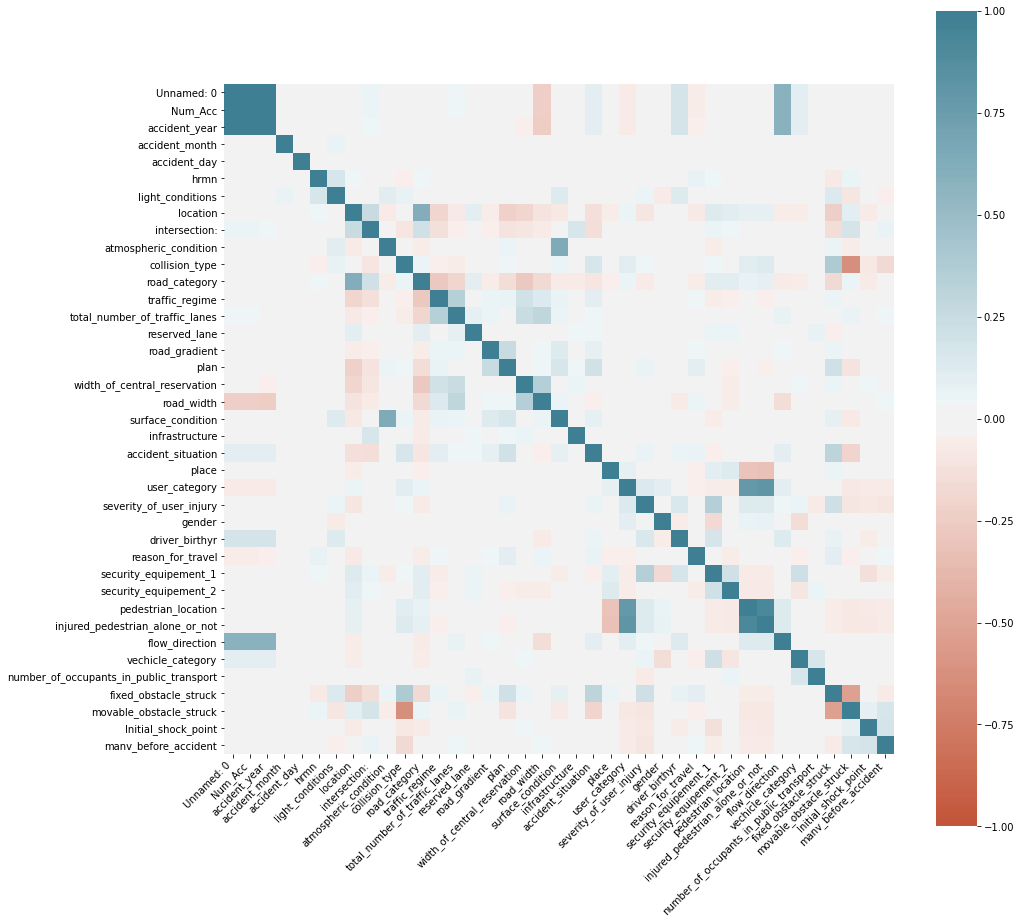

In [20]:
accident_corr = accident_circumstance1.corr(method= 'spearman')
plt.figure(figsize=(15,15))
accident_heatmap = sns.heatmap(accident_corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True)
accident_heatmap.set_xticklabels(accident_heatmap.get_xticklabels(), rotation=45, horizontalalignment='right');


In [21]:
# f = plt.figure(figsize=(19, 15))
# plt.matshow(accident_circumstance1.corr(method= 'spearman'), fignum=f.number)
# plt.xticks(range(accident_circumstance1.select_dtypes(['number']).shape[1]), accident_circumstance1.select_dtypes(['number']).columns, fontsize=14, rotation=45)
# plt.yticks(range(accident_circumstance1.select_dtypes(['number']).shape[1]), accident_circumstance1.select_dtypes(['number']).columns, fontsize=14)
# cb = plt.colorbar()
# cb.ax.tick_params(labelsize=14)
# plt.title('Correlation Matrix', fontsize=16);


Text(0, 0.5, 'Accident Count')

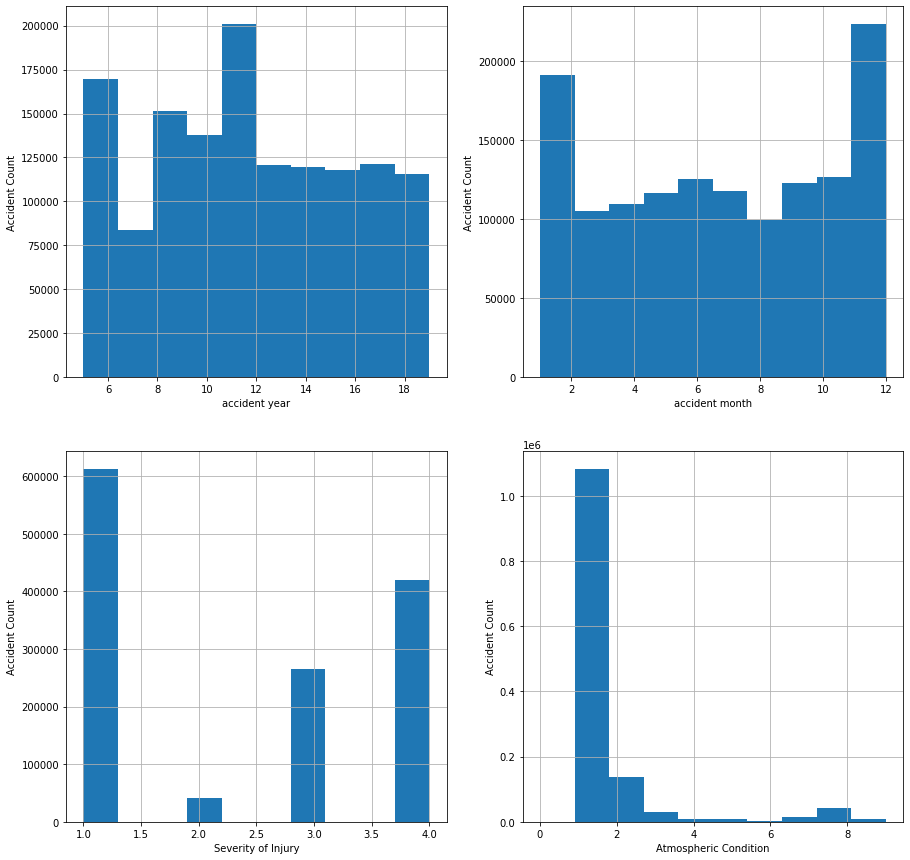

In [22]:
# accident_circumstance1['severity_of_user_injury'].plot.bar(x= 'Severity of Injury', y = 'Accident Count')

# new_ticks = ['Unharmed', 'Killed', 'Injured hospitalized', 'Slightly injured ']
# plt.yticks(accident_circumstance1['severity_of_user_injury'], new_ticks)


plt.figure(figsize=(15, 15))
#Plot 1
plt.subplot(2,2,1)
accident_circumstance1['accident_year'].hist()
plt.xlabel('accident year')
plt.ylabel('Accident Count')

#Plot 2
plt.subplot(2,2,2)
accident_circumstance1['accident_month'].hist()
plt.xlabel('accident month')
plt.ylabel('Accident Count')

#Plot 3
plt.subplot(2,2,3)
accident_circumstance1['severity_of_user_injury'].hist()
plt.xlabel('Severity of Injury')
plt.ylabel('Accident Count')

#Plot 4
plt.subplot(2,2,4)
accident_circumstance1['atmospheric_condition'].hist()
plt.xlabel('Atmospheric Condition')
plt.ylabel('Accident Count')


Text(0, 0.5, 'Accident Count')

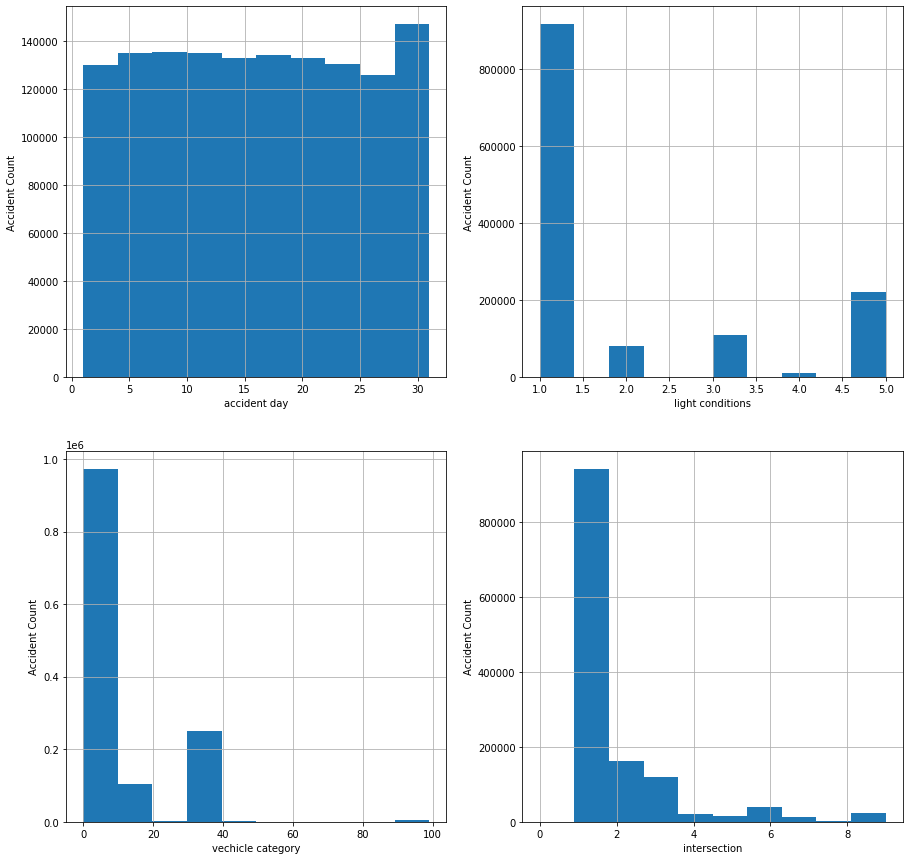

In [23]:
plt.figure(figsize=(15, 15))
#Plot 1
plt.subplot(2,2,1)
accident_circumstance1['accident_day'].hist()
plt.xlabel('accident day')
plt.ylabel('Accident Count')

#Plot 2
plt.subplot(2,2,2)
accident_circumstance1['light_conditions'].hist()
plt.xlabel('light conditions')
plt.ylabel('Accident Count')

#Plot 3
plt.subplot(2,2,3)
accident_circumstance1['vechicle_category'].hist()
plt.xlabel('vechicle category')
plt.ylabel('Accident Count')

#Plot 4
plt.subplot(2,2,4)
accident_circumstance1['intersection:'].hist()
plt.xlabel('intersection')
plt.ylabel('Accident Count')

Text(0, 0.5, 'Accident Count')

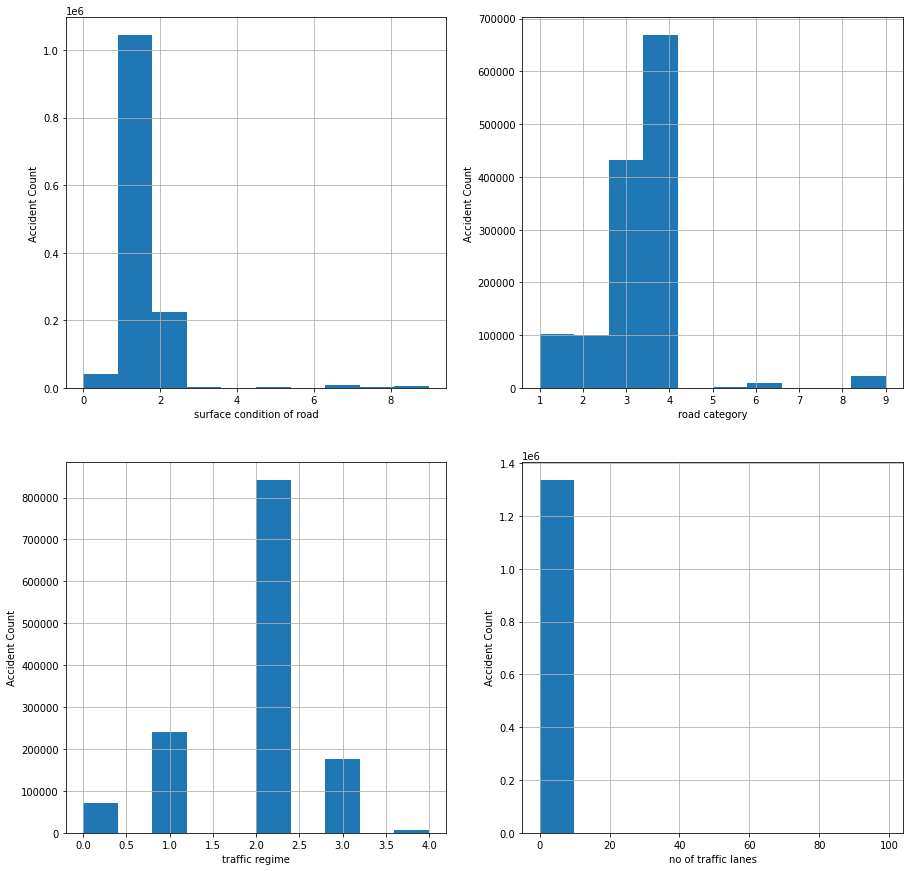

In [24]:

plt.figure(figsize=(15, 15))
#Plot 1
plt.subplot(2,2,1)
accident_circumstance1['surface_condition'].hist()
plt.xlabel('surface condition of road')
plt.ylabel('Accident Count')

#Plot 2
plt.subplot(2,2,2)
accident_circumstance1['road_category'].hist()
plt.xlabel('road category')
plt.ylabel('Accident Count')

#Plot 3
plt.subplot(2,2,3)
accident_circumstance1['traffic_regime'].hist()
plt.xlabel('traffic regime')
plt.ylabel('Accident Count')

#Plot 4
plt.subplot(2,2,4)
accident_circumstance1['total_number_of_traffic_lanes'].hist()
plt.xlabel('no of traffic lanes')
plt.ylabel('Accident Count')

Text(0, 0.5, 'Accident Count')

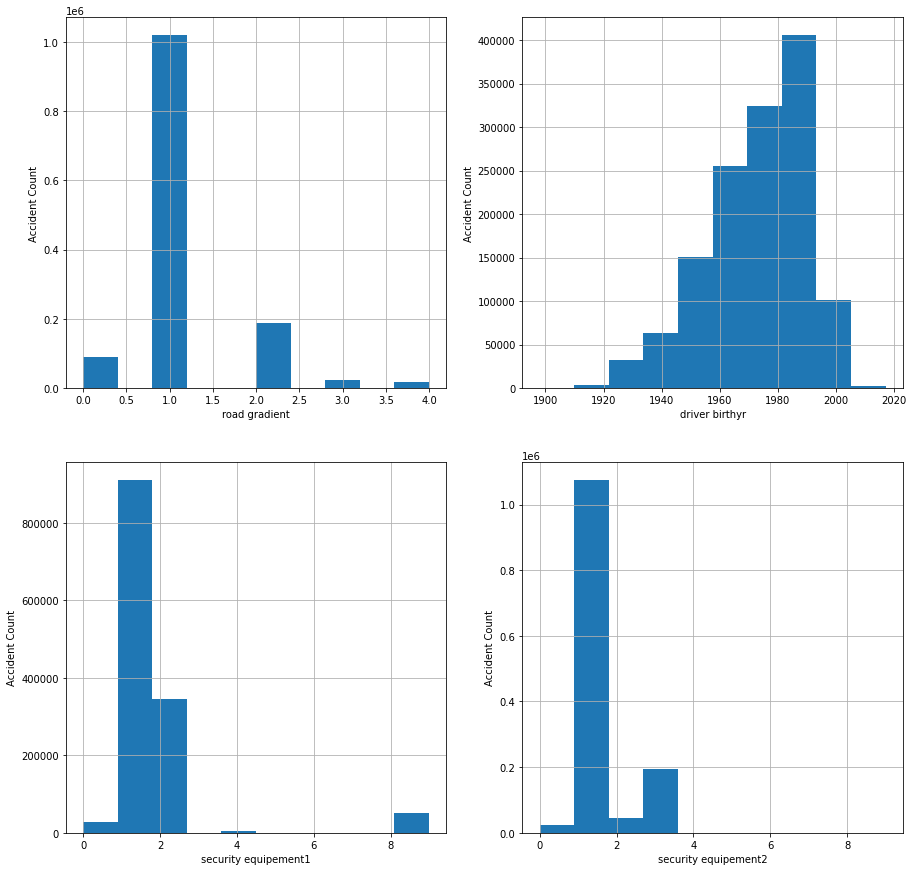

In [25]:
plt.figure(figsize=(15, 15))
#Plot 1
plt.subplot(2,2,1)
accident_circumstance1['road_gradient'].hist()
plt.xlabel('road gradient')
plt.ylabel('Accident Count')

#Plot 2
plt.subplot(2,2,2)
accident_circumstance1['driver_birthyr'].hist()
plt.xlabel('driver birthyr')
plt.ylabel('Accident Count')

#Plot 3
plt.subplot(2,2,3)
accident_circumstance1['security_equipement_1'].hist()
plt.xlabel('security equipement1')
plt.ylabel('Accident Count')

#Plot 4
plt.subplot(2,2,4)
accident_circumstance1['security_equipement_2'].hist()
plt.xlabel('security equipement2')
plt.ylabel('Accident Count')

<AxesSubplot:>

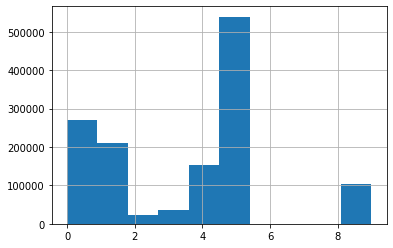

In [26]:
accident_circumstance1['reason_for_travel'].hist()

In [27]:
# accident_circumstance1['severity_of_user_injury'].plot.bar(x= 'Severity of Injury', y = 'Accident Count')

In [28]:
# plt.hist(accident_circumstance1['severity_of_user_injury'], 10)
# plt.xlabel('Severity of Injury')
# plt.ylabel('Accident Count')


In [29]:
holiday_patterns = pd.read_csv('holiday_paterns.csv')
holiday_patterns.head()
holiday_patterns.dtypes
accident_circumstance1['accident_day'].astype('int64')
accident_circumstance1['accident_month'].astype('int64')

0          1
1          1
2          1
3          1
4          1
          ..
1338194    9
1338195    9
1338196    9
1338197    9
1338198    9
Name: accident_month, Length: 1338199, dtype: int64

In [30]:
accident_circumstance1.describe()


,Unnamed: 0,Num_Acc,accident_year,accident_month,accident_day,hrmn,light_conditions,location,intersection:,atmospheric_condition,...,security_equipement_2,pedestrian_location,injured_pedestrian_alone_or_not,flow_direction,vechicle_category,number_of_occupants_in_public_transport,fixed_obstacle_struck,movable_obstacle_struck,Initial_shock_point,manv_before_accident
count,1.338199e+06,1.338199e+06,1.338199e+06,1.338199e+06,1.338199e+06,1.338199e+06,1.338199e+06,1.338199e+06,1.338199e+06,1.338199e+06,...,1.338199e+06,1.338199e+06,1.338199e+06,1.338199e+06,1.338199e+06,1.338199e+06,1.338199e+06,1.338199e+06,1.338199e+06,1.338199e+06
mean,6.690990e+05,2.011611e+11,1.161083e+01,6.671168e+00,1.560288e+01,1.380315e+03,1.910757e+00,1.678879e+00,1.739850e+00,1.550708e+00,...,1.307438e+00,5.741971e-02,2.534601e-02,2.721636e-01,1.202414e+01,8.925429e-02,1.361427e+00,1.401767e+00,2.774782e+00,6.004224e+00
std,3.863049e+05,3.959885e+08,3.959930e+00,3.382138e+00,8.742317e+00,5.415499e+02,1.511566e+00,4.669074e-01,1.575339e+00,1.592065e+00,...,7.347189e-01,4.589593e-01,1.929144e-01,5.860668e-01,1.166029e+01,2.434234e+00,3.577503e+00,1.261458e+00,2.486622e+00,7.011083e+00
min,0.000000e+00,2.005000e+11,5.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.345495e+05,2.009000e+11,9.000000e+00,4.000000e+00,8.000000e+00,1.000000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
50%,6.690990e+05,2.011000e+11,1.100000e+01,7.000000e+00,1.600000e+01,1.446000e+03,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00
75%,1.003648e+06,2.015000e+11,1.500000e+01,1.000000e+01,2.300000e+01,1.810000e+03,3.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,...,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,2.000000e+00,4.000000e+00,1.300000e+01
max,1.338198e+06,2.019000e+11,1.900000e+01,1.200000e+01,3.100000e+01,2.359000e+03,5.000000e+00,2.000000e+00,9.000000e+00,9.000000e+00,...,9.000000e+00,9.000000e+00,3.000000e+00,3.000000e+00,9.900000e+01,9.000000e+02,1.600000e+01,9.000000e+00,9.000000e+00,2.600000e+01


In [31]:
#Mean of each columns in relation to accident year.
pd.pivot_table(accident_circumstance1, index = ['accident_year', 'severity_of_user_injury'])
# Severity of user injury
# 	1. Unharmed
# 	2. Killed
# 	3. Injured hospitalized
# 	4. Slightly injured 

Initial_shock_point       Num_Acc  \
accident_year severity_of_user_injury                                      
5             1                                   2.667570  2.005000e+11   
              2                                   3.176945  2.005000e+11   
              3                                   2.625390  2.005000e+11   
              4                                   2.497674  2.005000e+11   
6             1                                   2.744634  2.006000e+11   
              2                                   3.247619  2.006000e+11   
              3                                   2.681914  2.006000e+11   
              4                                   2.476900  2.006000e+11   
7             1                                   2.790193  2.007000e+11   
              2                                   3.191673  2.007000e+11   
              3                                   2.660937  2.007000e+11   
              4                                   2.540038  2.007000e+11   
8             1                                   2.787008  2.008000e+11   
              2                                   3.098985  2.008000e+11   
              3                                   2.709371  2.008000e+11   
              4                                   2.639660  2.008000e+11   
9             1                                   3.007112  2.009000e+11   
              2                                   3.102994  2.009000e+11   
              3                                   2.673832  2.009000e+11   
              4                                   2.689520  2.009000e+11   
10            1                                   2.881095  2.010000e+11   
              2                                   3.362170  2.010000e+11   
              3                                   2.737755  2.010000e+11   
              4                                   2.771645  2.010000e+11   
11            1                                   2.900497  2.011000e+11   
              2                                   3.224337  2.011000e+11   
              3                                   2.749563  2.011000e+11   
              4                                   2.815680  2.011000e+11   
12            1                                   2.842682  2.012000e+11   
              2                                   2.955626  2.012000e+11   
              3                                   2.754407  2.012000e+11   
              4                                   2.805042  2.012000e+11   
13            1                                   2.813732  2.013000e+11   
              2                                   3.126718  2.013000e+11   
              3                                   2.703189  2.013000e+11   
              4                                   2.785679  2.013000e+11   
14            1                                   2.821808  2.014000e+11   
              2                                   2.984270  2.014000e+11   
              3                                   2.665719  2.014000e+11   
              4                                   2.764486  2.014000e+11   
15            1                                   2.756907  2.015000e+11   
              2                                   2.988340  2.015000e+11   
              3                                   2.663781  2.015000e+11   
              4                                   2.788415  2.015000e+11   
16            1                                   2.754471  2.016000e+11   
              2                                   2.866410  2.016000e+11   
              3                                   2.578777  2.016000e+11   
              4                                   2.757322  2.016000e+11   
17            1                                   2.804137  2.017000e+11   
              2                                   2.889129  2.017000e+11   
              3                                   2.701471  2.017000e+11   
           

In [32]:
#Holiday_patterns - month and severity_of_user_injury
#atmospheric_conditions - atmospheric condition and severity_of _user_injury
#light_conditions - light_conditons and severity_of _user_injury
# vehicle_category - vechicle_category and severity_of _user_injury
# road_conditions- surface_condition and severity_of _user_injury , 
#


In [33]:
accident_circumstance1['gender']= accident_circumstance1['gender'].replace(1, 'Male')
accident_circumstance1['gender']= accident_circumstance1['gender'].replace(2, 'Female')

In [34]:
#Mean of each columns in relation to gender, .
gender_accident = pd.crosstab(index = accident_circumstance1['accident_year'], columns = accident_circumstance1['gender'], values=accident_circumstance1['Num_Acc'], aggfunc=np.count_nonzero)
gender_accident



gender,Female,Male
accident_year,,
5,21866,65072
6,21517,61300
7,22253,61465
8,20934,55831
9,23039,51368
10,36960,100736
11,53394,147525
12,16515,45735
13,15820,42576


Text(0, 0.5, 'total_count')

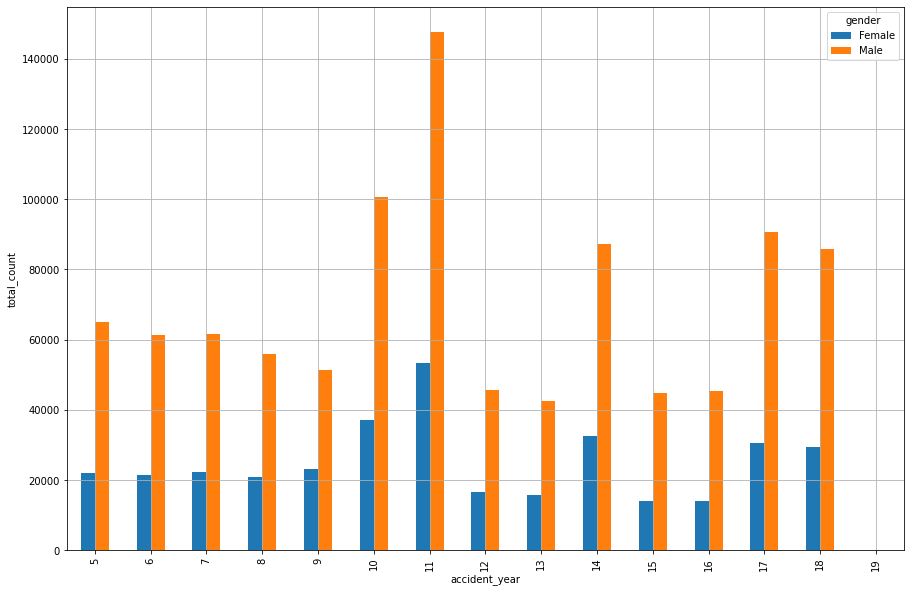

In [35]:
gender_accident.plot(kind='bar', stacked=False, grid= True, figsize = (15,10))
plt.ylabel('total_count')

In [36]:
accident_circumstance1['vechicle_category']= accident_circumstance1['vechicle_category'].replace(0, 'NotDeterminable')
accident_circumstance1['vechicle_category']= accident_circumstance1['vechicle_category'].replace(1, 'Bicycle')
accident_circumstance1['vechicle_category']= accident_circumstance1['vechicle_category'].replace(2, 'Moped')
accident_circumstance1['vechicle_category']= accident_circumstance1['vechicle_category'].replace(3, 'Cart')
accident_circumstance1['vechicle_category']= accident_circumstance1['vechicle_category'].replace(4, 'Registered scooter')
accident_circumstance1['vechicle_category']= accident_circumstance1['vechicle_category'].replace(5, 'MotorCycle')
accident_circumstance1['vechicle_category']= accident_circumstance1['vechicle_category'].replace(6, 'SideCar')
accident_circumstance1['vechicle_category']= accident_circumstance1['vechicle_category'].replace(7, 'VL only')
accident_circumstance1['vechicle_category']= accident_circumstance1['vechicle_category'].replace(8, 'VL+Caravan')
accident_circumstance1['vechicle_category']= accident_circumstance1['vechicle_category'].replace(9, 'LightVehicles+trailer')
accident_circumstance1['vechicle_category']= accident_circumstance1['vechicle_category'].replace(10, 'VU only')
accident_circumstance1['vechicle_category']= accident_circumstance1['vechicle_category'].replace(11, 'VU+Caravan')
accident_circumstance1['vechicle_category']= accident_circumstance1['vechicle_category'].replace(12, 'VU+Trailer')
accident_circumstance1['vechicle_category']= accident_circumstance1['vechicle_category'].replace(13, 'PLonly<=7,5T')
accident_circumstance1['vechicle_category']= accident_circumstance1['vechicle_category'].replace(14, 'PLonly>7.5T')
accident_circumstance1['vechicle_category']= accident_circumstance1['vechicle_category'].replace(15, 'PL>3,5T+trailer')
accident_circumstance1['vechicle_category']= accident_circumstance1['vechicle_category'].replace(16,'Road tractor only')
accident_circumstance1['vechicle_category']= accident_circumstance1['vechicle_category'].replace(17, 'Road tractor + semi-trailer')
accident_circumstance1['vechicle_category']= accident_circumstance1['vechicle_category'].replace(18, 'public transport')
accident_circumstance1['vechicle_category']= accident_circumstance1['vechicle_category'].replace(19, 'tram')
accident_circumstance1['vechicle_category']= accident_circumstance1['vechicle_category'].replace(20, 'Special gear')
accident_circumstance1['vechicle_category']= accident_circumstance1['vechicle_category'].replace(21, 'Farm tractor')
accident_circumstance1['vechicle_category']= accident_circumstance1['vechicle_category'].replace(30, 'Scooter <50 cm3')
accident_circumstance1['vechicle_category']= accident_circumstance1['vechicle_category'].replace(31, 'Motorcycle> 50 cm3 and <= 125 cm3')
accident_circumstance1['vechicle_category']= accident_circumstance1['vechicle_category'].replace(32, 'Scooter> 50 cm3 and <= 125 cm3')
accident_circumstance1['vechicle_category']= accident_circumstance1['vechicle_category'].replace(33, 'Motorcycle> 125 cm3')
accident_circumstance1['vechicle_category']= accident_circumstance1['vechicle_category'].replace(34, 'Scooter> 125 cm3')
accident_circumstance1['vechicle_category']= accident_circumstance1['vechicle_category'].replace(35, 'Light quad <= 50 cm3')
accident_circumstance1['vechicle_category']= accident_circumstance1['vechicle_category'].replace(36, 'Heavy quad> 50 cm3')
accident_circumstance1['vechicle_category']= accident_circumstance1['vechicle_category'].replace(37, ' Bus')
accident_circumstance1['vechicle_category']= accident_circumstance1['vechicle_category'].replace(38, 'Coach')
accident_circumstance1['vechicle_category']= accident_circumstance1['vechicle_category'].replace(39, 'Train')
accident_circumstance1['vechicle_category']= accident_circumstance1['vechicle_category'].replace(40, 'Tram')
accident_circumstance1['vechicle_category']= accident_circumstance1['vechicle_category'].replace(41, '3WD <= 50 cm3')
accident_circumstance1['vechicle_category']= accident_circumstance1['vechicle_category'].replace(42, '3WD> 50 cm3 <= 125 cm3')
accident_circumstance1['vechicle_category']= accident_circumstance1['vechicle_category'].replace(43, '3WD> 50 cm3 <= 125 cm3')
accident_circumstance1['vechicle_category']= accident_circumstance1['vechicle_category'].replace(50, 'EDP with motor')
accident_circumstance1['vechicle_category']= accident_circumstance1['vechicle_category'].replace(99, 'Other vehicle')




In [37]:
Vehicle_accidents = pd.crosstab(index = accident_circumstance1['severity_of_user_injury'], columns = accident_circumstance1['vechicle_category'], values=accident_circumstance1['Num_Acc'], aggfunc=np.count_nonzero)
Vehicle_accidents

vechicle_category,Bus,3WD> 50 cm3 <= 125 cm3,Bicycle,Cart,Coach,EDP with motor,Farm tractor,Heavy quad> 50 cm3,Light quad <= 50 cm3,LightVehicles+trailer,...,Special gear,Train,Tram,VL only,VL+Caravan,VU only,VU+Caravan,VU+Trailer,public transport,tram
severity_of_user_injury,,,,,,,,,,,,,,,,,,,,,
1,8595.0,NaN,4475.0,2137.0,1973.0,NaN,1640.0,240.0,47.0,120.0,...,927.0,149.0,1611.0,483145.0,46.0,45897.0,3.0,38.0,1074.0,64.0
2,16.0,NaN,1546.0,236.0,17.0,1.0,165.0,255.0,21.0,4.0,...,40.0,2.0,4.0,23464.0,1.0,1537.0,1.0,NaN,2.0,NaN
3,256.0,2.0,14048.0,1282.0,126.0,NaN,262.0,1411.0,258.0,6.0,...,126.0,1.0,50.0,122722.0,7.0,7855.0,1.0,5.0,37.0,NaN
4,983.0,1.0,27549.0,1678.0,239.0,NaN,168.0,427.0,164.0,23.0,...,231.0,6.0,120.0,205371.0,11.0,12395.0,4.0,6.0,86.0,6.0


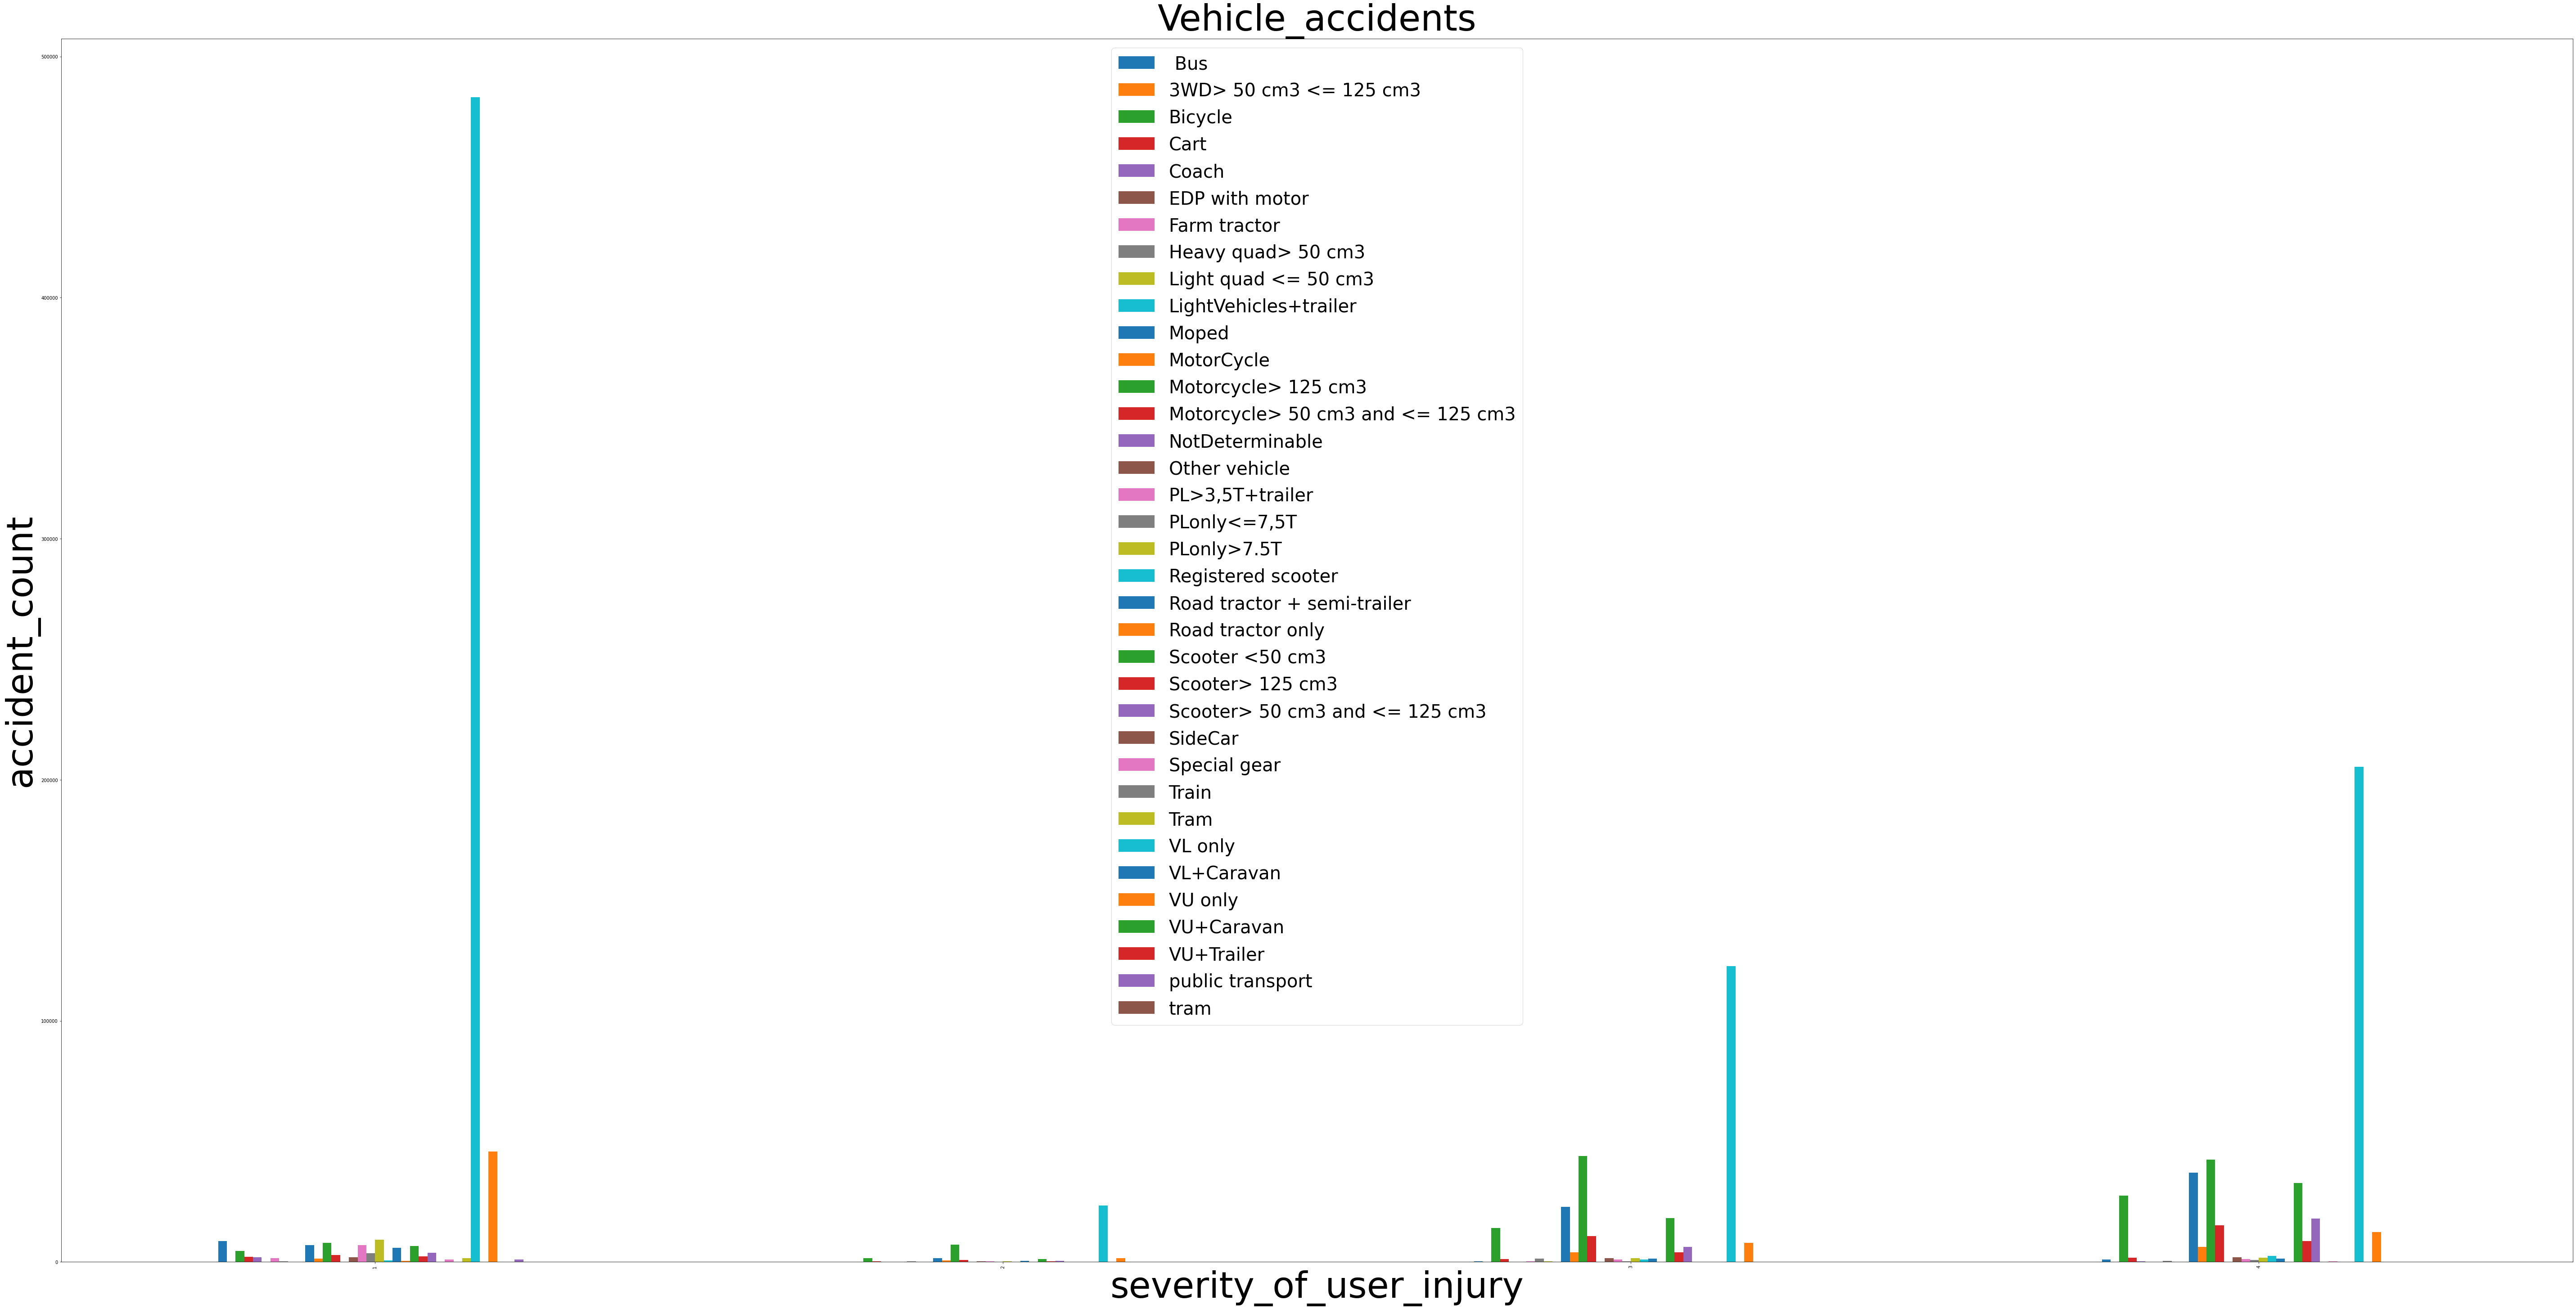

In [38]:
#Vehicle_accidents
import matplotlib.pyplot as plt
Vehicle_accidents.plot.bar(figsize=(100, 50))
plt.title('Vehicle_accidents', fontsize=80);
plt.xlabel('severity_of_user_injury', fontsize = 80)
plt.ylabel('accident_count', fontsize = 80)
plt.legend(fontsize =40)

In [39]:
accident_circumstance1['severity_of_user_injury']= accident_circumstance1['severity_of_user_injury'].replace(1,'unharmed')
accident_circumstance1['severity_of_user_injury']= accident_circumstance1['severity_of_user_injury'].replace(2,'killed')
accident_circumstance1['severity_of_user_injury']= accident_circumstance1['severity_of_user_injury'].replace(3,'injured hospitalized')
accident_circumstance1['severity_of_user_injury']= accident_circumstance1['severity_of_user_injury'].replace(4,'slightly injured')

In [40]:
Holiday_patterns = pd.crosstab(index = accident_circumstance1['accident_month'], columns = accident_circumstance1['severity_of_user_injury'], values=accident_circumstance1['Num_Acc'], aggfunc=np.count_nonzero)
Holiday_patterns

severity_of_user_injury,injured hospitalized,killed,slightly injured,unharmed
accident_month,,,,
1,17862,2952,31917,49304
2,16439,2682,28257,41847
3,20013,2972,33537,48767
4,21932,3241,34021,50605
5,23935,3462,36392,52847
6,26308,3710,39380,55820
7,26786,4226,36581,50302
8,23573,3758,30146,41622
9,24456,3780,38595,56033


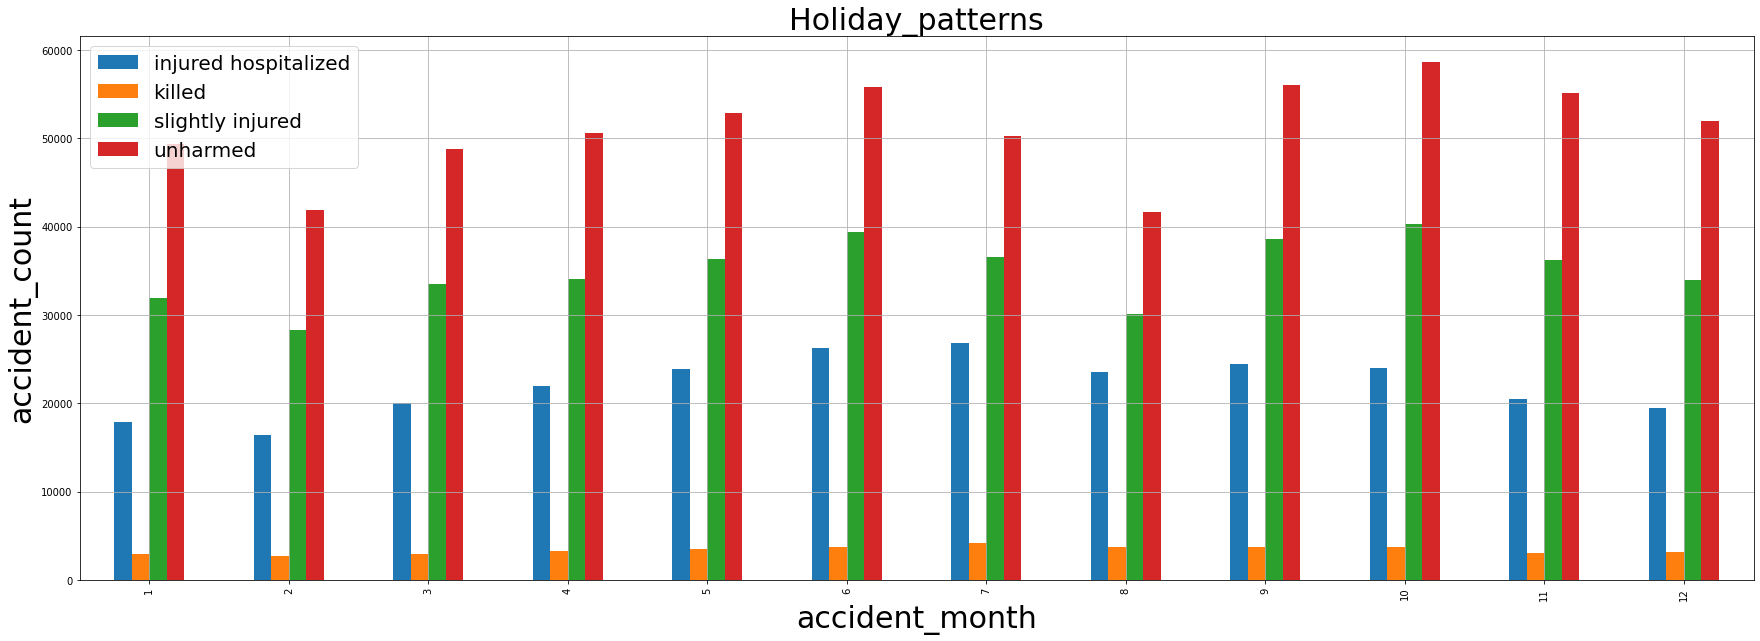

In [41]:

Holiday_patterns.plot(kind='bar', stacked=False,figsize=(30, 10), grid= True)
plt.title('Holiday_patterns', fontsize=30);
plt.xlabel('accident_month', fontsize = 30)
plt.ylabel('accident_count', fontsize = 30)
plt.legend(fontsize =20)


In [42]:
accident_circumstance1['light_conditions']= accident_circumstance1['light_conditions'].replace(1,'fullday')
accident_circumstance1['light_conditions']= accident_circumstance1['light_conditions'].replace(2,'twilight or dawn')
accident_circumstance1['light_conditions']= accident_circumstance1['light_conditions'].replace(3,'night without public lighting')
accident_circumstance1['light_conditions']= accident_circumstance1['light_conditions'].replace(4,'night with public lighting not on')
accident_circumstance1['light_conditions']= accident_circumstance1['light_conditions'].replace(5,'night with public lighting on')

In [43]:
Light_conditions = pd.crosstab(index = accident_circumstance1['severity_of_user_injury'], columns = accident_circumstance1['light_conditions'], values=accident_circumstance1['Num_Acc'], aggfunc=np.count_nonzero)
Light_conditions 

light_conditions,fullday,night with public lighting not on,night with public lighting on,night without public lighting,twilight or dawn
severity_of_user_injury,,,,,
injured hospitalized,169126,2297,38156,38151,17603
killed,22509,405,4241,10562,3106
slightly injured,282430,3903,79866,28560,24534
unharmed,442294,4758,99770,30836,35092


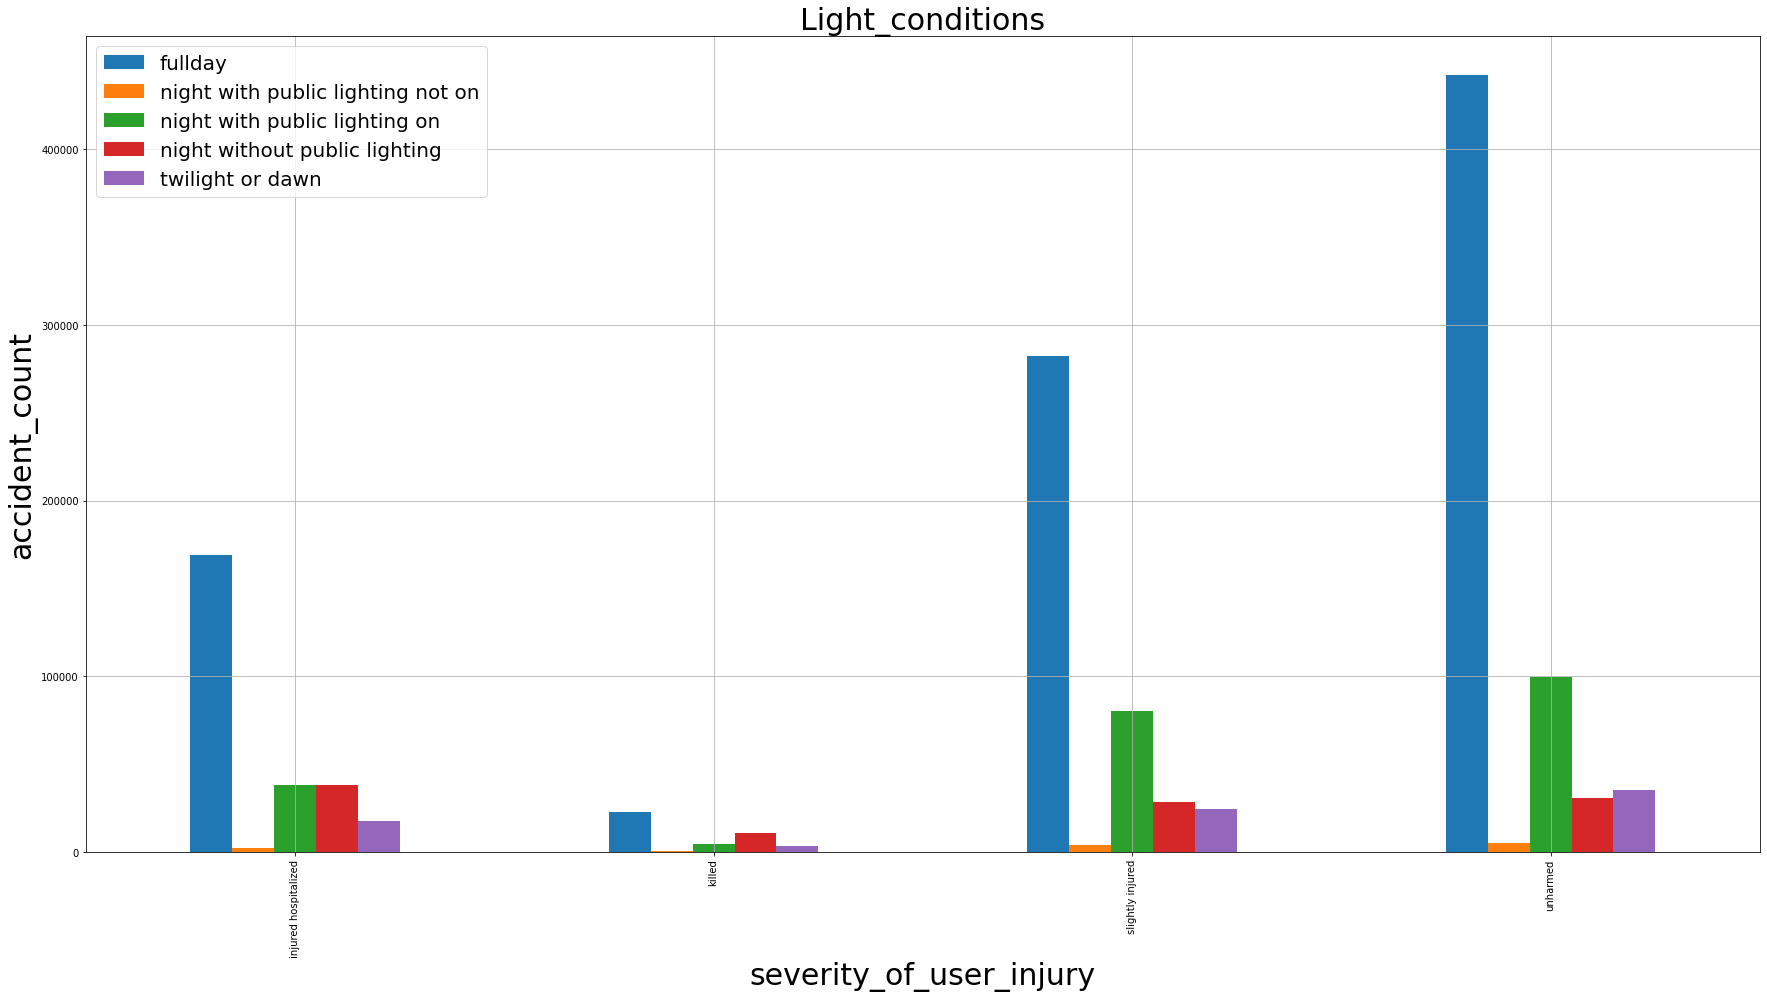

In [44]:
Light_conditions.plot(kind='bar', stacked=False, figsize=(30, 15), grid= True)
plt.title('Light_conditions', fontsize=30);
plt.xlabel('severity_of_user_injury', fontsize = 30)
plt.ylabel('accident_count', fontsize = 30)
plt.legend(fontsize =20)


In [45]:
accident_circumstance1['atmospheric_condition']= accident_circumstance1['atmospheric_condition'].replace(0,'notspecified')
accident_circumstance1['atmospheric_condition']= accident_circumstance1['atmospheric_condition'].replace(1,'normal')
accident_circumstance1['atmospheric_condition']= accident_circumstance1['atmospheric_condition'].replace(2,'lightrain')
accident_circumstance1['atmospheric_condition']= accident_circumstance1['atmospheric_condition'].replace(3,'heavyrain')
accident_circumstance1['atmospheric_condition']= accident_circumstance1['atmospheric_condition'].replace(4,'snow.hail')
accident_circumstance1['atmospheric_condition']= accident_circumstance1['atmospheric_condition'].replace(5,'fog.smoke')
accident_circumstance1['atmospheric_condition']= accident_circumstance1['atmospheric_condition'].replace(6,'strongwind.strom')
accident_circumstance1['atmospheric_condition']= accident_circumstance1['atmospheric_condition'].replace(7,'dazzlingweather')
accident_circumstance1['atmospheric_condition']= accident_circumstance1['atmospheric_condition'].replace(8,'cloudyweather')
accident_circumstance1['atmospheric_condition']= accident_circumstance1['atmospheric_condition'].replace(9,'other')


In [46]:
Atmospheric_conditions = pd.crosstab(index = accident_circumstance1['severity_of_user_injury'], columns = accident_circumstance1['atmospheric_condition'], values=accident_circumstance1['Num_Acc'], aggfunc=np.count_nonzero)
Atmospheric_conditions

atmospheric_condition,cloudyweather,dazzlingweather,fog.smoke,heavyrain,lightrain,normal,notspecified,other,snow.hail,strongwind.strom
severity_of_user_injury,,,,,,,,,,
injured hospitalized,9316,3261,2938,5879,24349,214092,31,2714,1759,994
killed,1871,598,727,1048,3484,31949,18,584,313,231
slightly injured,13331,2555,2206,9035,48458,337356,40,2920,2543,849
unharmed,18959,7878,2943,12719,62344,500116,47,3256,3349,1139


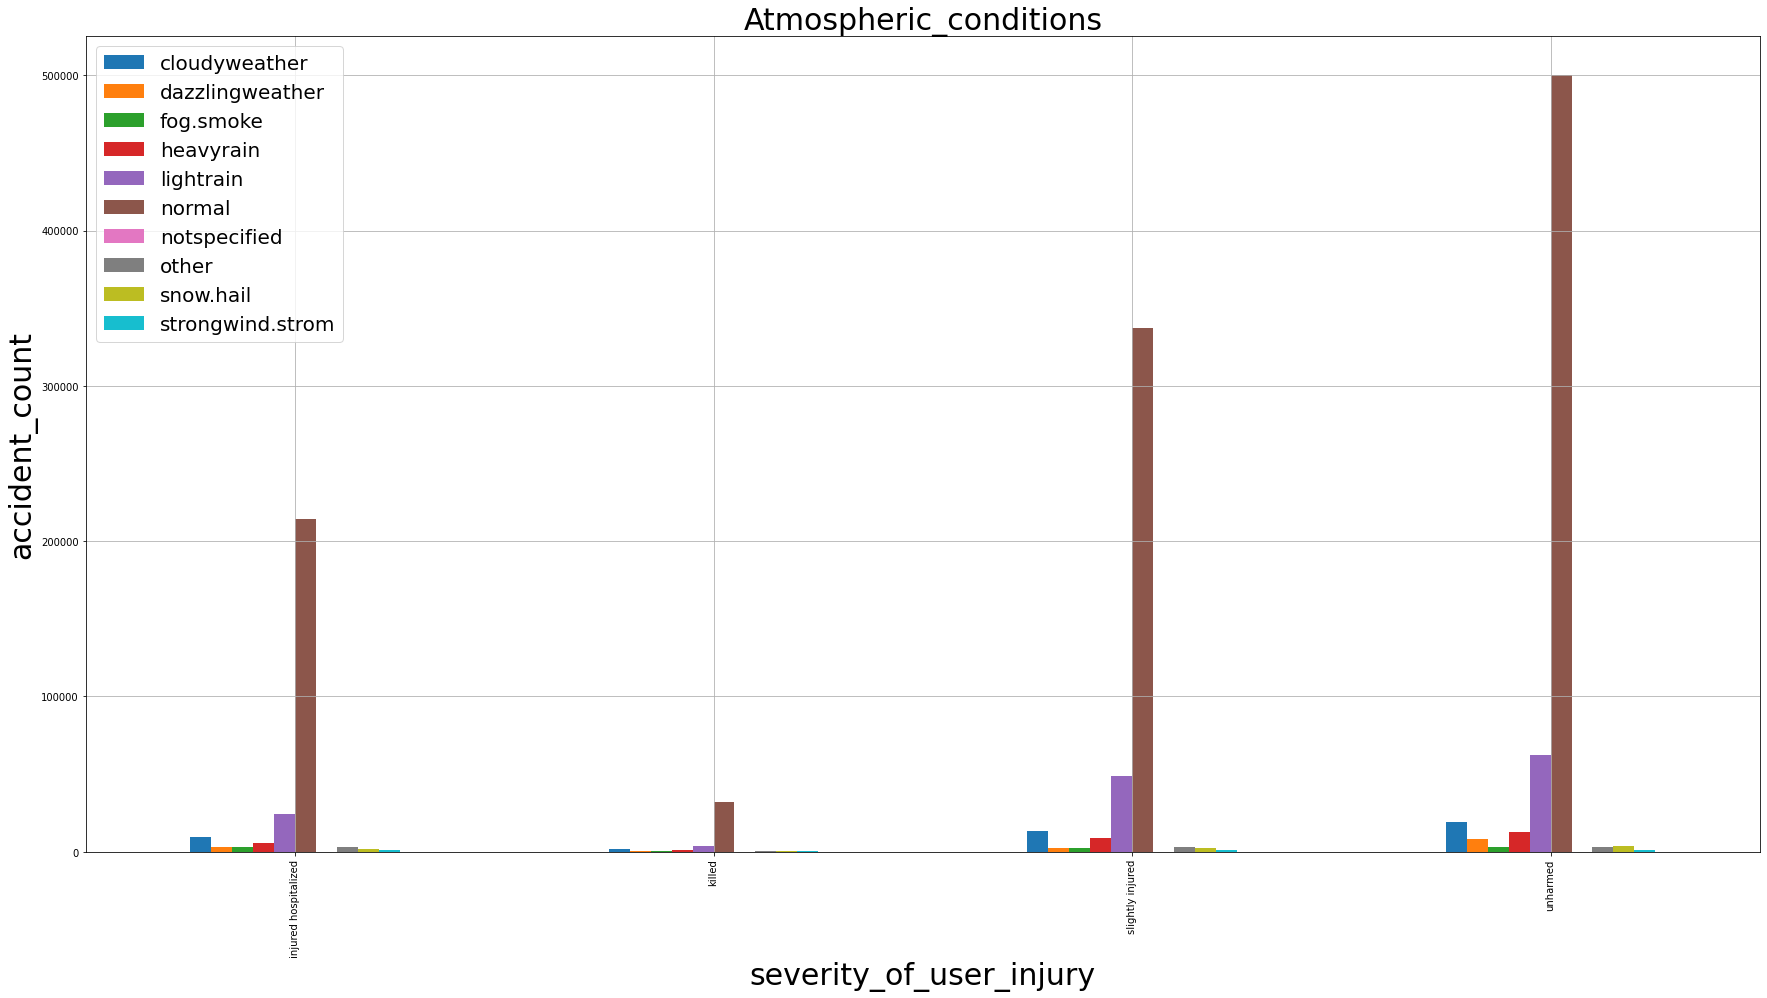

In [47]:
Atmospheric_conditions.plot(kind='bar', stacked=False, figsize=(30, 15), grid= True)
plt.title('Atmospheric_conditions', fontsize=30);
plt.xlabel('severity_of_user_injury', fontsize = 30)
plt.ylabel('accident_count', fontsize = 30)
plt.legend(fontsize =20)


In [48]:
#Holiday_patterns - month and severity_of_user_injury
#atmospheric_conditions - atmospheric condition and severity_of _user_injury
#light_conditions - light_conditons and severity_of _user_injury
#vehicle_category - vechicle_category and severity_of _user_injury
#road_conditions- surface_condition and severity_of _user_injury , road_category,traffic_regime,intersection:,total_number_of_traffic_lanes,road_gradient
#age -  driver_birthyr and severity_of _user_injury
#Safety_equipement - security_equipement_1, security_equipement_2 and severity_of _user_injury

In [49]:
accident_circumstance1['surface_condition']= accident_circumstance1['surface_condition'].replace(0,'notspecified')
accident_circumstance1['surface_condition']= accident_circumstance1['surface_condition'].replace(1,'normal')
accident_circumstance1['surface_condition']= accident_circumstance1['surface_condition'].replace(2,'wet')
accident_circumstance1['surface_condition']= accident_circumstance1['surface_condition'].replace(3,'puddles')
accident_circumstance1['surface_condition']= accident_circumstance1['surface_condition'].replace(4,'flooded')
accident_circumstance1['surface_condition']= accident_circumstance1['surface_condition'].replace(5,'snowy')
accident_circumstance1['surface_condition']= accident_circumstance1['surface_condition'].replace(6,'mud')
accident_circumstance1['surface_condition']= accident_circumstance1['surface_condition'].replace(7,'icey')
accident_circumstance1['surface_condition']= accident_circumstance1['surface_condition'].replace(8,'fat.oil')
accident_circumstance1['surface_condition']= accident_circumstance1['surface_condition'].replace(9,'other')


In [50]:
Road_conditions = pd.crosstab(index = accident_circumstance1['severity_of_user_injury'], columns = accident_circumstance1['surface_condition'], values=accident_circumstance1['Num_Acc'], aggfunc=np.count_nonzero)
Road_conditions

surface_condition,fat.oil,flooded,icey,mud,normal,notspecified,other,puddles,snowy,wet
severity_of_user_injury,,,,,,,,,,
injured hospitalized,817,213,2669,310,205902,7855,2735,656,880,43296
killed,67,69,501,47,31247,816,506,118,169,7283
slightly injured,1813,233,2855,212,318738,14220,2094,670,1286,77172
unharmed,603,250,2270,168,488211,19384,1768,576,1678,97842


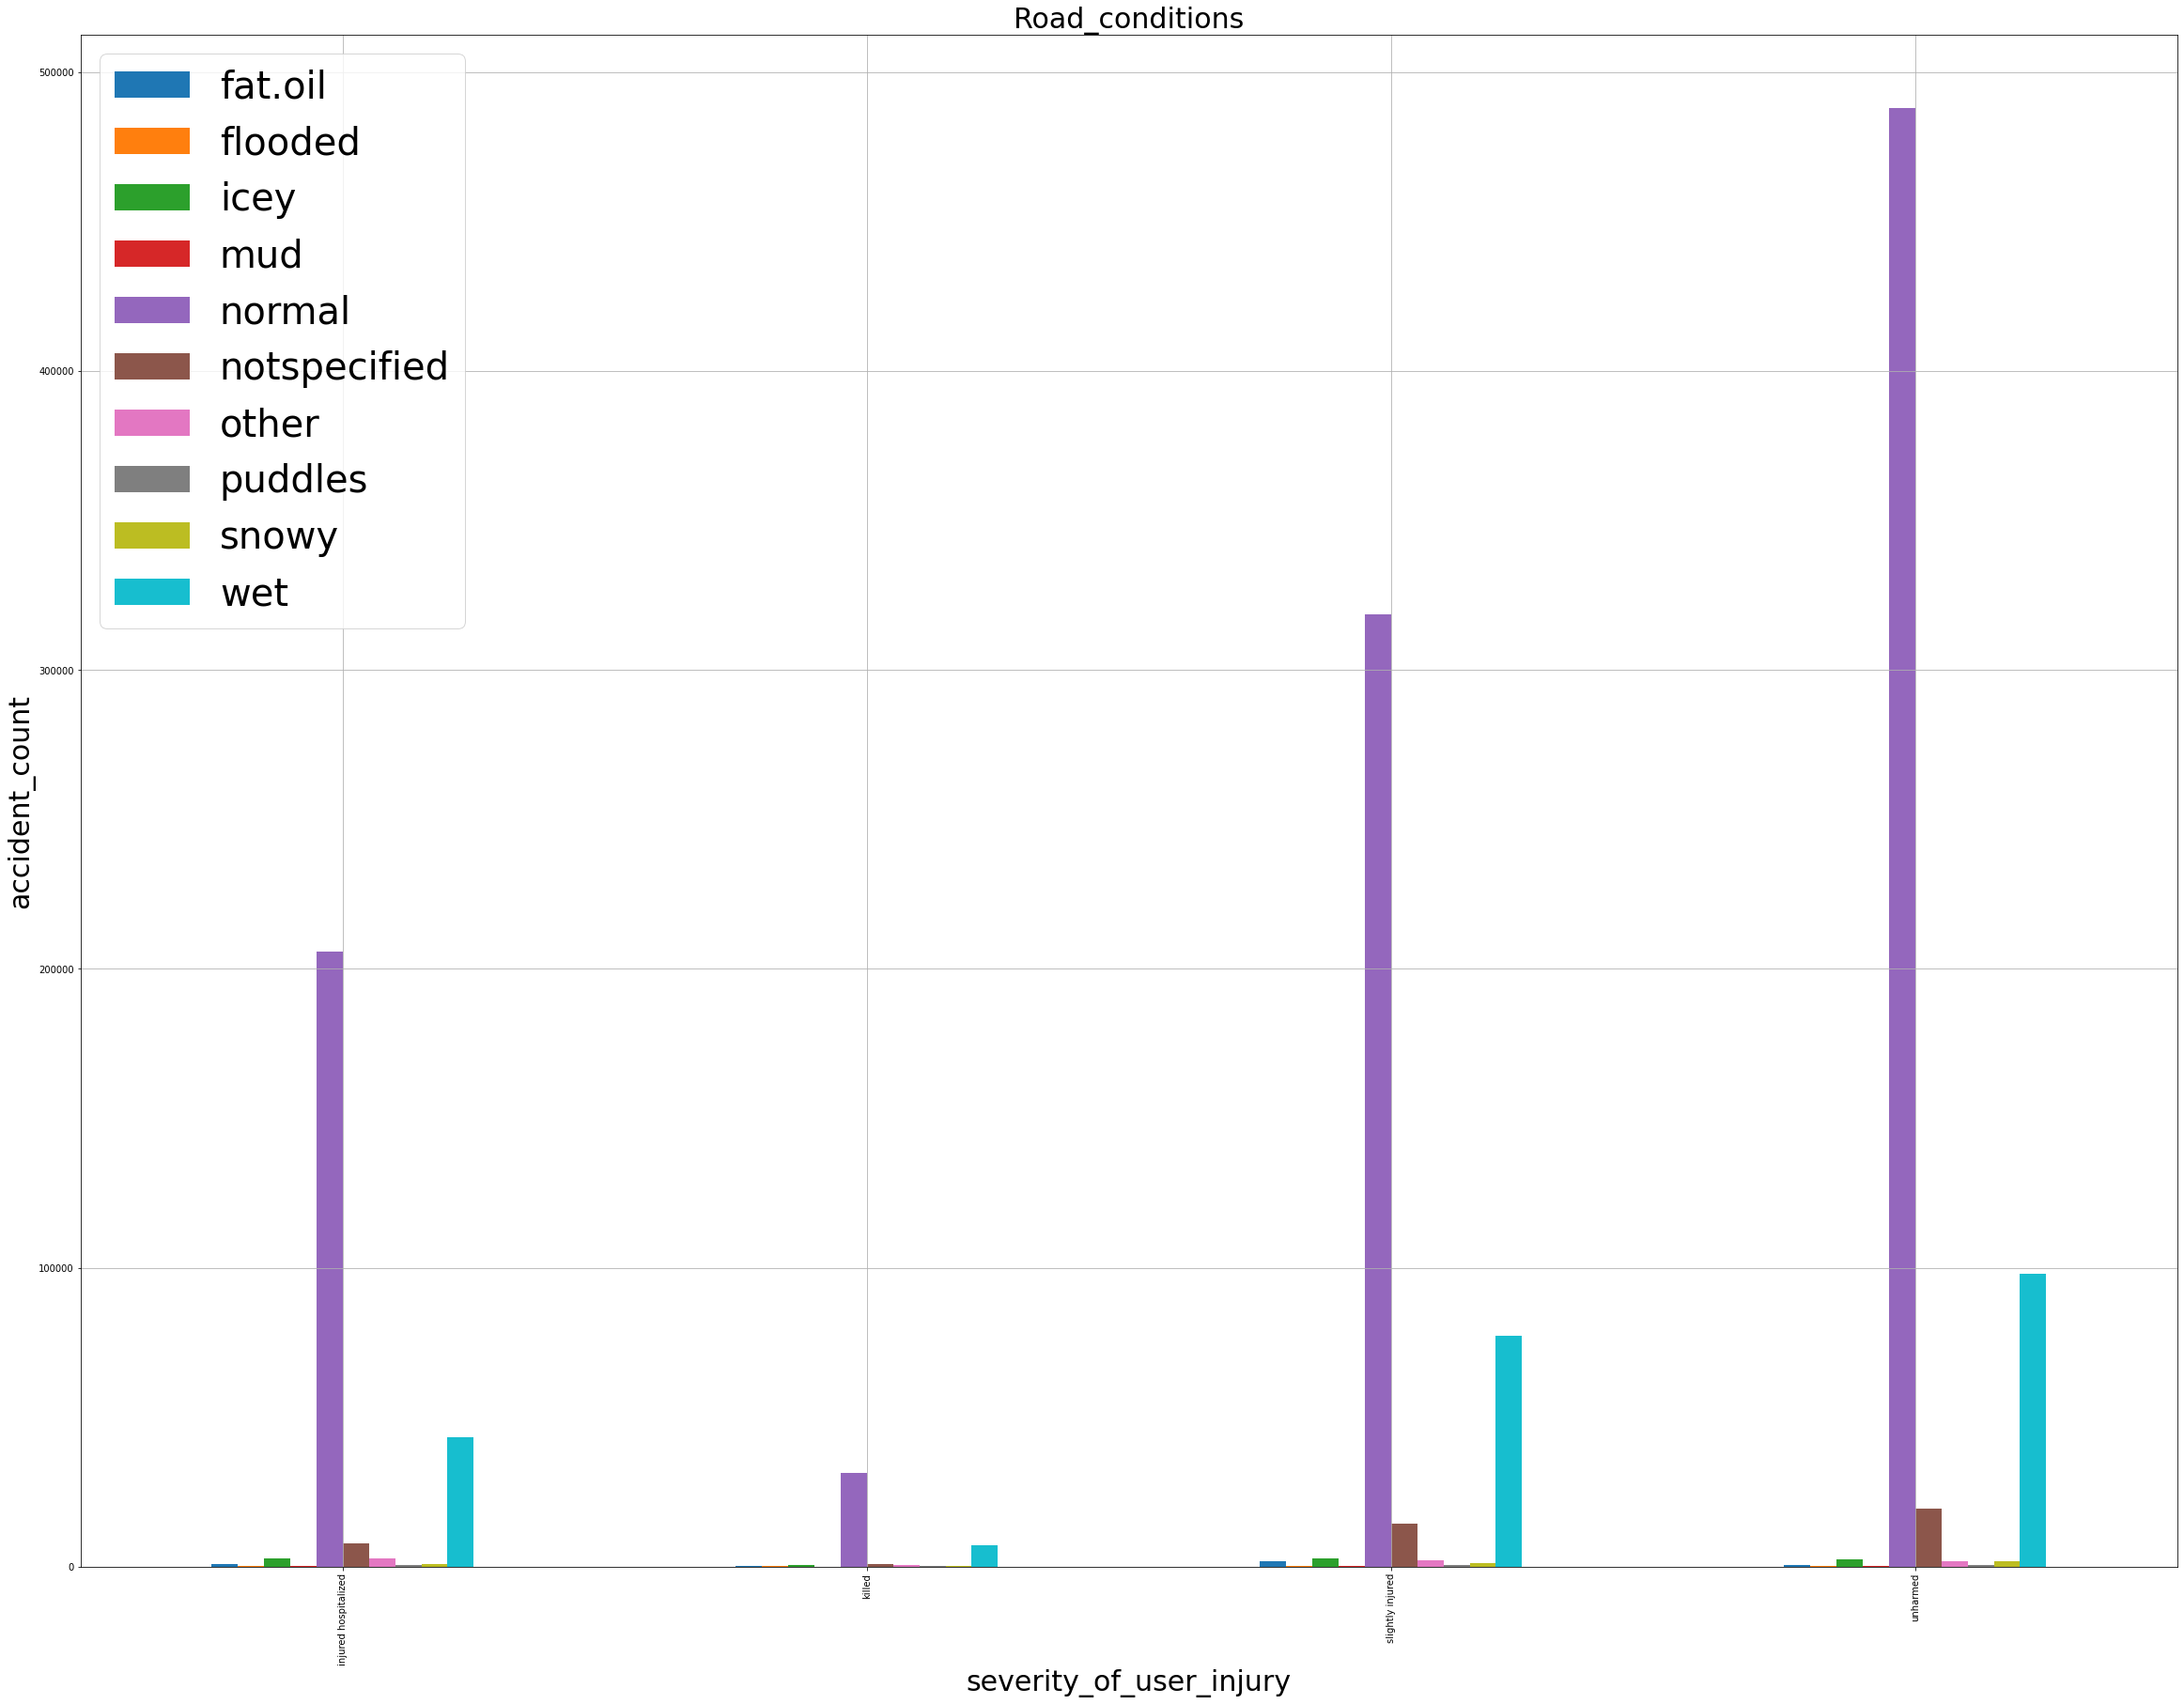

In [51]:
Road_conditions.plot(kind='bar', stacked=False,figsize=(40, 30), grid= True)
plt.title('Road_conditions', fontsize=30)
plt.xlabel('severity_of_user_injury', fontsize = 30)
plt.ylabel('accident_count', fontsize = 30)
plt.legend(fontsize =40)


In [52]:
accident_circumstance1['road_category']= accident_circumstance1['road_category'].replace(1,'highway')
accident_circumstance1['road_category']= accident_circumstance1['road_category'].replace(2,'nationalroad')
accident_circumstance1['road_category']= accident_circumstance1['road_category'].replace(3,'departmentalroad')
accident_circumstance1['road_category']= accident_circumstance1['road_category'].replace(4,'communalroad')
accident_circumstance1['road_category']= accident_circumstance1['road_category'].replace(5,'outside the public network')
accident_circumstance1['road_category']= accident_circumstance1['road_category'].replace(6,'parking open to public traffis')
accident_circumstance1['road_category']= accident_circumstance1['road_category'].replace(7,'urban metropolis roads')
accident_circumstance1['road_category']= accident_circumstance1['road_category'].replace(9,'other')



In [53]:
Road_conditions = pd.crosstab(index = accident_circumstance1['severity_of_user_injury'], columns = accident_circumstance1['road_category'], values=accident_circumstance1['Num_Acc'], aggfunc=np.count_nonzero)
Road_conditions

road_category,communalroad,departmentalroad,highway,nationalroad,other,outside the public network,parking open to public traffis,urban metropolis roads
severity_of_user_injury,,,,,,,,
injured hospitalized,83036,136528,18197,21946,4173,501,842,110
killed,6602,27142,2276,4226,417,78,67,15
slightly injured,230025,104864,42775,32463,6517,663,1716,270
unharmed,349229,163139,39254,41885,11230,1213,6395,405


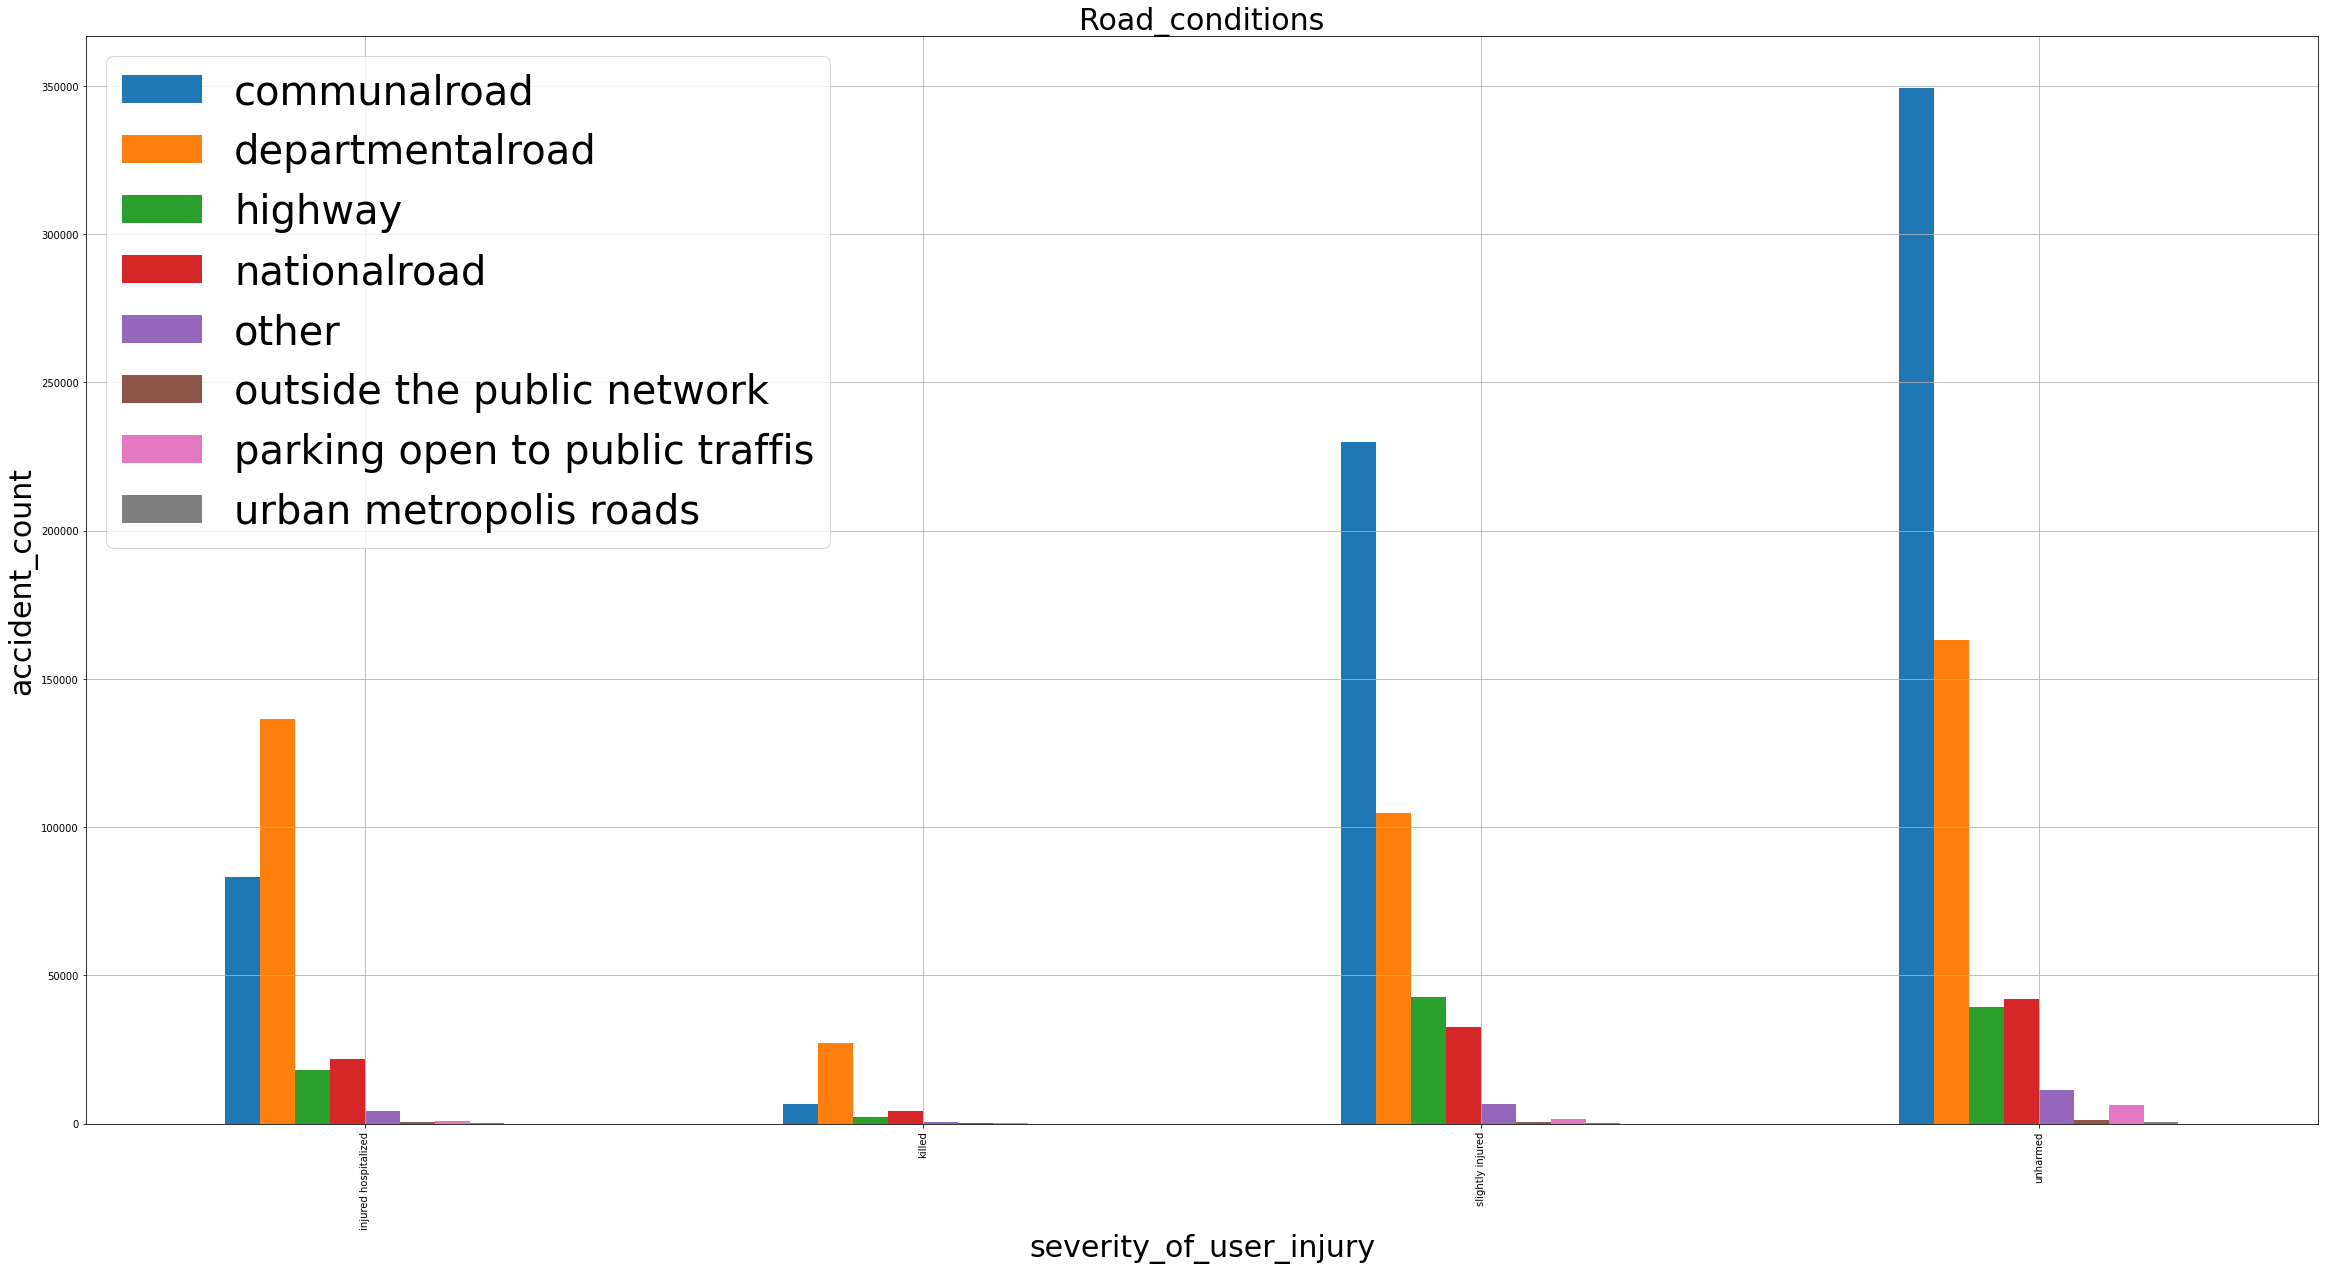

In [54]:
Road_conditions.plot(kind='bar', stacked=False,figsize=(40, 20), grid= True)
plt.title('Road_conditions', fontsize=30)
plt.xlabel('severity_of_user_injury', fontsize = 30)
plt.ylabel('accident_count', fontsize = 30)
plt.legend(fontsize =40)


In [55]:
accident_circumstance1['traffic_regime']= accident_circumstance1['traffic_regime'].replace(0,'notspecified')
accident_circumstance1['traffic_regime']= accident_circumstance1['traffic_regime'].replace(1,'oneway')
accident_circumstance1['traffic_regime']= accident_circumstance1['traffic_regime'].replace(2,'bidirectional')
accident_circumstance1['traffic_regime']= accident_circumstance1['traffic_regime'].replace(3,'seperate carriageway')
accident_circumstance1['traffic_regime']= accident_circumstance1['traffic_regime'].replace(4,'with variable assignment channels')

In [56]:
Road_conditions = pd.crosstab(index = accident_circumstance1['severity_of_user_injury'], columns = accident_circumstance1['traffic_regime'], values=accident_circumstance1['Num_Acc'], aggfunc=np.count_nonzero)
Road_conditions

traffic_regime,bidirectional,notspecified,oneway,seperate carriageway,with variable assignment channels
severity_of_user_injury,,,,,
injured hospitalized,194271,13496,27038,29259,1269
killed,33079,1410,1996,4214,124
slightly injured,238678,22499,90323,65582,2211
unharmed,376222,34653,122099,76013,3763


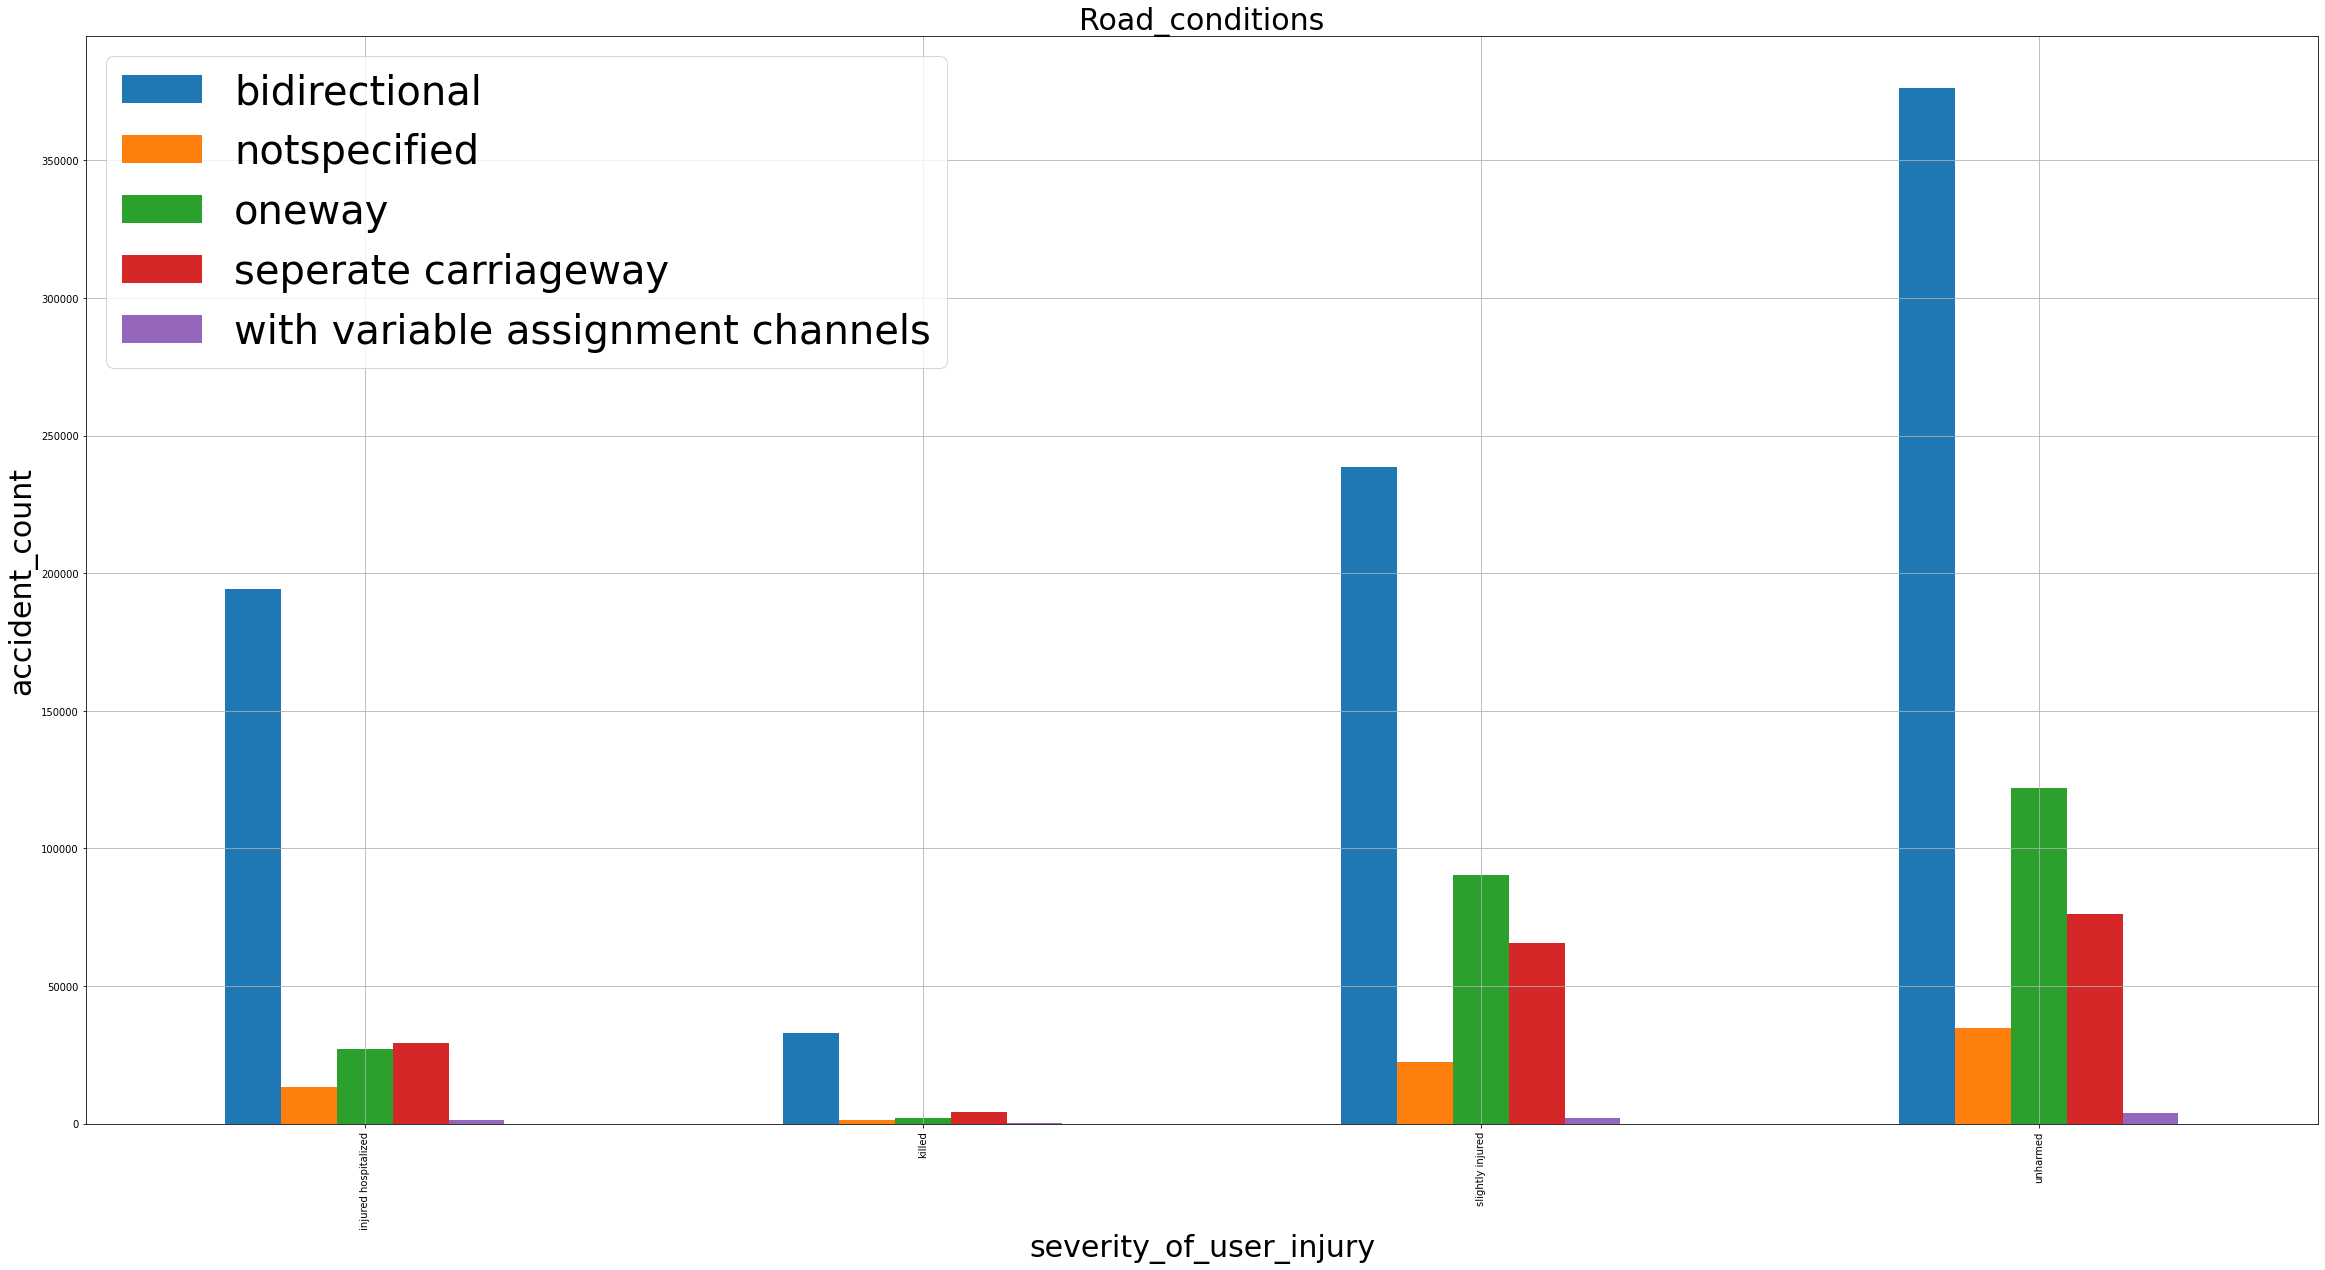

In [57]:
Road_conditions.plot(kind='bar', stacked=False,figsize=(40, 20), grid= True)
plt.title('Road_conditions', fontsize=30)
plt.xlabel('severity_of_user_injury', fontsize = 30)
plt.ylabel('accident_count', fontsize = 30)
plt.legend(fontsize =40)


In [58]:
Road_conditions = pd.crosstab(index = accident_circumstance1['severity_of_user_injury'], columns = accident_circumstance1['collision_type'], values=accident_circumstance1['Num_Acc'], aggfunc=np.count_nonzero)
Road_conditions

collision_type,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0
severity_of_user_injury,,,,,,,,
injured hospitalized,6.0,39289.0,19673.0,60593.0,2903.0,7790.0,86849.0,48230.0
killed,NaN,7678.0,1571.0,4707.0,269.0,1615.0,17597.0,7386.0
slightly injured,17.0,33591.0,58320.0,128109.0,12186.0,11423.0,115528.0,60119.0
unharmed,19.0,48585.0,78464.0,189095.0,27099.0,22153.0,224858.0,22477.0


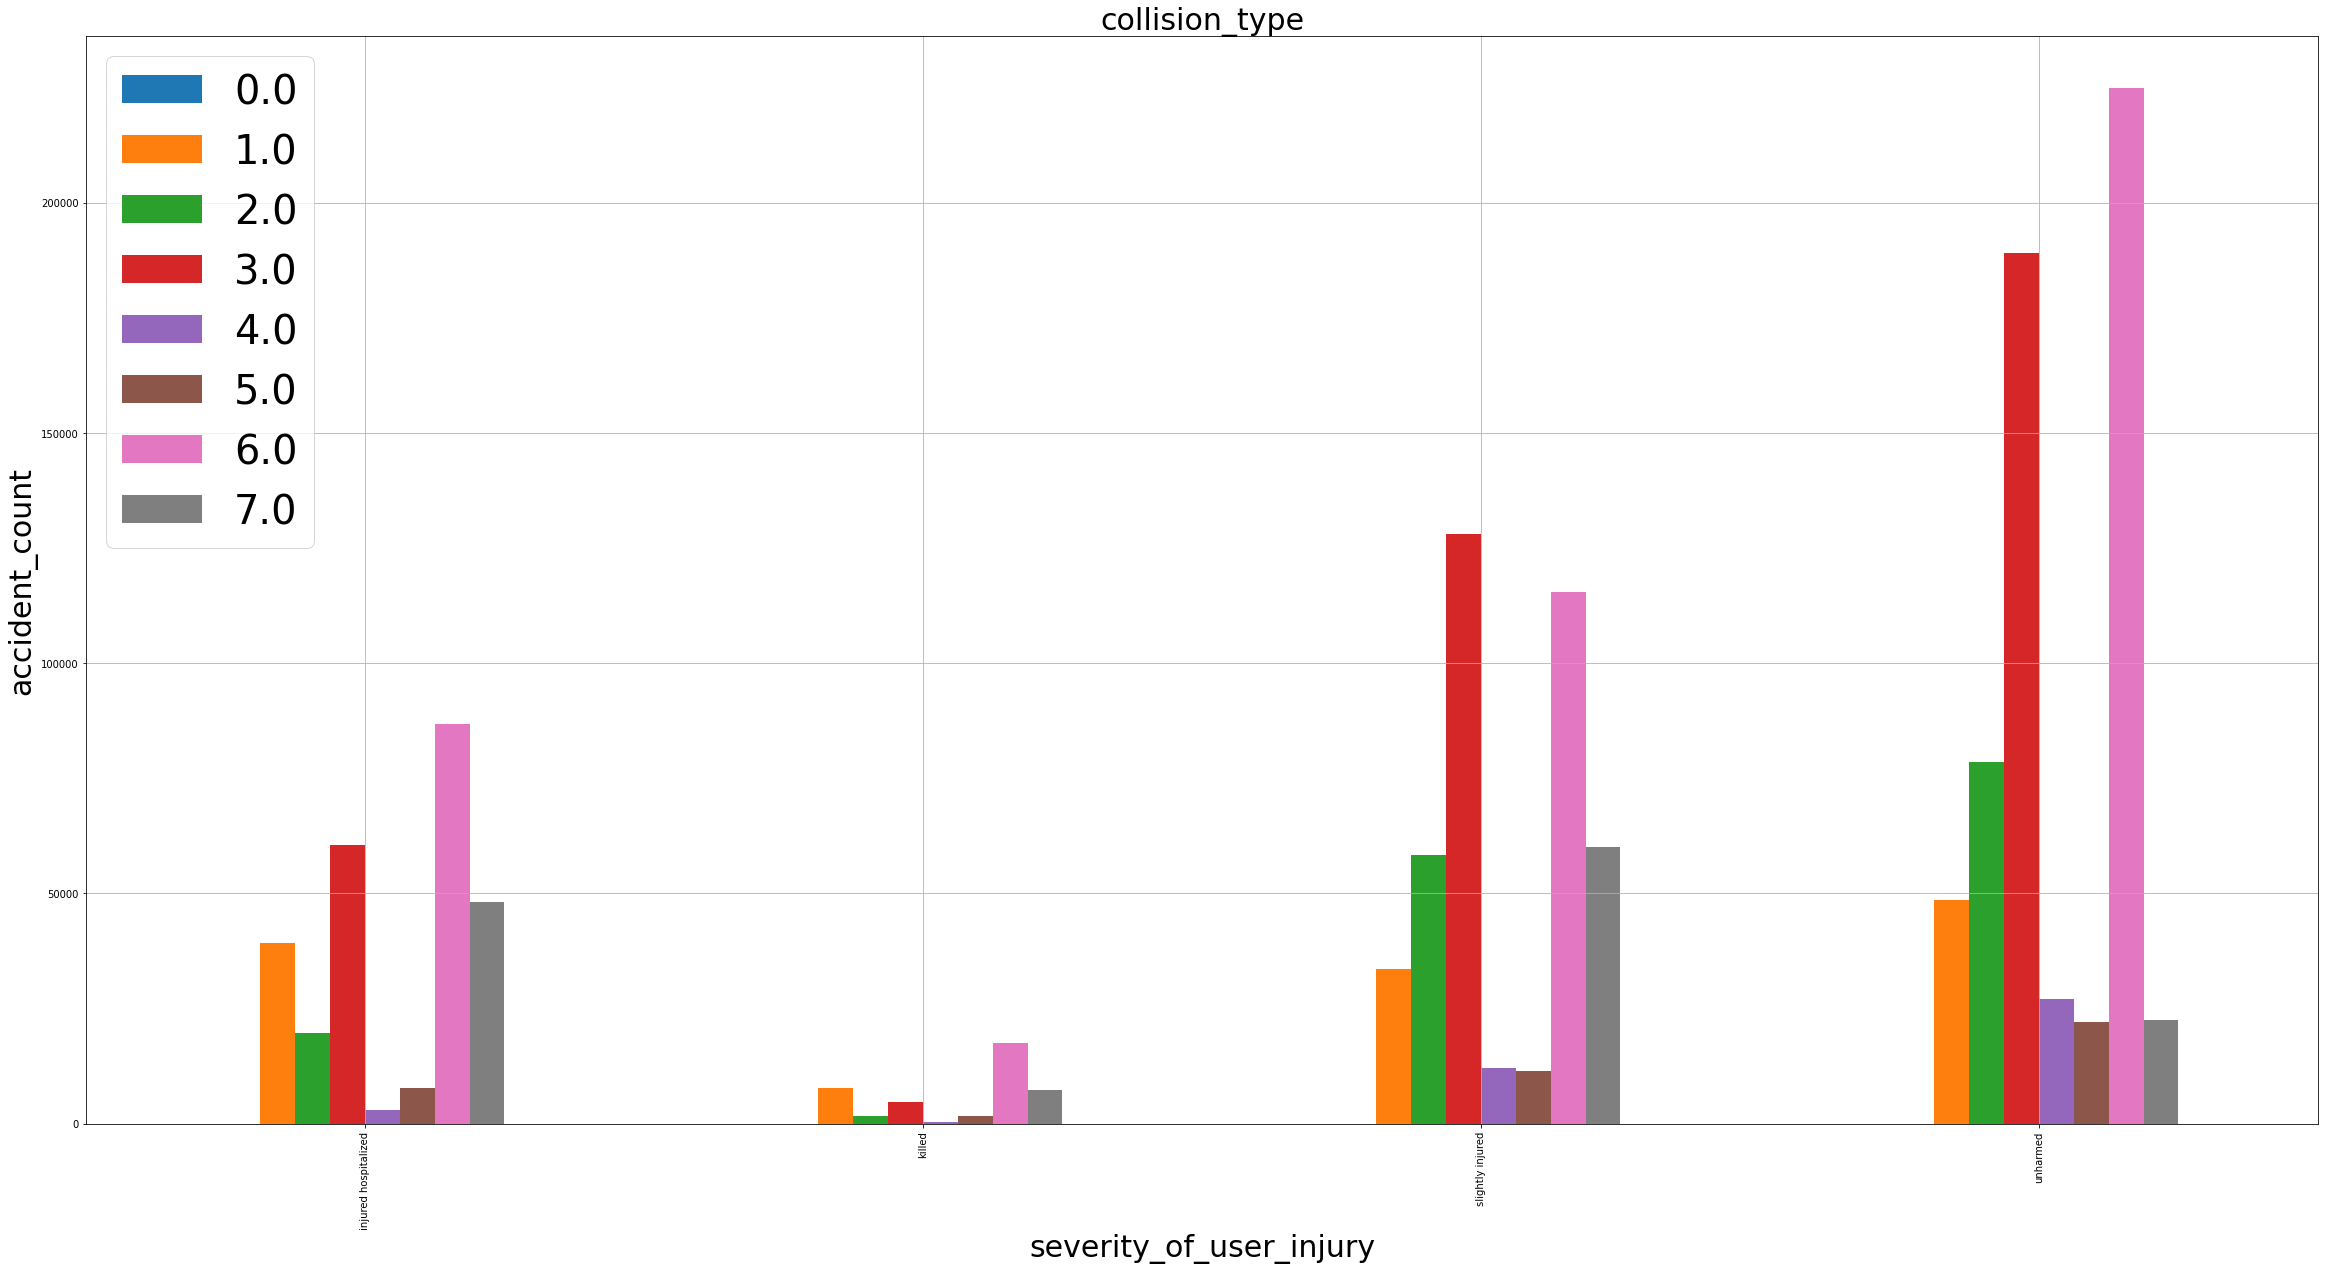

In [59]:
Road_conditions.plot(kind='bar', stacked=False,figsize=(40, 20), grid= True)
plt.title('collision_type', fontsize=30)
plt.xlabel('severity_of_user_injury', fontsize = 30)
plt.ylabel('accident_count', fontsize = 30)
plt.legend(fontsize =40)

In [60]:
accident_circumstance1['road_gradient']= accident_circumstance1['road_gradient'].replace(0,'notspecified')
accident_circumstance1['road_gradient']= accident_circumstance1['road_gradient'].replace(1,'flat')
accident_circumstance1['road_gradient']= accident_circumstance1['road_gradient'].replace(2,'slop')
accident_circumstance1['road_gradient']= accident_circumstance1['road_gradient'].replace(3,'hilltop')
accident_circumstance1['road_gradient']= accident_circumstance1['road_gradient'].replace(4,'bottom of the coast')





In [61]:
Road_conditions = pd.crosstab(index = accident_circumstance1['severity_of_user_injury'], columns = accident_circumstance1['road_gradient'], values=accident_circumstance1['Num_Acc'], aggfunc=np.count_nonzero)
Road_conditions

road_gradient,bottom of the coast,flat,hilltop,notspecified,slop
severity_of_user_injury,,,,,
injured hospitalized,5045,182599,6143,24797,46749
killed,1082,26412,1249,3864,8216
slightly injured,4971,323794,7107,25026,58395
unharmed,6443,487317,9248,35930,73812


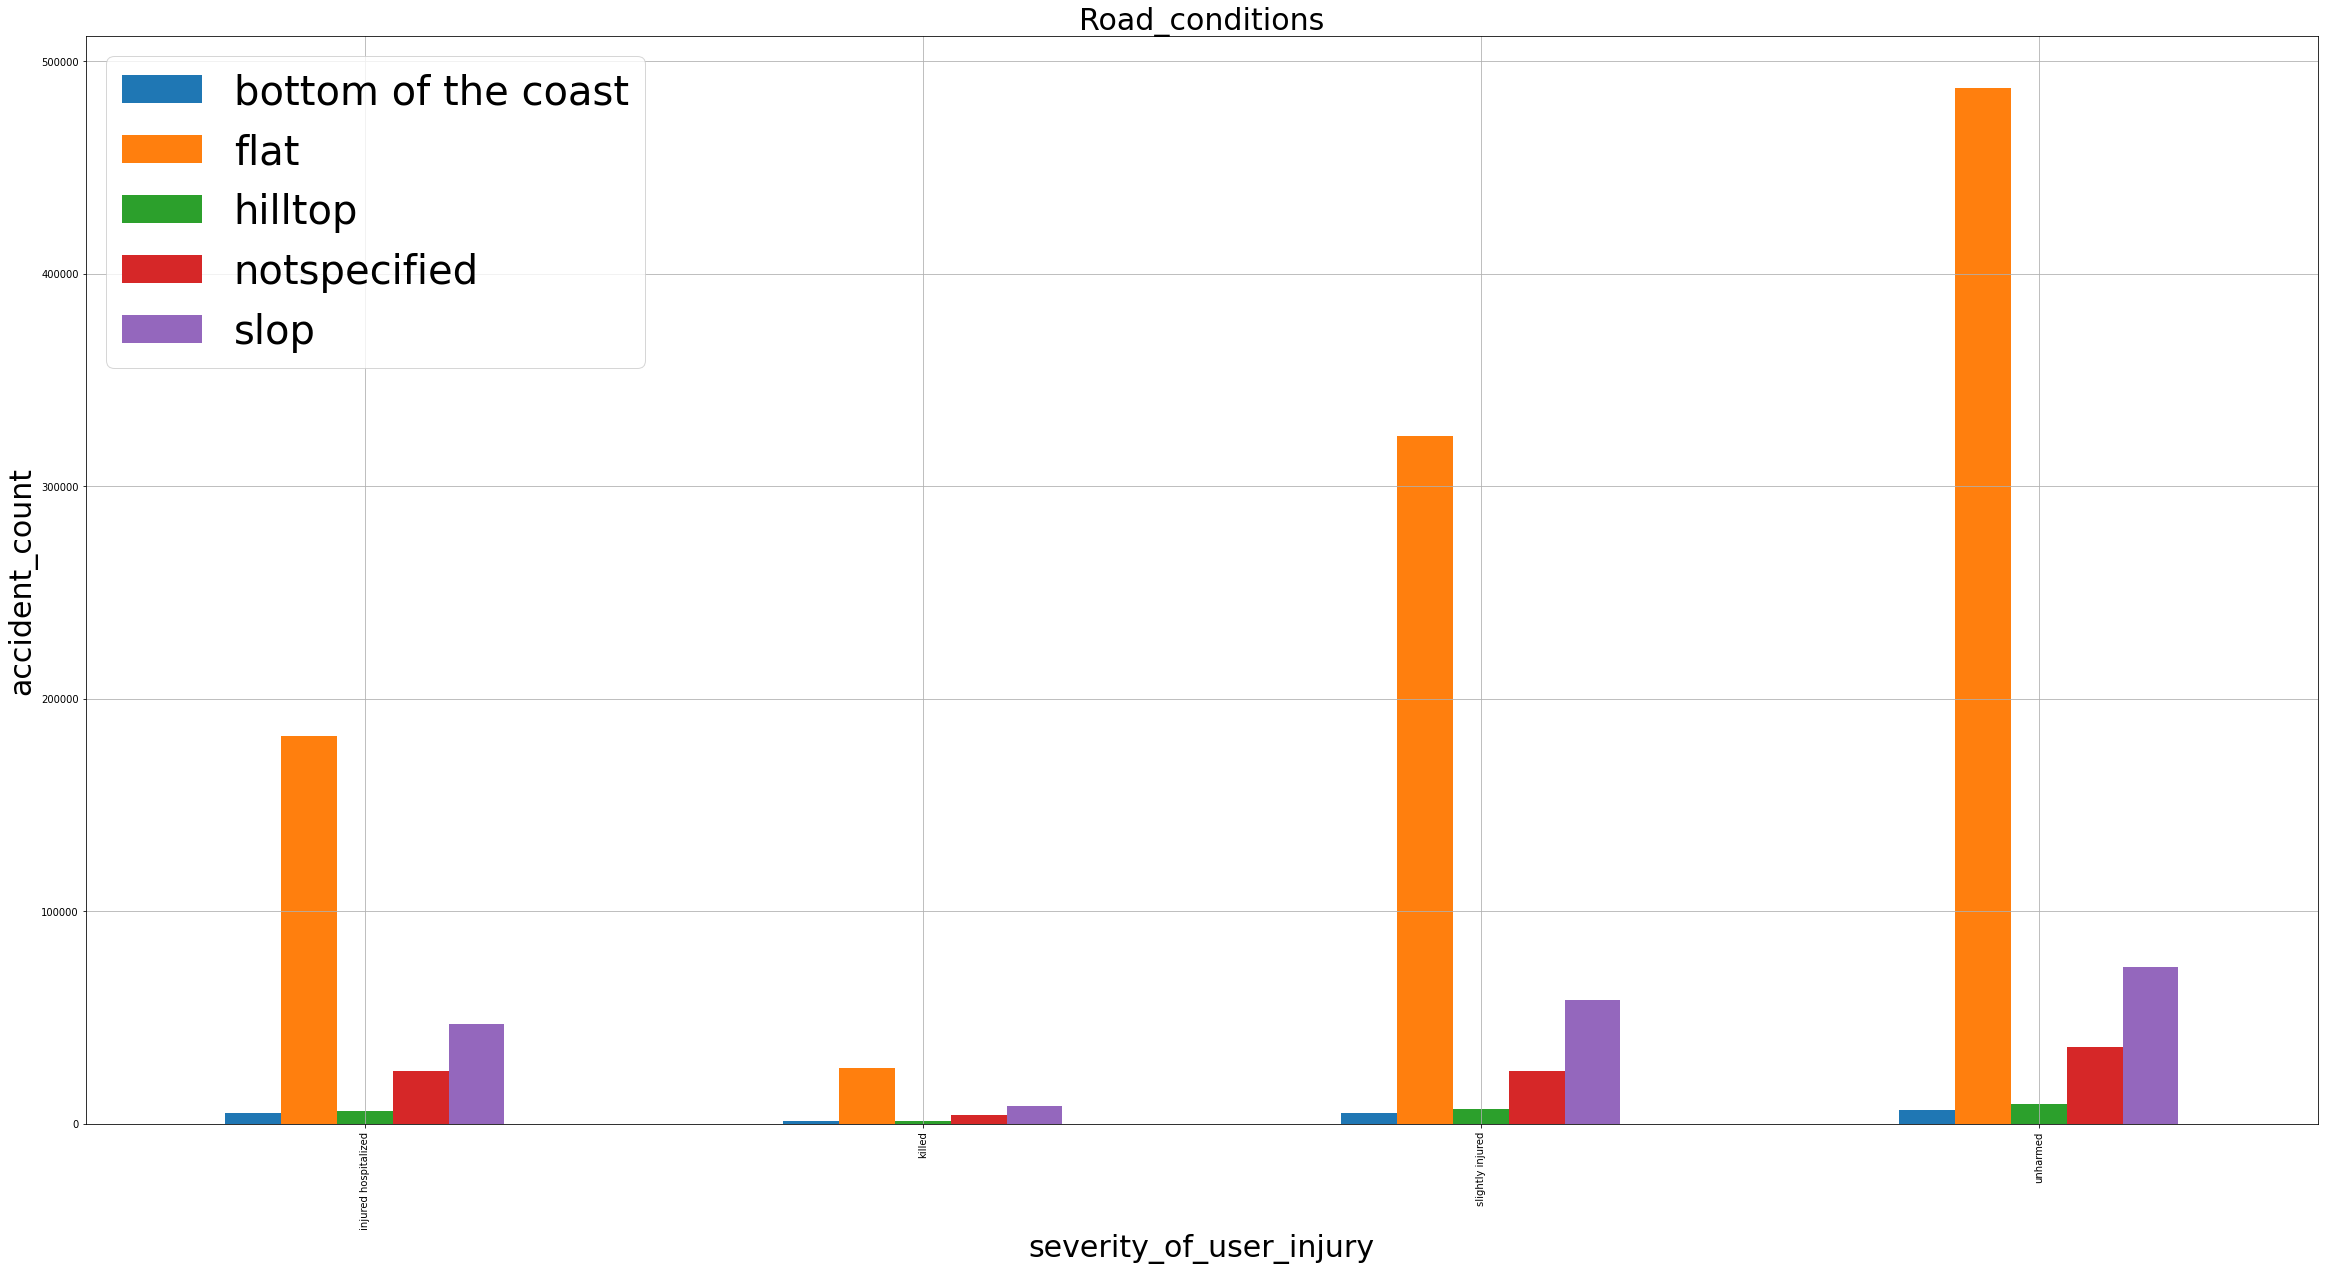

In [62]:
Road_conditions.plot(kind='bar', stacked=False,figsize=(40, 20), grid= True)
plt.title('Road_conditions', fontsize=30)
plt.xlabel('severity_of_user_injury', fontsize = 30)
plt.ylabel('accident_count', fontsize = 30)
plt.legend(fontsize =40)

In [63]:
accident_circumstance1['intersection:']= accident_circumstance1['intersection:'].replace(0,'notspecified')
accident_circumstance1['intersection:']= accident_circumstance1['intersection:'].replace(1,'excluding intersection')
accident_circumstance1['intersection:']= accident_circumstance1['intersection:'].replace(2,'intersection in X')
accident_circumstance1['intersection:']= accident_circumstance1['intersection:'].replace(3,'T intersection')
accident_circumstance1['intersection:']= accident_circumstance1['intersection:'].replace(4,'Y intersection')
accident_circumstance1['intersection:']= accident_circumstance1['intersection:'].replace(5,'intersection with more 4 branches')
accident_circumstance1['intersection:']= accident_circumstance1['intersection:'].replace(6,'roundabort')
accident_circumstance1['intersection:']= accident_circumstance1['intersection:'].replace(7,'place')
accident_circumstance1['intersection:']= accident_circumstance1['intersection:'].replace(8,'level crossing')
accident_circumstance1['intersection:']= accident_circumstance1['intersection:'].replace(9,'other')



In [64]:
Road_conditions = pd.crosstab(index = accident_circumstance1['severity_of_user_injury'], columns = accident_circumstance1['intersection:'], values=accident_circumstance1['Num_Acc'], aggfunc=np.count_nonzero)
Road_conditions

intersection:,T intersection,Y intersection,excluding intersection,intersection in X,intersection with more 4 branches,level crossing,notspecified,other,place,roundabort
severity_of_user_injury,,,,,,,,,,
injured hospitalized,17372,2900,209415,21053,949,355,35,5112,768,7374
killed,1164,285,36182,1593,46,195,4,661,54,639
slightly injured,40908,7242,285258,56303,6336,283,50,6284,4240,12389
unharmed,61212,9884,412124,84278,8096,715,107,11760,6459,18115


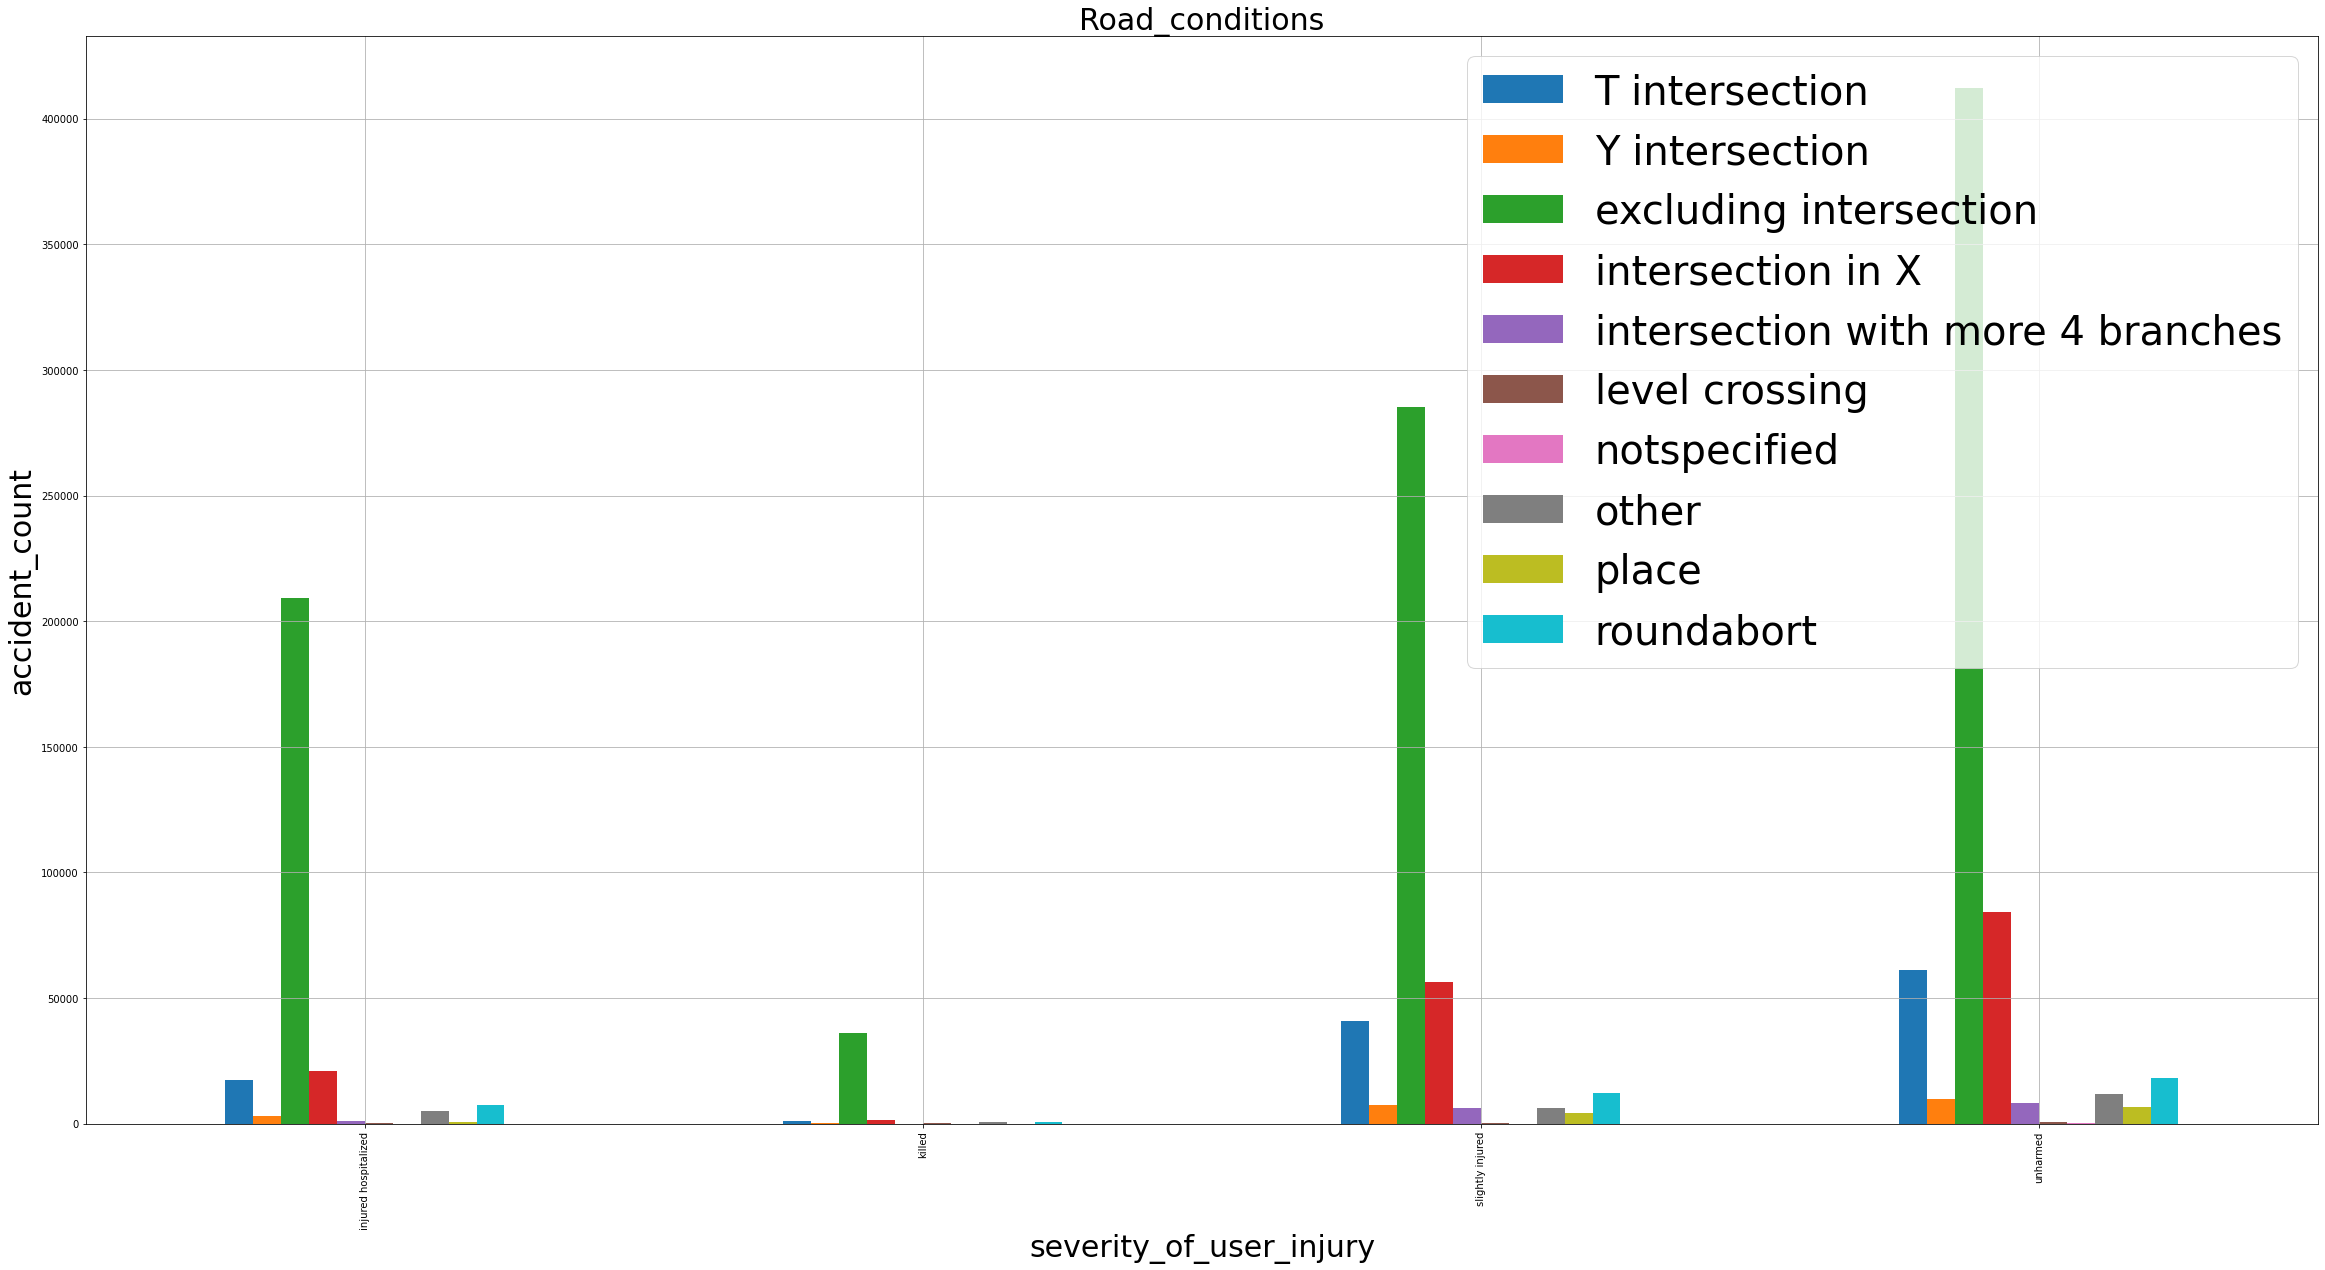

In [65]:
Road_conditions.plot(kind='bar', stacked=False, figsize=(40, 20), grid= True)
plt.title('Road_conditions', fontsize=30)
plt.xlabel('severity_of_user_injury', fontsize = 30)
plt.ylabel('accident_count', fontsize = 30)
plt.legend(fontsize =40)


In [66]:
Road_conditions = pd.crosstab(index = accident_circumstance1['severity_of_user_injury'], columns = accident_circumstance1['total_number_of_traffic_lanes'], values=accident_circumstance1['Num_Acc'], aggfunc=np.count_nonzero)
Road_conditions

total_number_of_traffic_lanes,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,60.0,62.0,65.0,70.0,76.0,84.0,86.0,90.0,91.0,99.0
severity_of_user_injury,,,,,,,,,,,,,,,,,,,,,
injured hospitalized,38911.0,23748.0,168600.0,14303.0,15307.0,1509.0,2275.0,133.0,358.0,22.0,...,NaN,NaN,NaN,1.0,NaN,NaN,1.0,2.0,NaN,NaN
killed,6011.0,2367.0,28315.0,1809.0,1860.0,171.0,233.0,9.0,25.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
slightly injured,40081.0,52558.0,222444.0,37692.0,48170.0,4933.0,10063.0,664.0,1908.0,166.0,...,3.0,NaN,1.0,3.0,NaN,NaN,NaN,2.0,1.0,1.0
unharmed,65239.0,83625.0,333017.0,50103.0,59488.0,6690.0,10885.0,696.0,2048.0,179.0,...,NaN,1.0,NaN,1.0,1.0,1.0,NaN,2.0,NaN,NaN


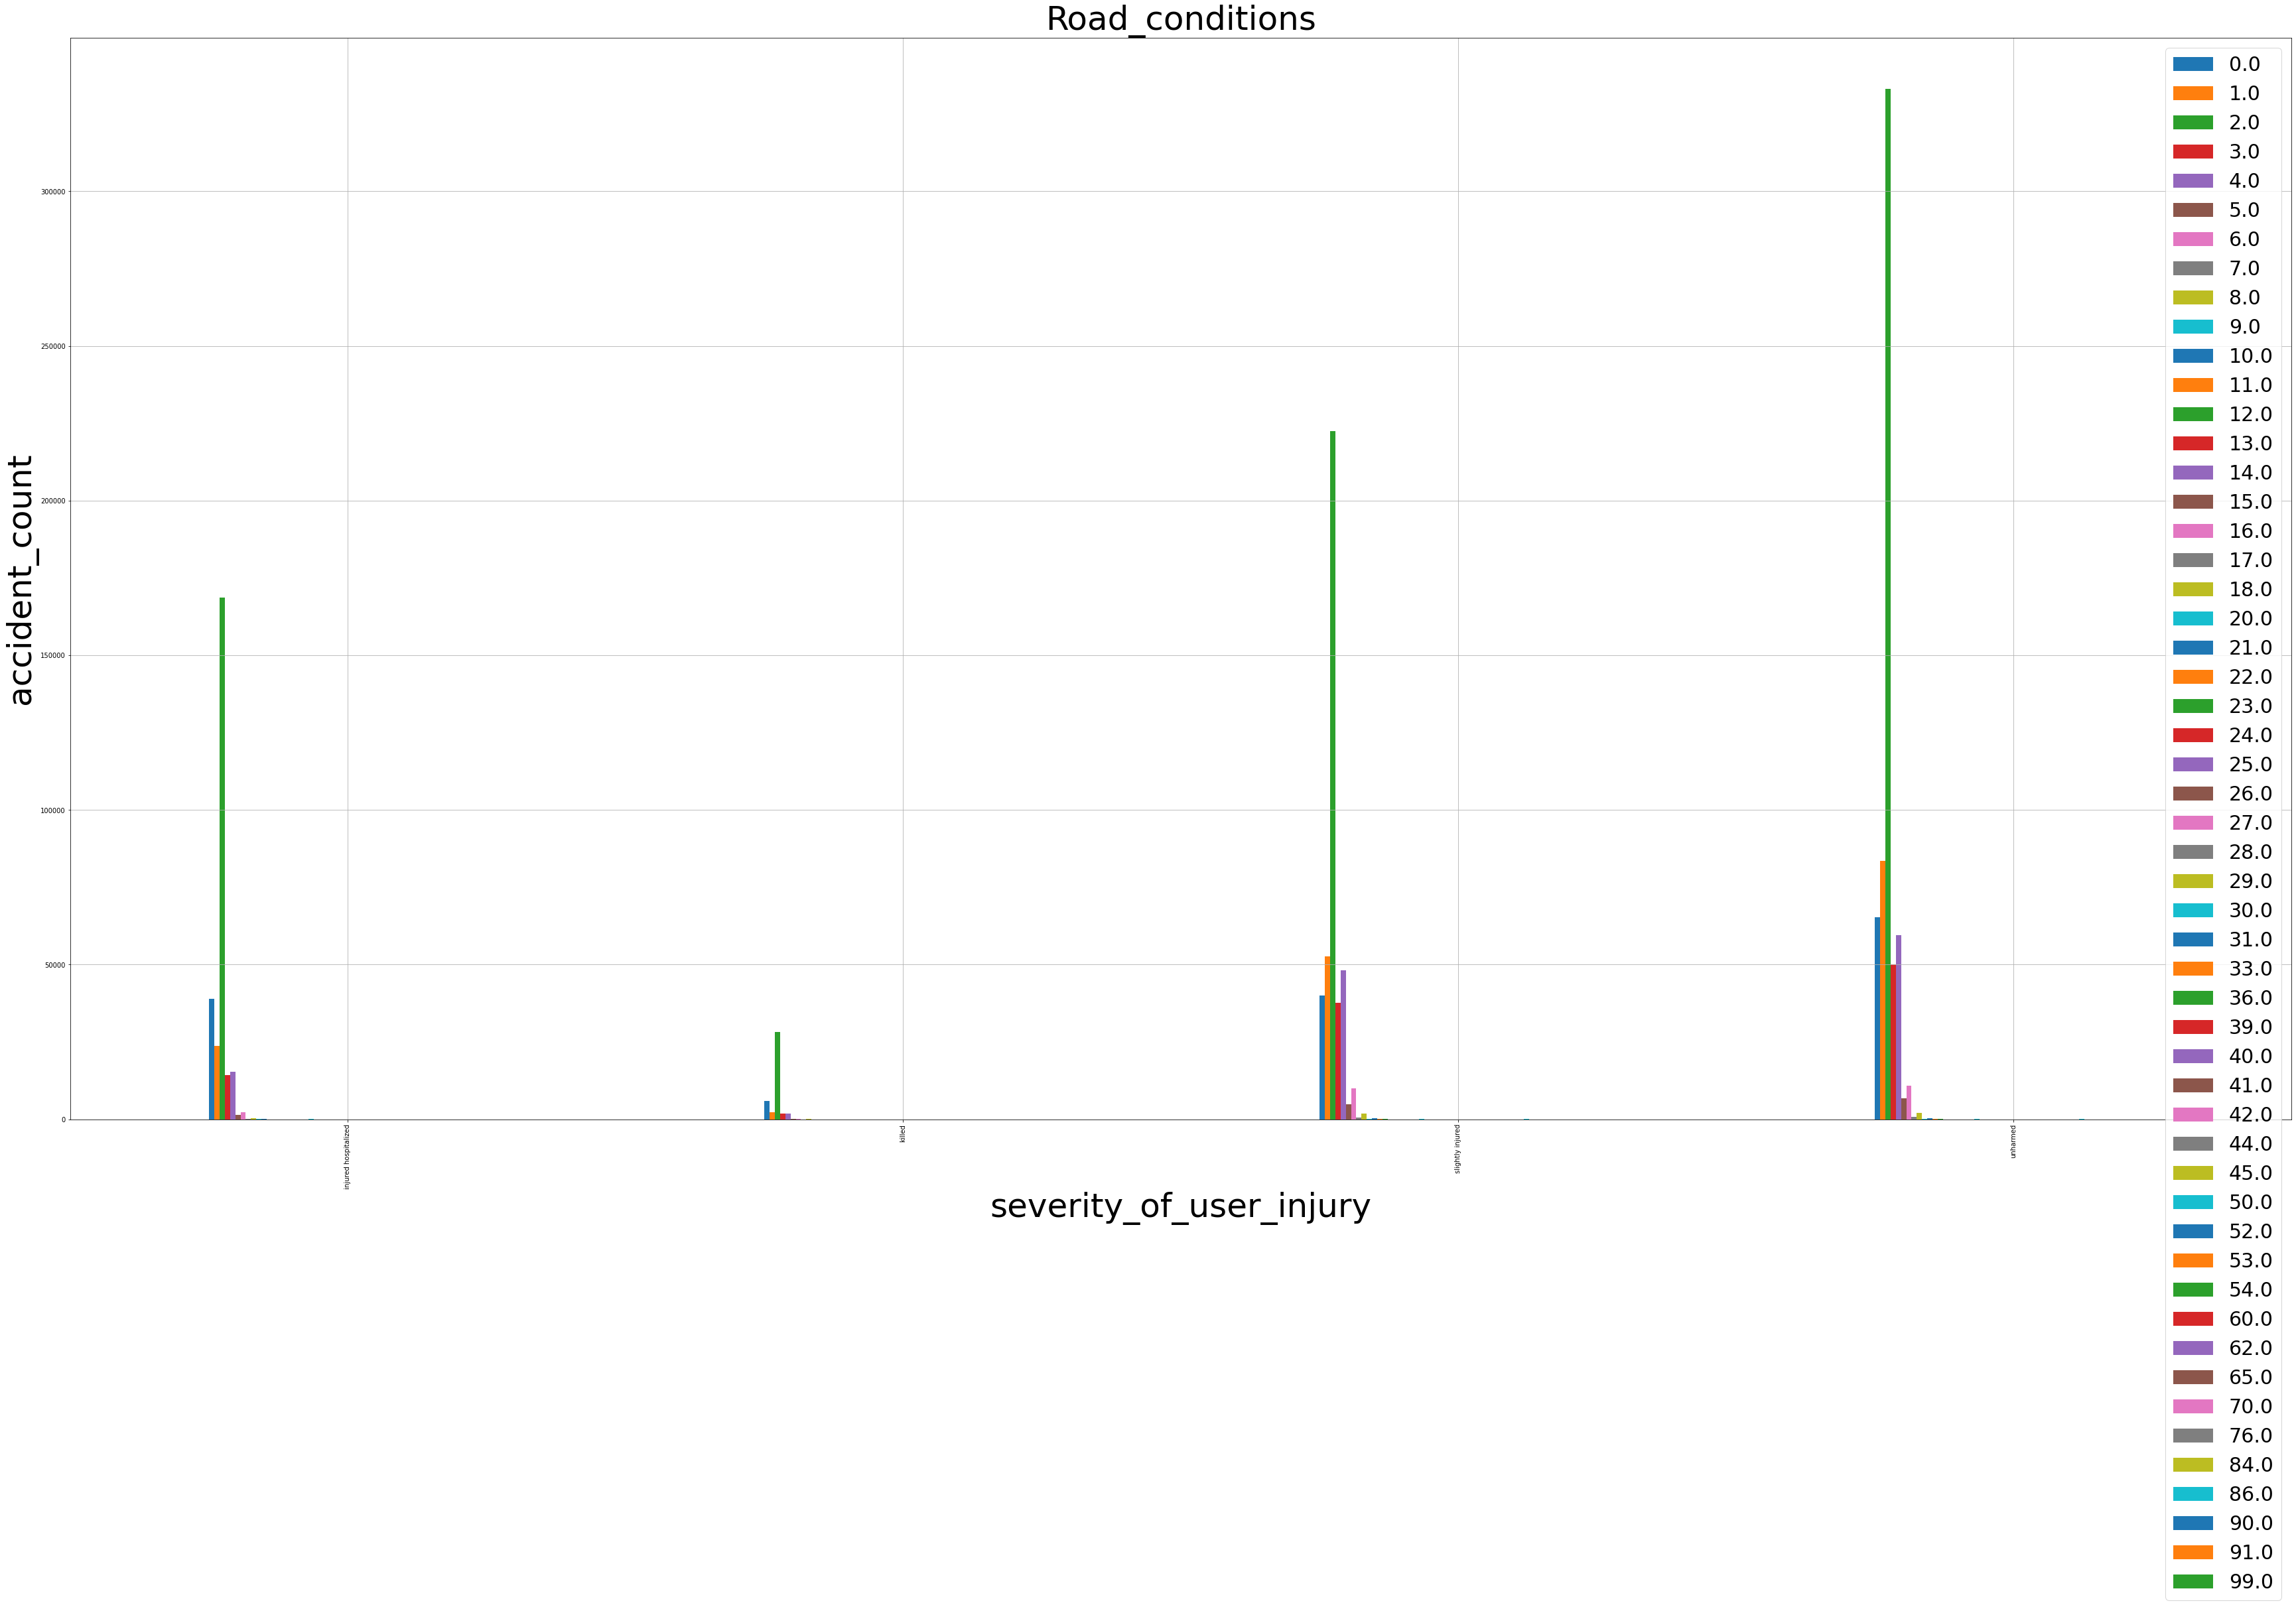

In [67]:
Road_conditions.plot(kind='bar', stacked=False,figsize=(60, 30), grid= True)
plt.title('Road_conditions', fontsize=50)
plt.xlabel('severity_of_user_injury', fontsize = 50)
plt.ylabel('accident_count', fontsize = 50)
plt.legend(fontsize =30)

In [68]:
Road_conditions = pd.crosstab(index = accident_circumstance1['total_number_of_traffic_lanes'], columns = accident_circumstance1['severity_of_user_injury'], values=accident_circumstance1['Num_Acc'], aggfunc=np.count_nonzero)
Road_conditions

severity_of_user_injury,injured hospitalized,killed,slightly injured,unharmed
total_number_of_traffic_lanes,,,,
0.0,38911.0,6011.0,40081.0,65239.0
1.0,23748.0,2367.0,52558.0,83625.0
2.0,168600.0,28315.0,222444.0,333017.0
3.0,14303.0,1809.0,37692.0,50103.0
4.0,15307.0,1860.0,48170.0,59488.0
5.0,1509.0,171.0,4933.0,6690.0
6.0,2275.0,233.0,10063.0,10885.0
7.0,133.0,9.0,664.0,696.0
8.0,358.0,25.0,1908.0,2048.0


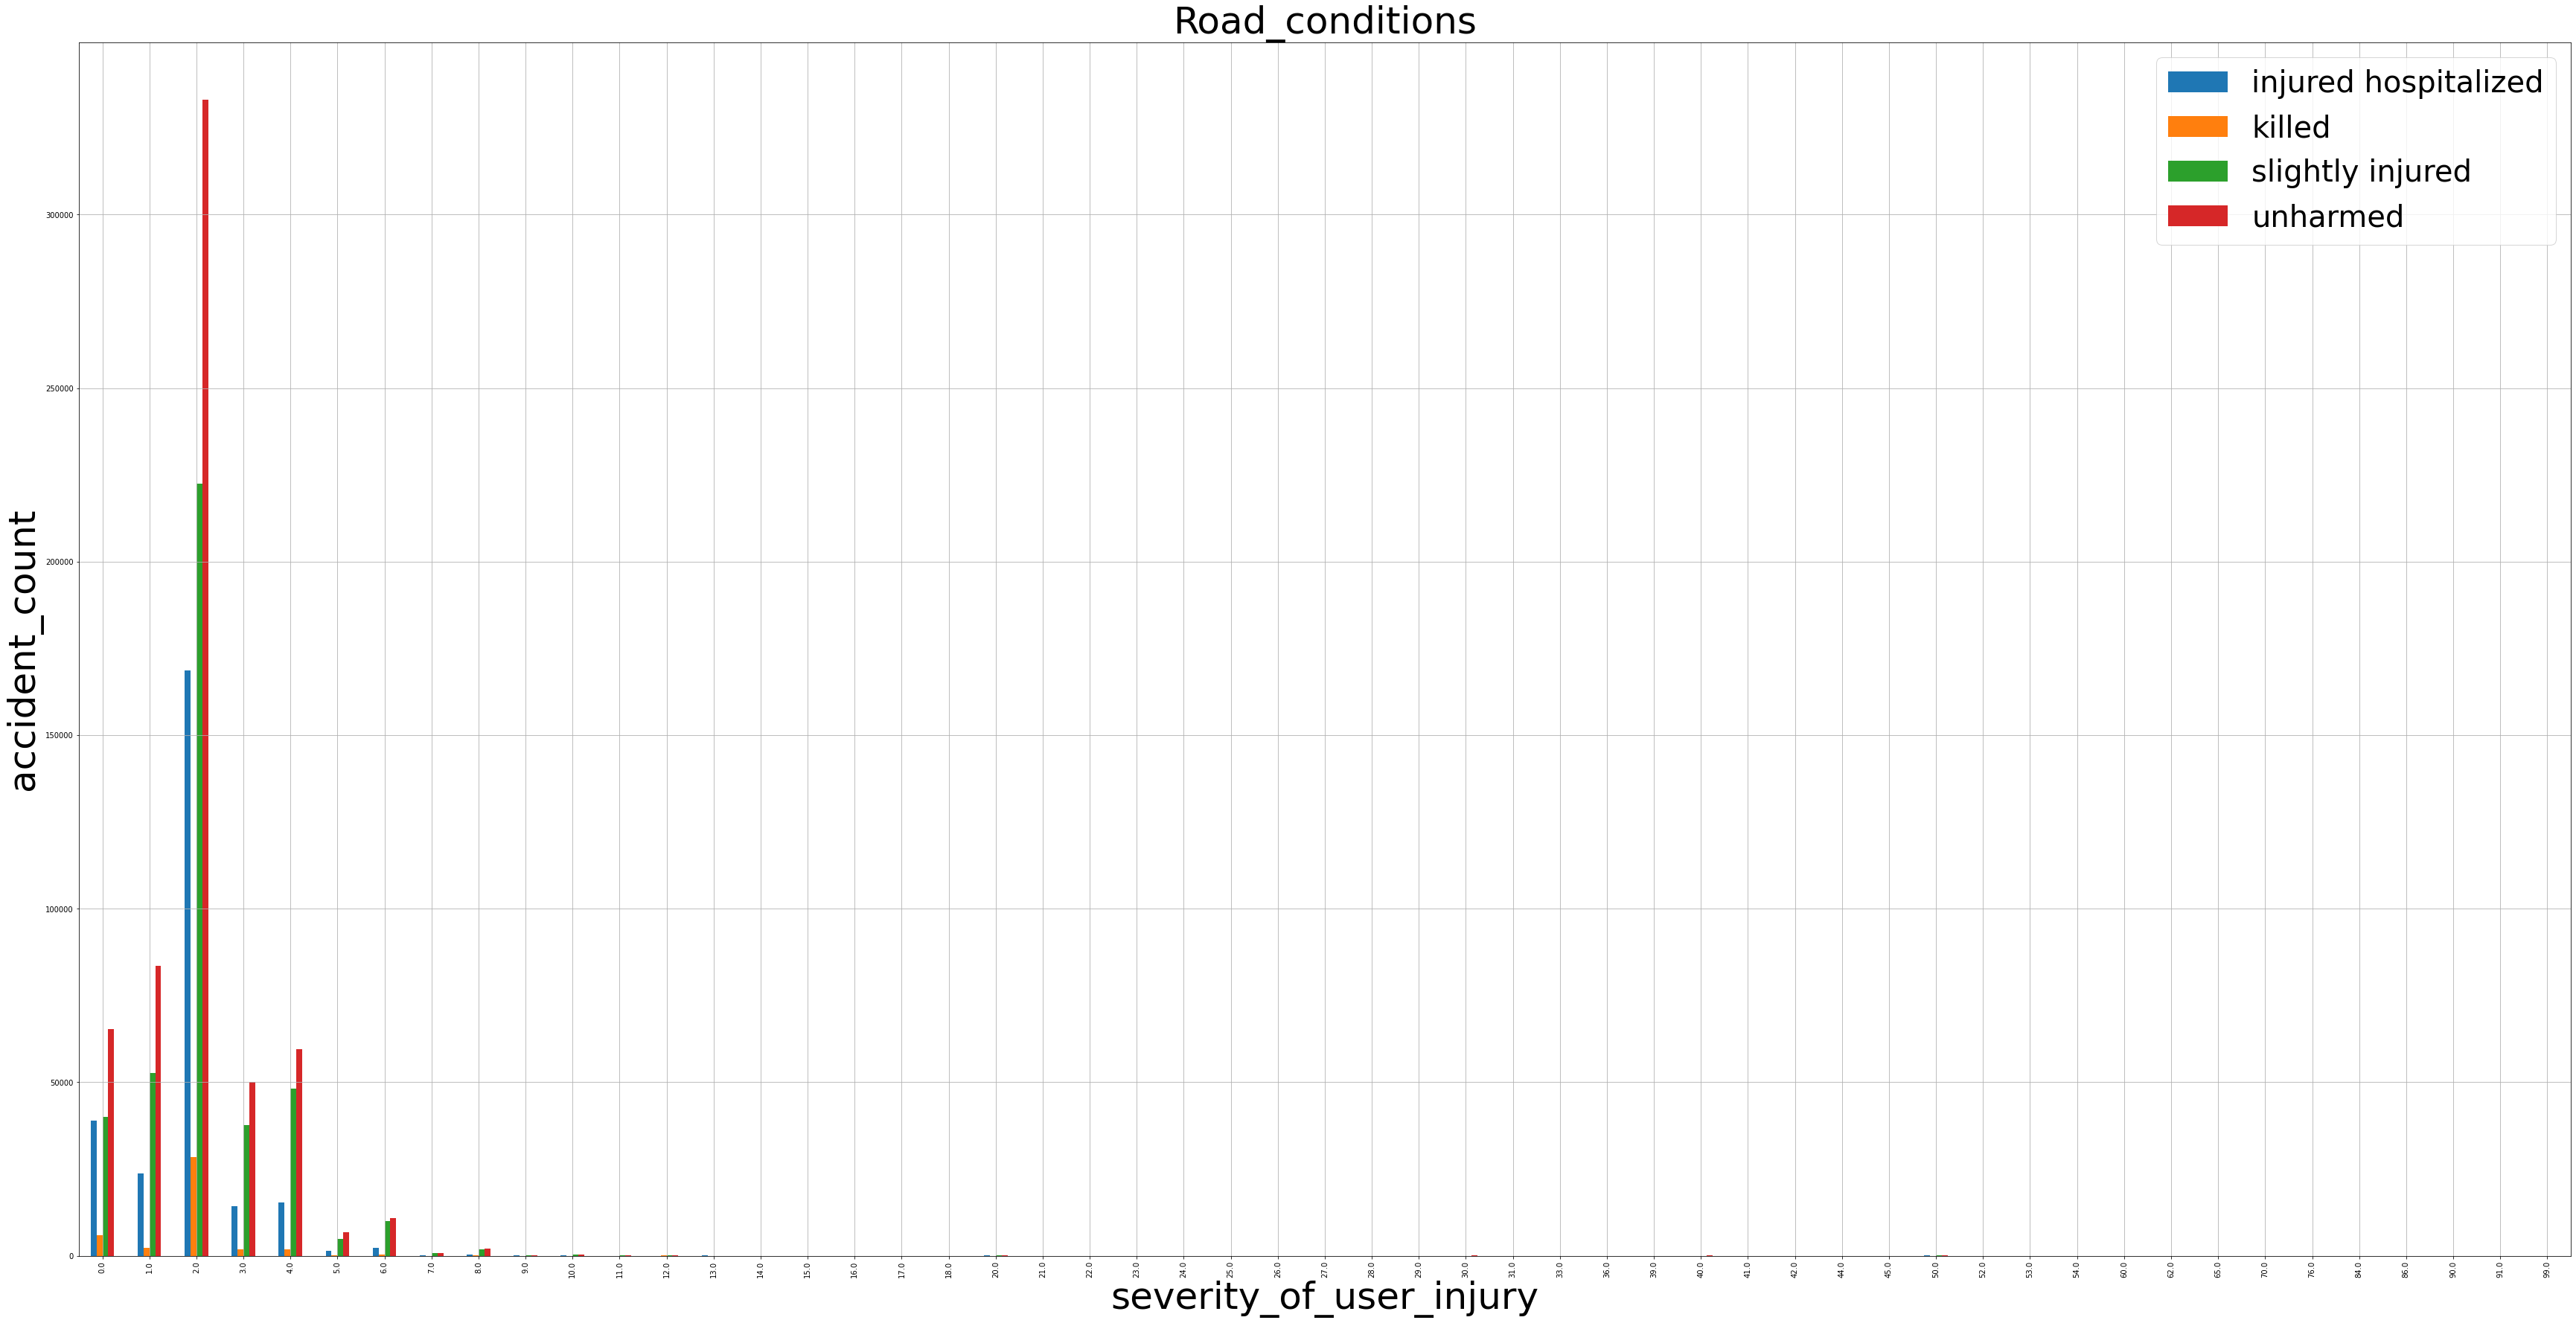

In [69]:
Road_conditions.plot(kind='bar', stacked=False,figsize=(60, 30), grid= True)
plt.title('Road_conditions', fontsize=50)
plt.xlabel('severity_of_user_injury', fontsize = 50)
plt.ylabel('accident_count', fontsize = 50)
plt.legend(fontsize =40)

In [70]:
Age = pd.crosstab(index = accident_circumstance1['driver_birthyr'], columns = accident_circumstance1['severity_of_user_injury'], values=accident_circumstance1['Num_Acc'], aggfunc=np.count_nonzero)
Age

severity_of_user_injury,injured hospitalized,killed,slightly injured,unharmed
driver_birthyr,,,,
1898.0,1.0,1.0,6.0,5.0
1899.0,1.0,NaN,1.0,NaN
1900.0,9.0,NaN,15.0,24.0
1901.0,4.0,NaN,1.0,10.0
1905.0,NaN,1.0,NaN,1.0
...,...,...,...,...
2013.0,15.0,NaN,22.0,NaN
2014.0,11.0,2.0,37.0,4.0
2015.0,5.0,1.0,14.0,1.0


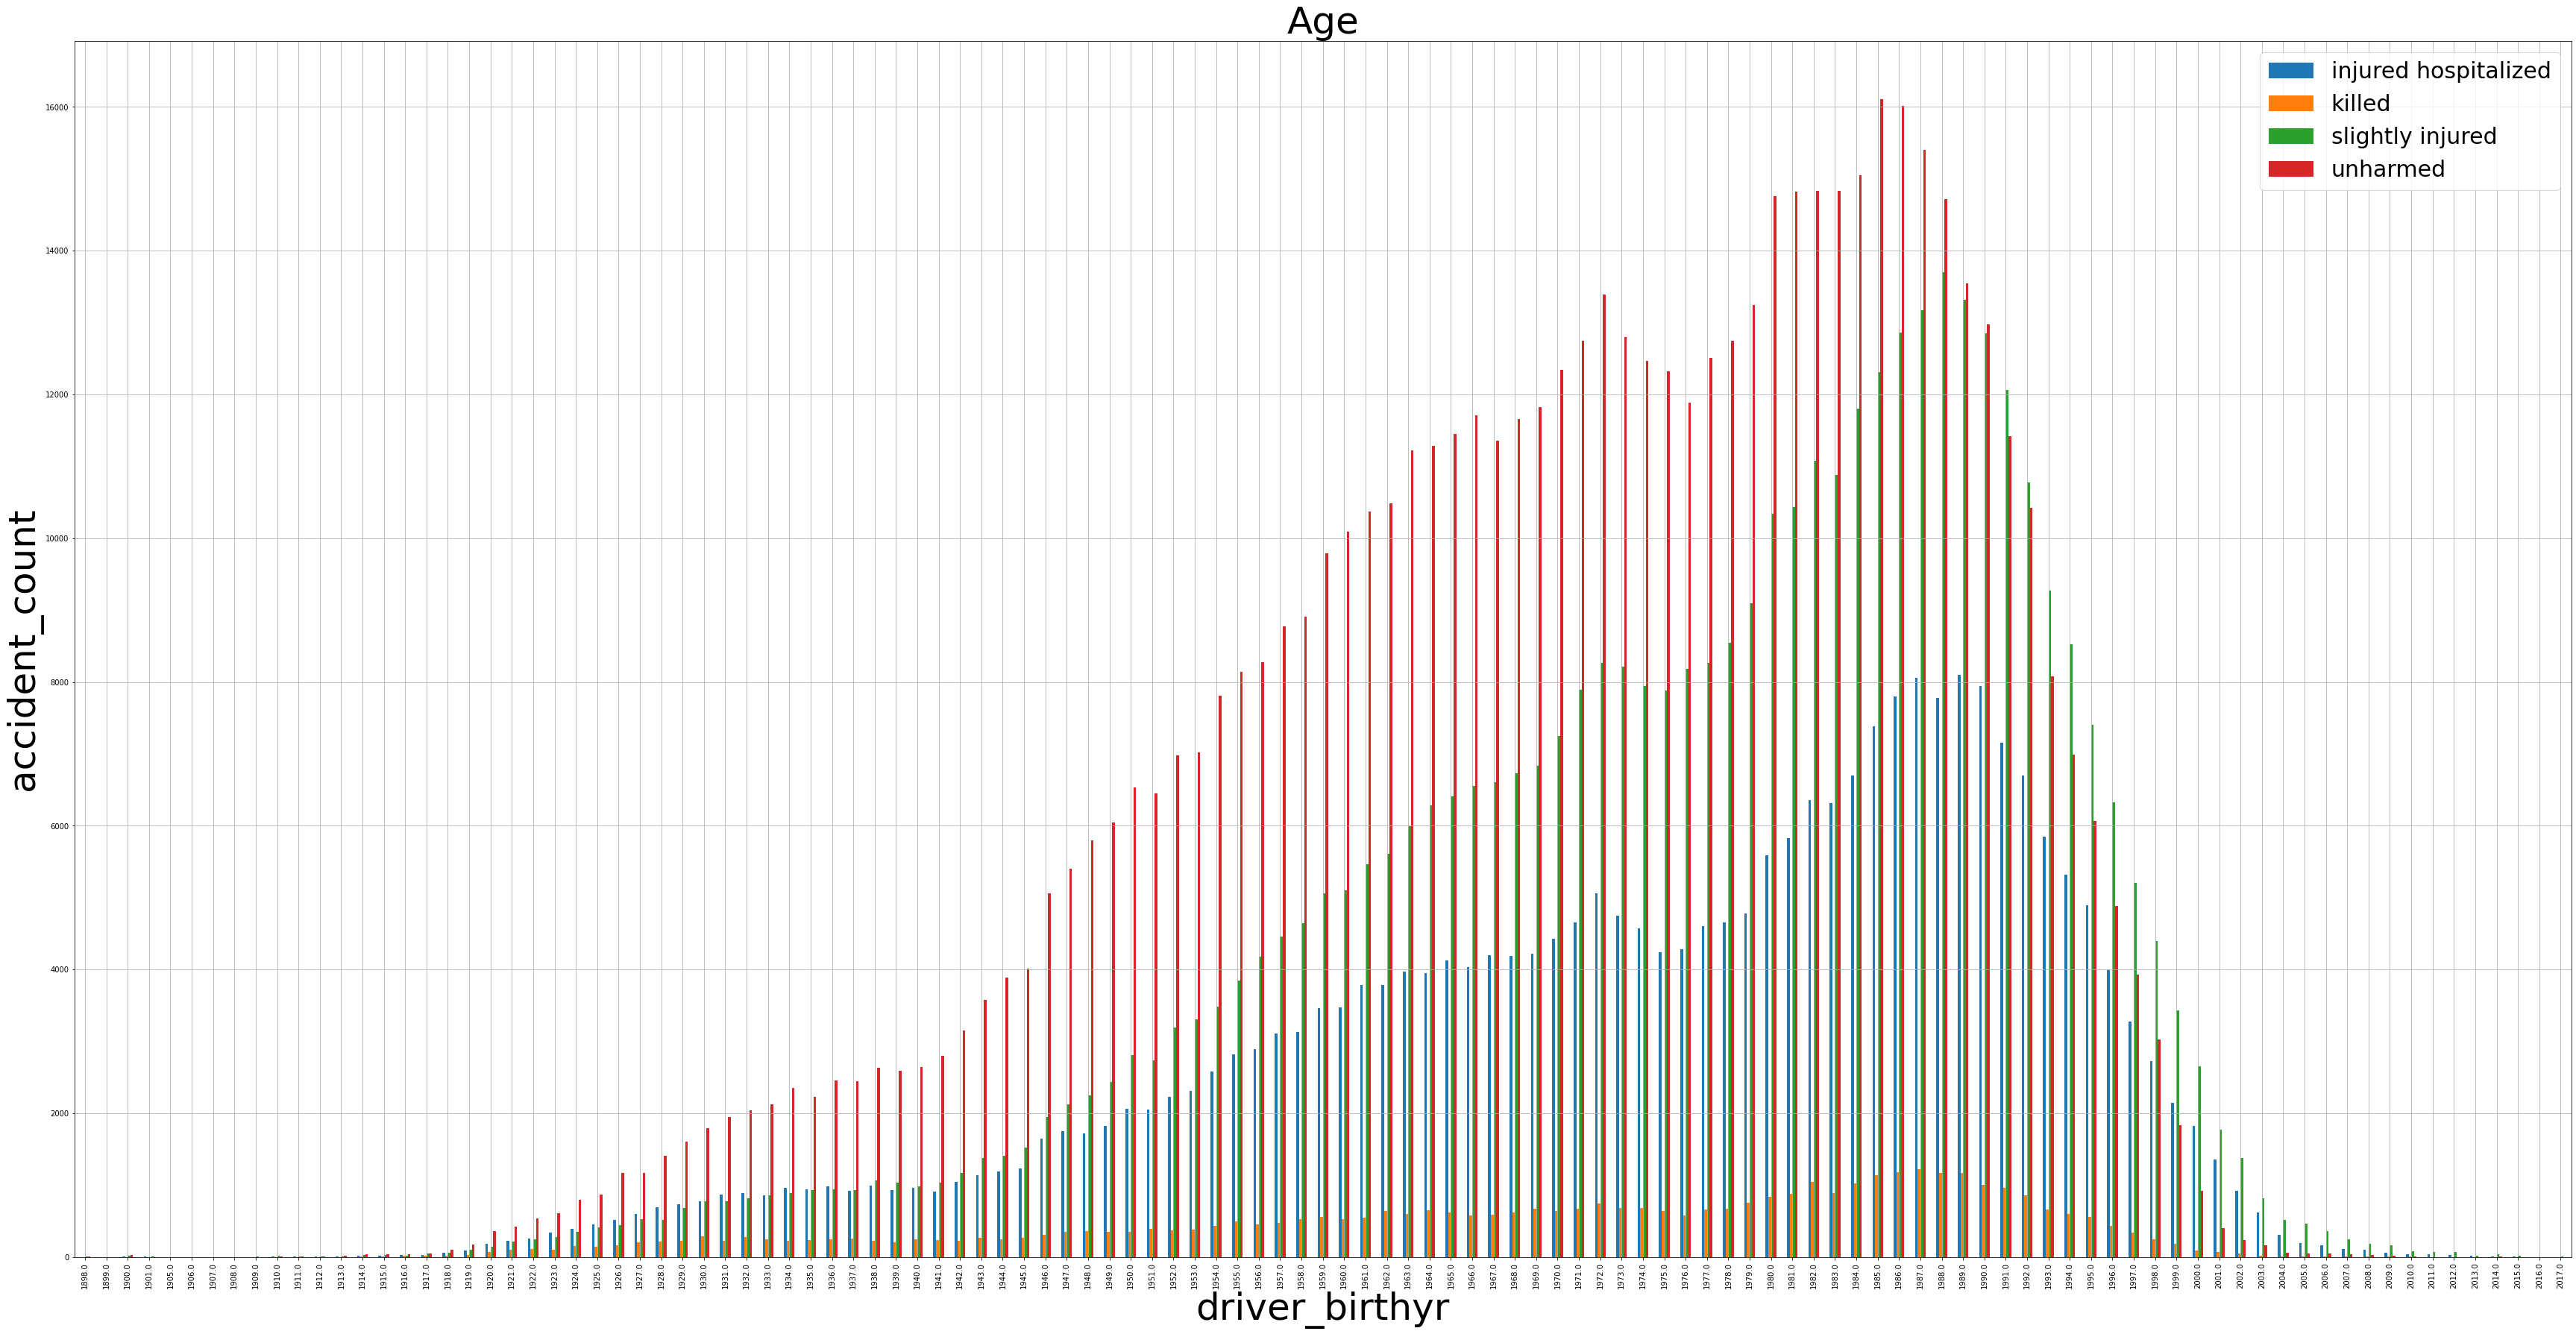

In [71]:
Age.plot(kind='bar', stacked=False,figsize=(60, 30), grid= True)
plt.title('Age', fontsize=50)
plt.xlabel('driver_birthyr', fontsize = 50)
plt.ylabel('accident_count', fontsize = 50)
plt.legend(fontsize =30)

In [72]:
Safety_equipement = pd.crosstab(index = accident_circumstance1['security_equipement_1'], columns = accident_circumstance1['severity_of_user_injury'], values=accident_circumstance1['Num_Acc'], aggfunc=np.count_nonzero)
Safety_equipement


severity_of_user_injury,injured hospitalized,killed,slightly injured,unharmed
security_equipement_1,,,,
0.0,9095,1292,13802,3367
1.0,125764,24980,203793,556649
2.0,118682,13398,177992,34325
3.0,98,11,220,129
4.0,1047,157,2231,526
8.0,9,2,30,12
9.0,10638,983,21225,17742


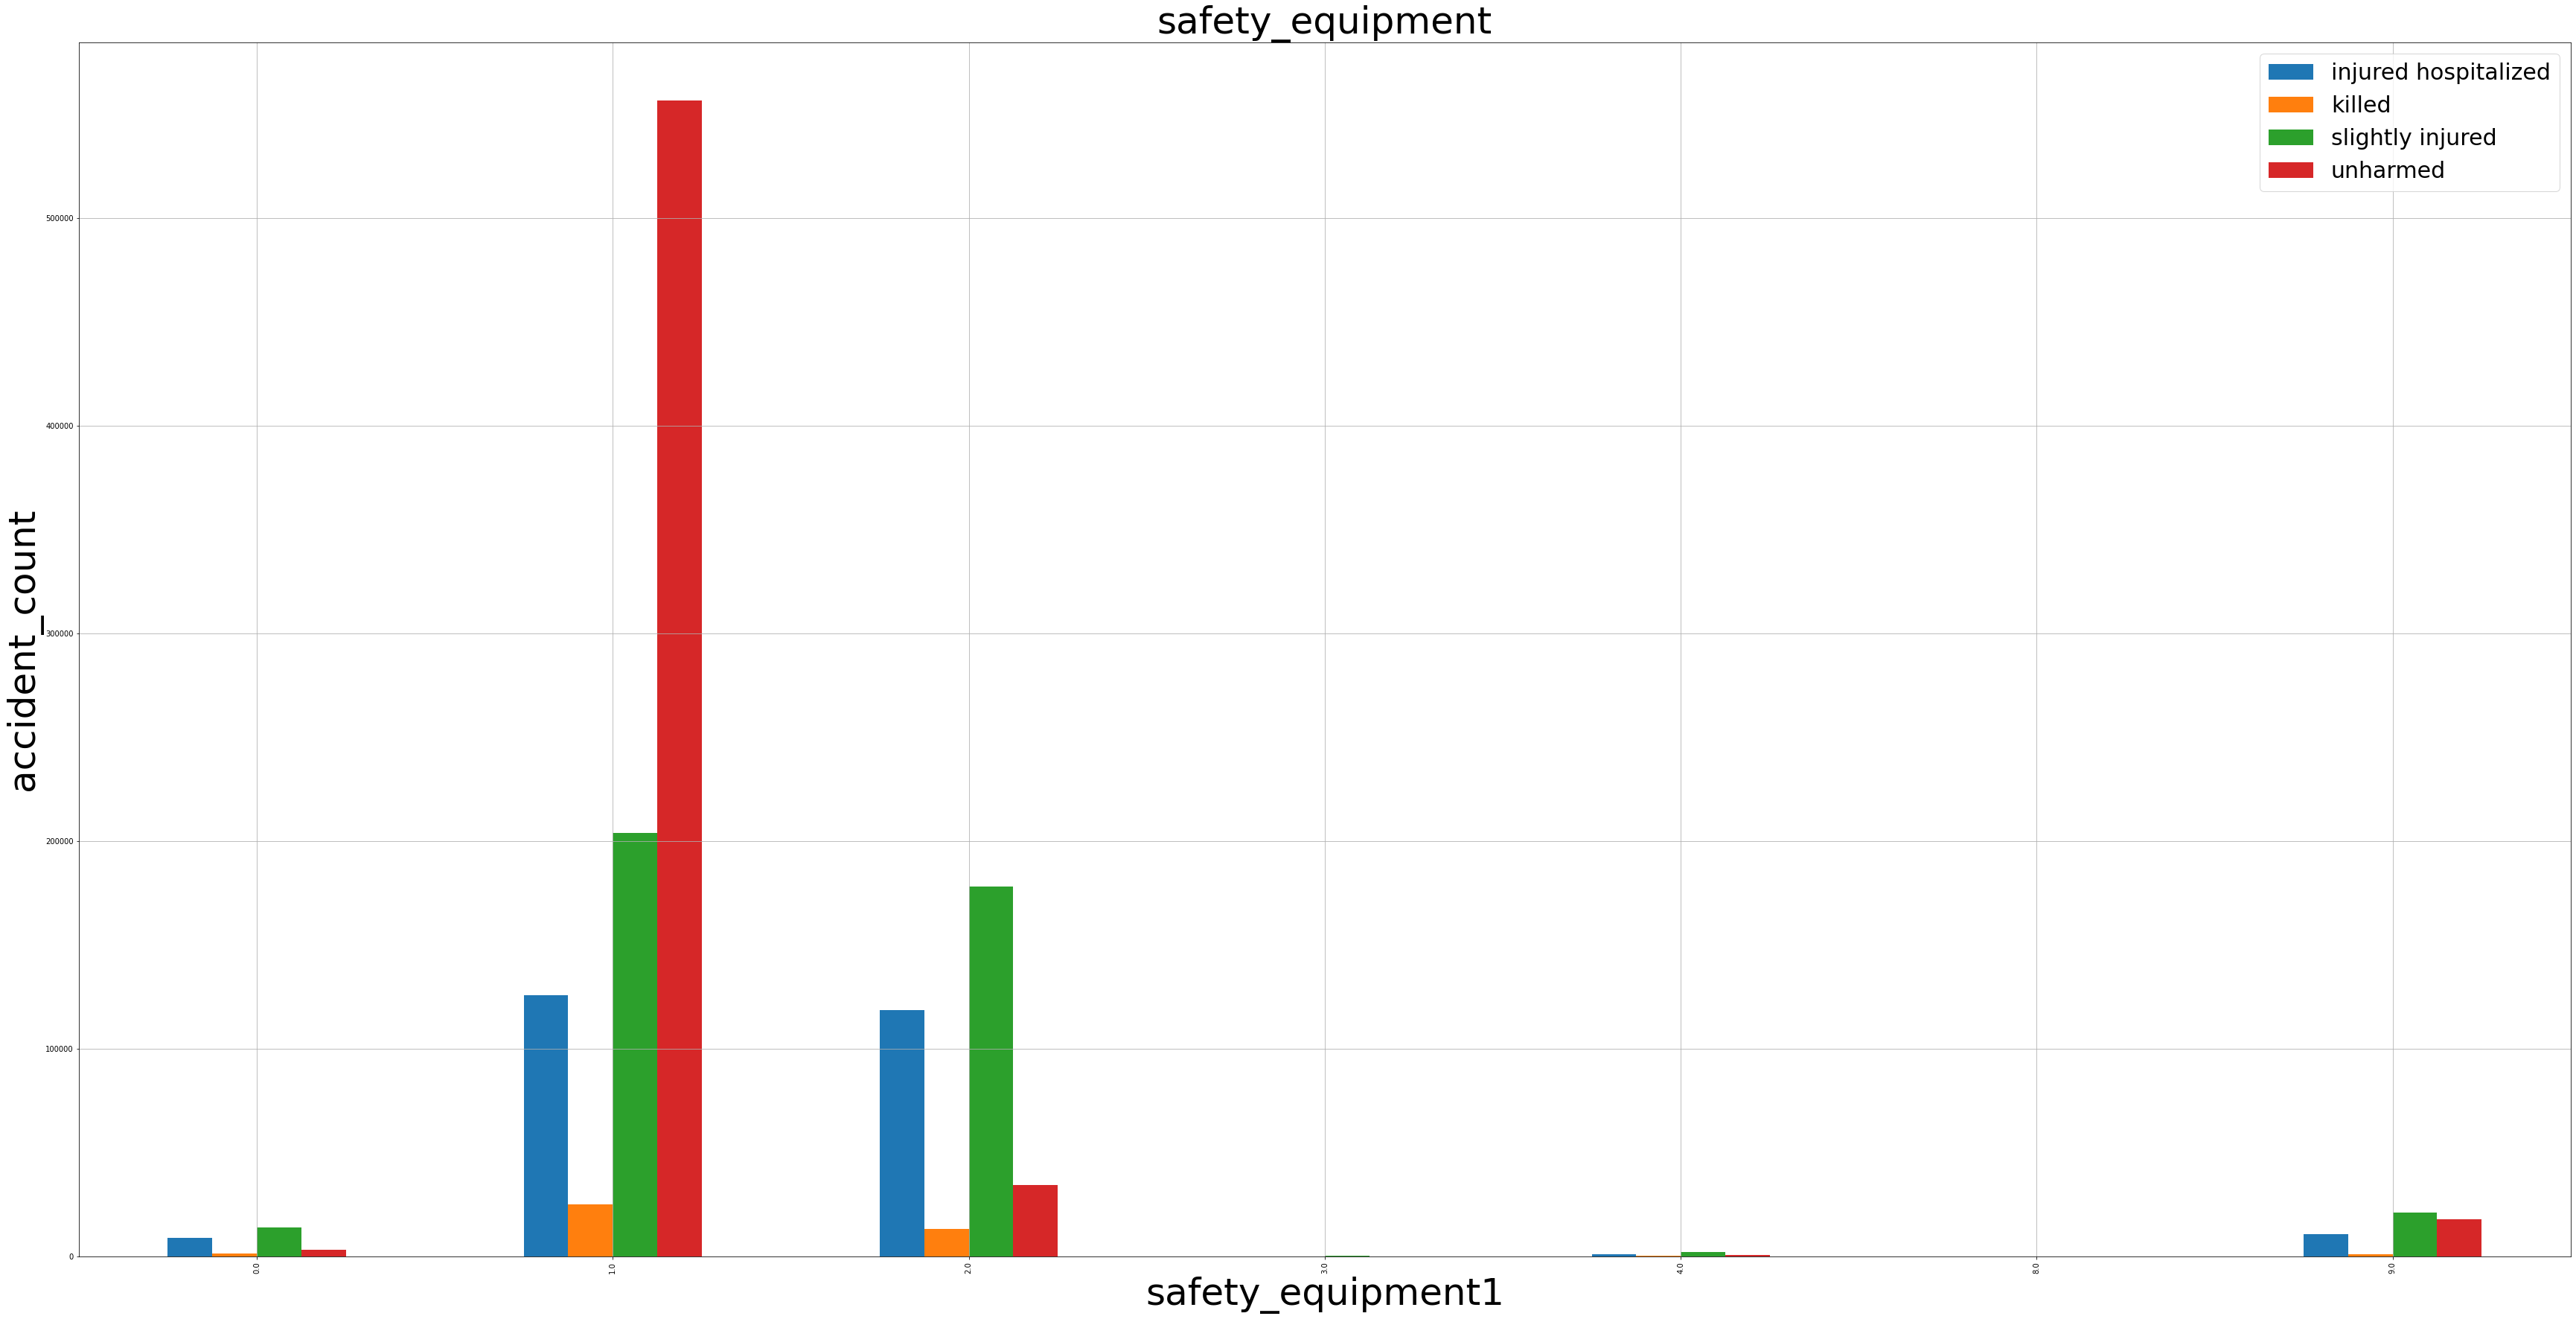

In [73]:
Safety_equipement.plot(kind='bar', stacked=False, figsize=(60, 30), grid= True)
plt.title('safety_equipment', fontsize=50)
plt.xlabel('safety_equipment1', fontsize = 50)
plt.ylabel('accident_count', fontsize = 50)
plt.legend(fontsize =30)


In [74]:
Safety_equipement = pd.crosstab(index = accident_circumstance1['security_equipement_2'], columns = accident_circumstance1['severity_of_user_injury'], values=accident_circumstance1['Num_Acc'], aggfunc=np.count_nonzero)
Safety_equipement

severity_of_user_injury,injured hospitalized,killed,slightly injured,unharmed
security_equipement_2,,,,
0.0,7539.0,869.0,12036.0,2656.0
1.0,209506.0,28305.0,332474.0,505073.0
2.0,17678.0,7425.0,12266.0,7911.0
3.0,30595.0,4222.0,62484.0,97086.0
4.0,NaN,NaN,NaN,1.0
5.0,NaN,NaN,1.0,NaN
6.0,7.0,1.0,17.0,1.0
7.0,NaN,NaN,1.0,NaN
8.0,8.0,1.0,13.0,22.0


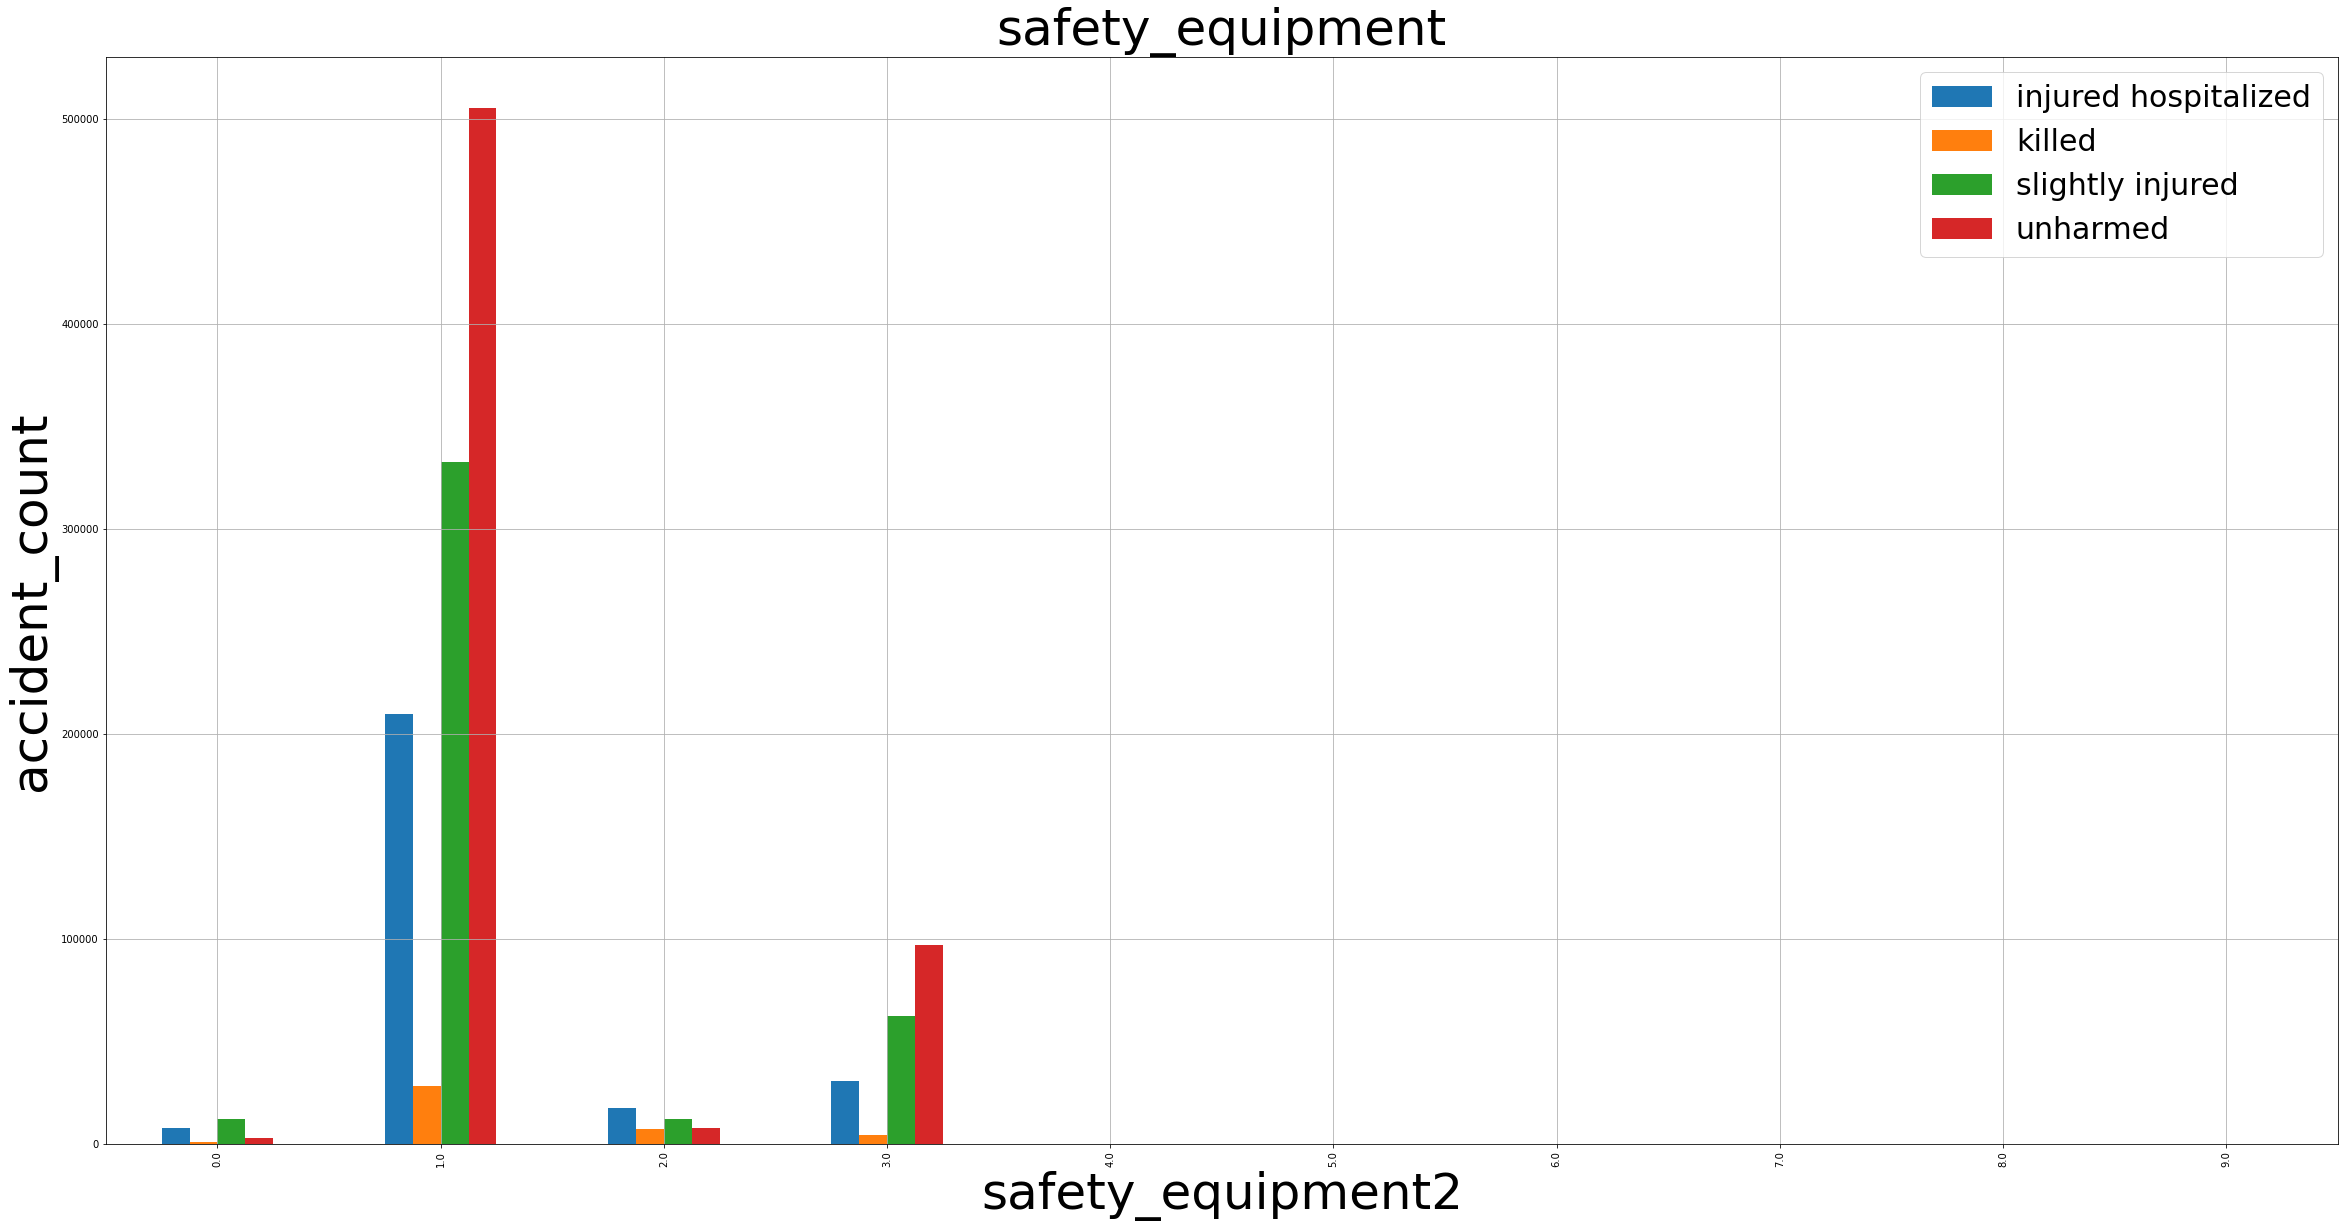

In [75]:
Safety_equipement.plot(kind='bar', stacked=False,figsize=(40, 20), grid= True)
plt.title('safety_equipment', fontsize=50)
plt.xlabel('safety_equipment2', fontsize = 50)
plt.ylabel('accident_count', fontsize = 50)
plt.legend(fontsize =30)


In [76]:
Gender_accident = pd.crosstab(index = accident_circumstance1['severity_of_user_injury'], columns = accident_circumstance1['gender'], values=accident_circumstance1['Num_Acc'], aggfunc=np.count_nonzero)
Gender_accident

gender,Female,Male
severity_of_user_injury,,
injured hospitalized,57921,207412
killed,6108,34715
slightly injured,128277,291016
unharmed,160600,452150


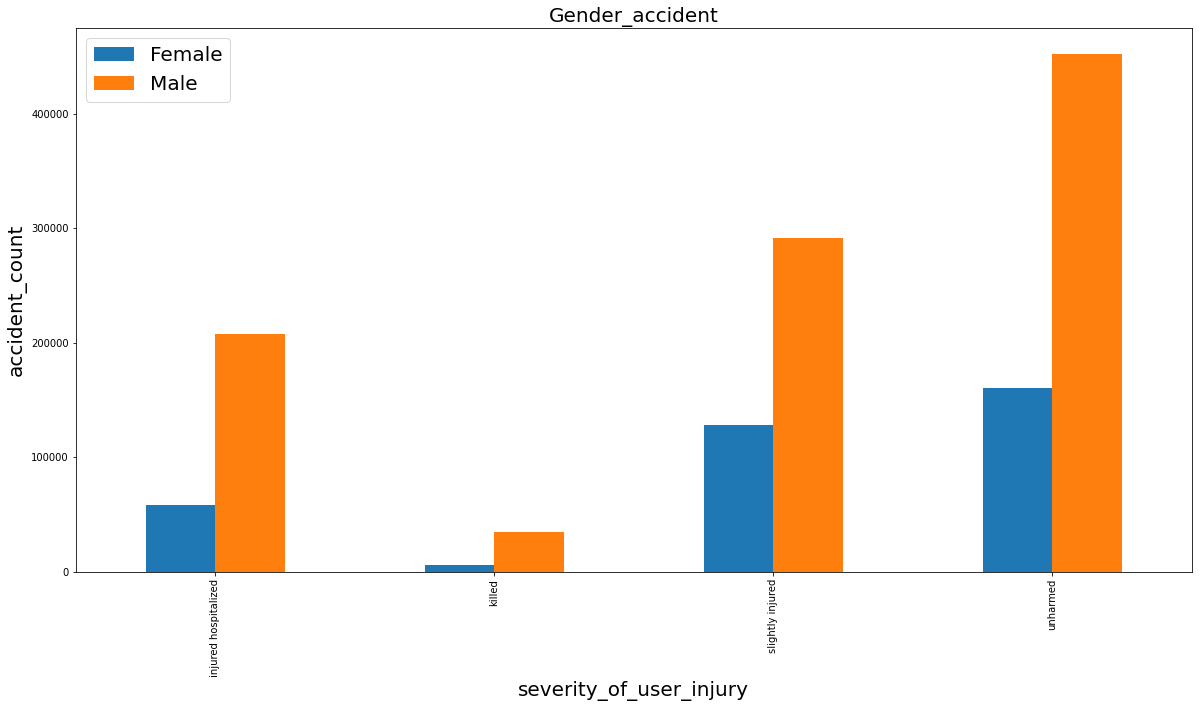

In [77]:
#gender_accident
Gender_accident.plot.bar(figsize=(20, 10))

plt.title('Gender_accident', fontsize=20);
plt.xlabel('severity_of_user_injury', fontsize = 20)
plt.ylabel('accident_count', fontsize = 20)
plt.legend(fontsize =20)


In [78]:
accident_circumstance1['reason_for_travel']= accident_circumstance1['reason_for_travel'].replace(0,'notspecified')
accident_circumstance1['reason_for_travel']= accident_circumstance1['reason_for_travel'].replace(1,'home.work')
accident_circumstance1['reason_for_travel']= accident_circumstance1['reason_for_travel'].replace(2,'home.school')
accident_circumstance1['reason_for_travel']= accident_circumstance1['reason_for_travel'].replace(3,'shopping.shoppig')
accident_circumstance1['reason_for_travel']= accident_circumstance1['reason_for_travel'].replace(4,'professionaluse')
accident_circumstance1['reason_for_travel']= accident_circumstance1['reason_for_travel'].replace(5,'walk.leisure')
accident_circumstance1['reason_for_travel']= accident_circumstance1['reason_for_travel'].replace(9,'other')



In [79]:
travel_reason = pd.crosstab(index = accident_circumstance1['severity_of_user_injury'], columns = accident_circumstance1['reason_for_travel'], values=accident_circumstance1['Num_Acc'], aggfunc=np.count_nonzero)
travel_reason

reason_for_travel,home.school,home.work,notspecified,other,professionaluse,shopping.shoppig,walk.leisure
severity_of_user_injury,,,,,,,
injured hospitalized,4707,42808,44502,19109,13853,7162,133192
killed,423,5480,4521,3561,1849,1332,23657
slightly injured,9216,77422,96678,33312,36792,7564,158309
unharmed,8089,85772,125616,48294,100511,20116,224352


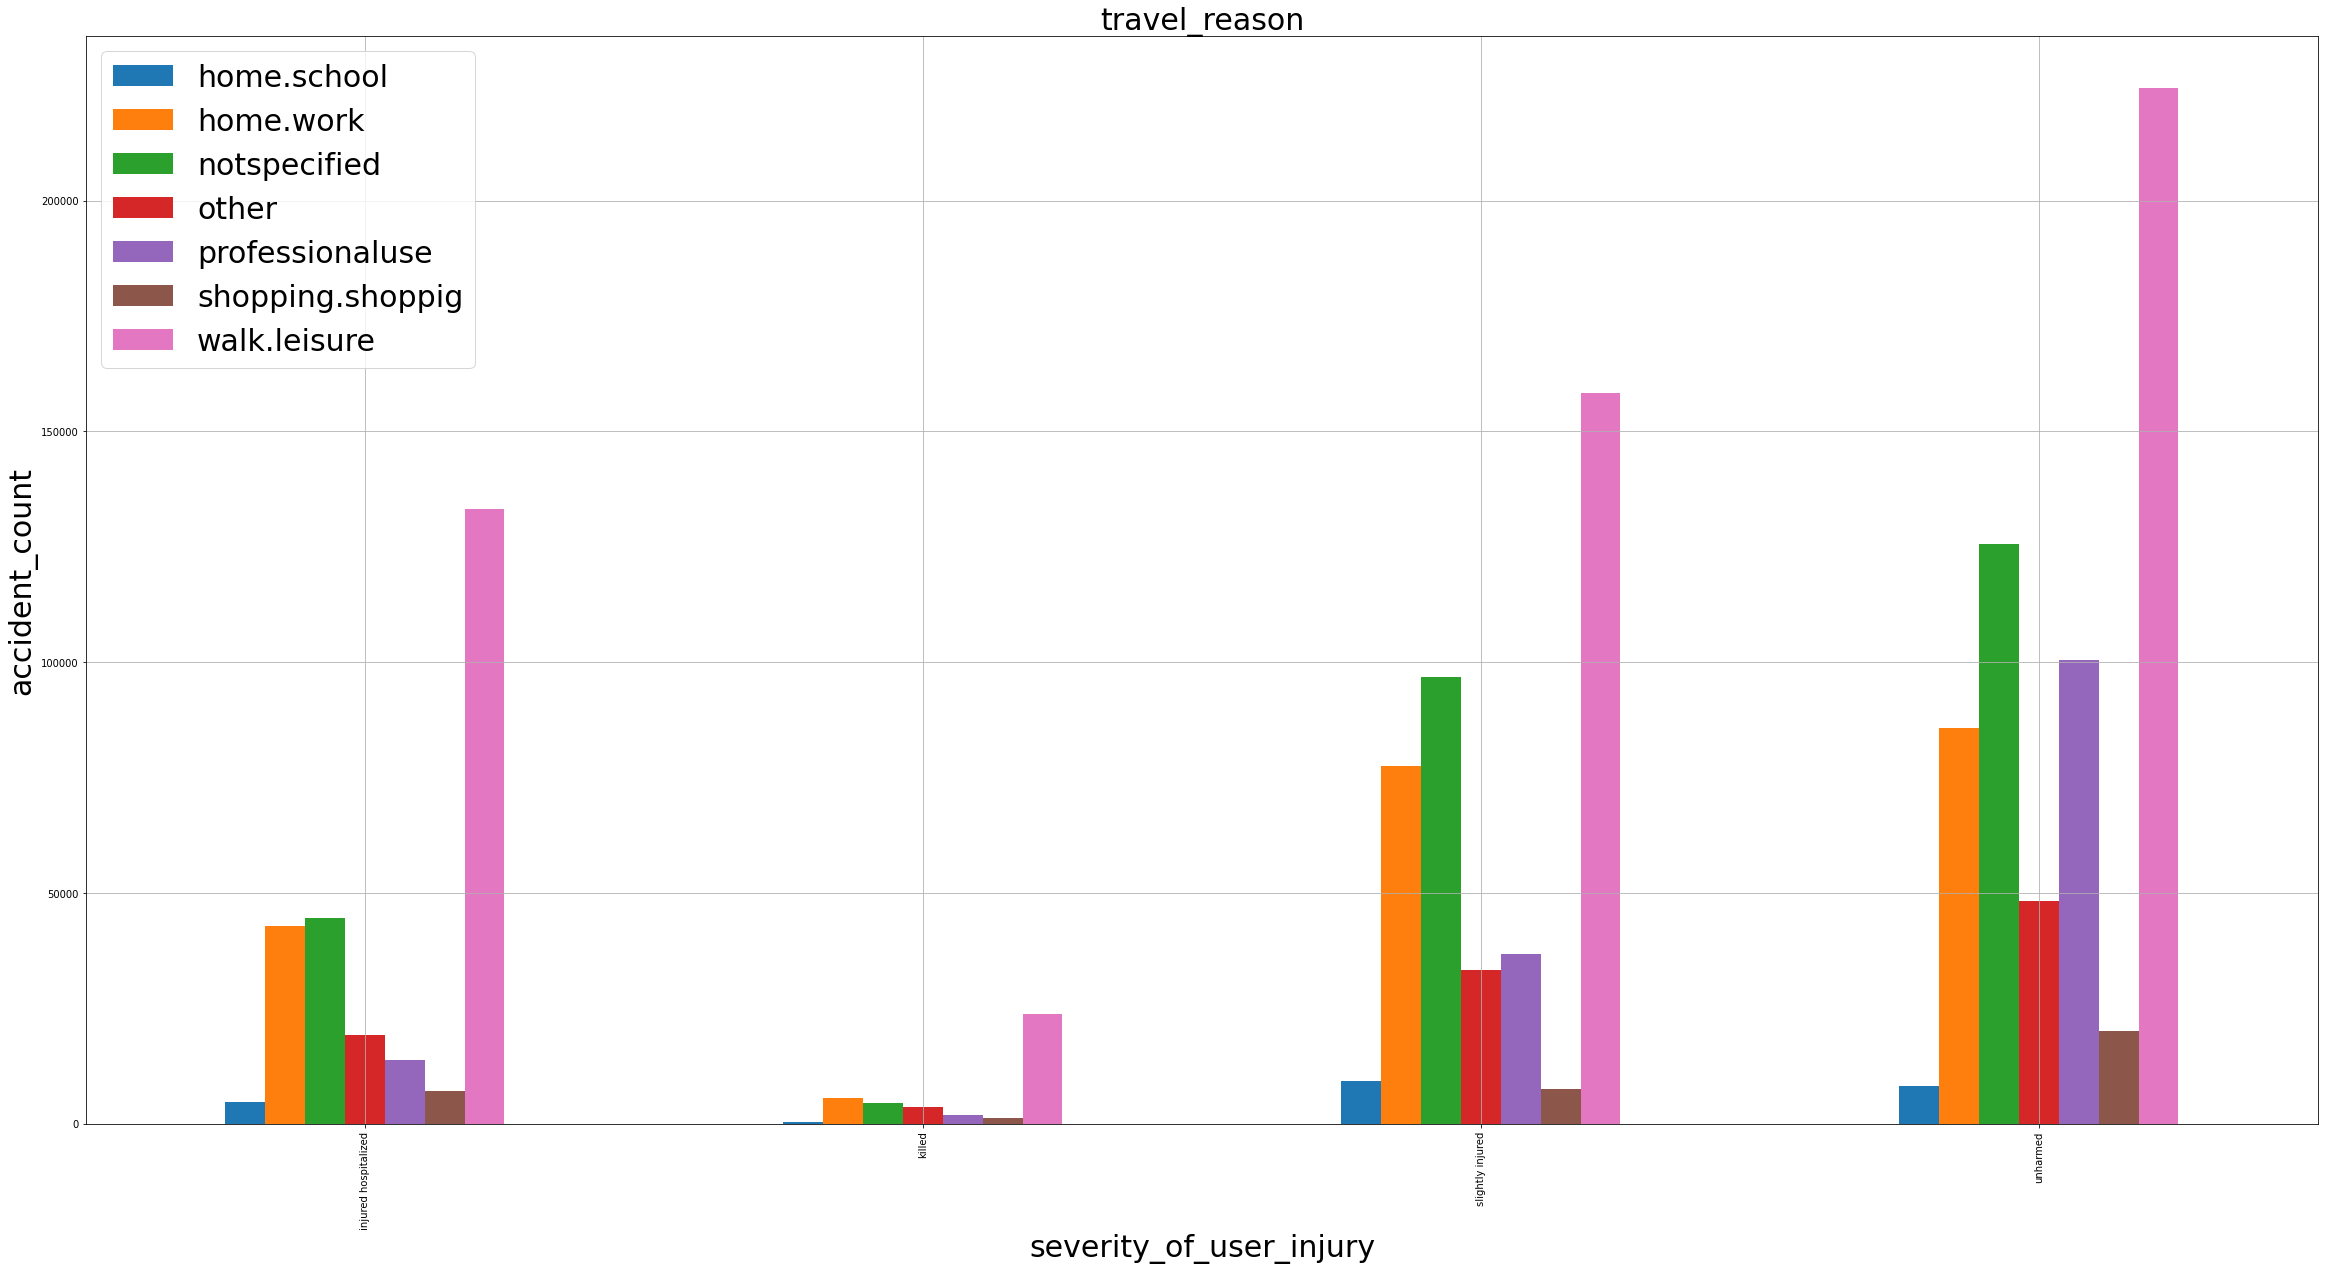

In [80]:

travel_reason.plot(kind='bar', stacked=False,figsize=(40, 20), grid= True)

plt.title('travel_reason', fontsize=30);
plt.xlabel('severity_of_user_injury', fontsize = 30)
plt.ylabel('accident_count', fontsize = 30)
plt.legend(fontsize =30)

In [81]:
acc_mnthday = accident_circumstance1.groupby(['accident_month', 'accident_day'], as_index = False)['Num_Acc'].count()
acc_mnthdaydf = pd.DataFrame(acc_mnthday)
acc_mnthdaydf.to_csv('acc_mnthdaydf.csv', encoding='utf-8')
acc_mnthdaydf = pd.read_csv('acc_mnthdaydf.csv') 
acc_mnthdaydf

,Unnamed: 0,accident_month,accident_day,Num_Acc
0,0,1,1,2379
1,1,1,2,2409
2,2,1,3,2759
3,3,1,4,3080
4,4,1,5,3241
...,...,...,...,...
361,361,12,27,2521
362,362,12,28,2540
363,363,12,29,2457
364,364,12,30,2401


In [82]:
holiday_patterns['Accident_Count'] = 0

for i in range(len(holiday_patterns.index)):
#     count = 0
    for j in range(len(acc_mnthdaydf.index)):
        if holiday_patterns['month'][i] == acc_mnthdaydf['accident_month'][j]  and holiday_patterns['day'][i] == acc_mnthdaydf['accident_day'][j]:
            holiday_patterns['Accident_Count'][i]= acc_mnthdaydf['Num_Acc']



holiday_patterns        

<ipython-input-82-790b73898b64>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  holiday_patterns['Accident_Count'][i]= acc_mnthdaydf['Num_Acc']
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,date,month,day,year,holiday,Accident_Count
0,1/1/2005,1,1,2005,New year,2379
1,3/28/2005,3,28,2005,Easter Monday,2409
2,5/1/2005,5,1,2005,Labour Day,2759
3,5/5/2005,5,5,2005,Ascension Thursday,3080
4,5/8/2005,5,8,2005,Victory in Europe Day,3241
...,...,...,...,...,...,...
127,7/14/2016,7,14,2016,Bastille Day,3674
128,8/15/2016,8,15,2016,Assumption of Mary to Heaven,3001
129,11/1/2016,11,1,2016,All Saints Day,3553
130,11/11/2016,11,11,2016,Armistice Day,3497


<AxesSubplot:xlabel='holiday'>

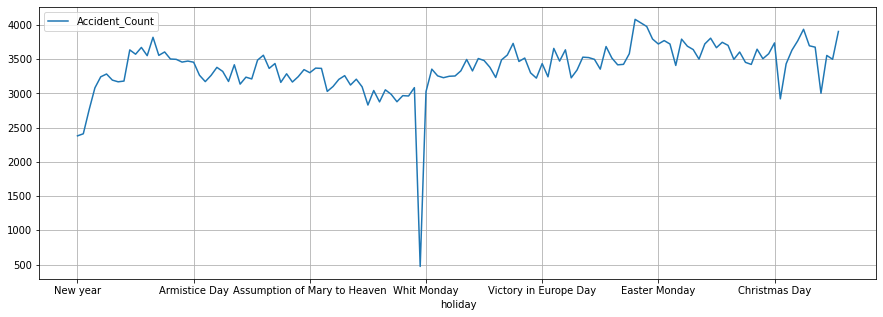

In [83]:
holiday_patterns.plot('holiday', 'Accident_Count', figsize = (15,5), grid= True)

In [84]:
#Mean of each columns in relation to gender, .
monthday_accident = pd.crosstab(index = accident_circumstance1['accident_month'], columns = accident_circumstance1['accident_day'], values=accident_circumstance1['Num_Acc'], aggfunc=np.count_nonzero)
monthday_accident

accident_day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
accident_month,,,,,,,,,,,,,,,,,,,,,
1,2379.0,2409.0,2759.0,3080.0,3241.0,3282.0,3193.0,3168.0,3179.0,3634.0,...,3264.0,3171.0,3262.0,3379.0,3320.0,3173.0,3417.0,3134.0,3236.0,3210.0
2,3485.0,3556.0,3364.0,3435.0,3160.0,3285.0,3165.0,3243.0,3346.0,3301.0,...,2875.0,3051.0,2986.0,2877.0,2966.0,2961.0,3083.0,472.0,NaN,NaN
3,3025.0,3353.0,3255.0,3228.0,3249.0,3253.0,3328.0,3494.0,3327.0,3508.0,...,3241.0,3656.0,3471.0,3635.0,3226.0,3340.0,3528.0,3522.0,3496.0,3353.0
4,3683.0,3515.0,3416.0,3423.0,3578.0,4080.0,4028.0,3976.0,3793.0,3720.0,...,3700.0,3496.0,3603.0,3452.0,3422.0,3644.0,3505.0,3578.0,3736.0,NaN
5,2919.0,3430.0,3630.0,3767.0,3935.0,3694.0,3674.0,3001.0,3553.0,3497.0,...,3821.0,4009.0,3937.0,4042.0,3886.0,3958.0,3989.0,3911.0,3960.0,3892.0
6,3875.0,3997.0,3895.0,4073.0,3873.0,4088.0,3982.0,4217.0,4075.0,4327.0,...,4505.0,4194.0,4461.0,4323.0,4341.0,4295.0,4215.0,4378.0,4395.0,NaN
7,4382.0,4286.0,4252.0,4328.0,4388.0,4342.0,4329.0,4028.0,3998.0,3949.0,...,3531.0,3568.0,3467.0,3524.0,3510.0,3480.0,3567.0,3542.0,3446.0,3495.0
8,3472.0,3440.0,3382.0,3365.0,3389.0,3246.0,3156.0,3266.0,2922.0,3207.0,...,3325.0,3296.0,3228.0,3329.0,3238.0,3213.0,3339.0,3329.0,3548.0,3781.0
9,3821.0,3733.0,3799.0,3828.0,3866.0,3886.0,4195.0,4236.0,4170.0,3975.0,...,4339.0,4389.0,4286.0,3957.0,4156.0,4258.0,4337.0,4368.0,4314.0,NaN


<AxesSubplot:xlabel='accident_month'>

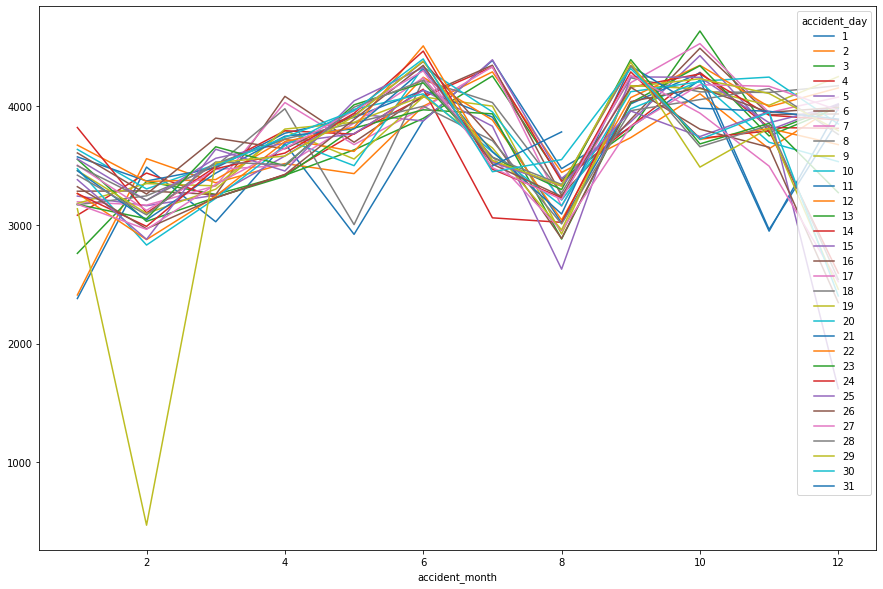

In [85]:
monthday_accident.plot(figsize = (15,10))

In [86]:
# pd.pivot_table(accident_circumstance1, index='accident_year', columns=['surface_condition', 'traffic_regime', 'total_number_of_traffic_lanes', 'road_gradient', 
#                                                                        'accident_situation', 'reason_for_travel', 'security_equipement_1', 'security_equipement_2', 
#                                                                     'fixed_obstacle_struck', 'movable_obstacle_struck', 'Initial_shock_point'], values='Num_Acc', aggfunc='count', fill_value=0)

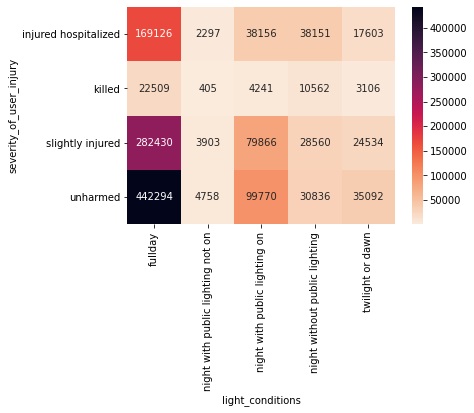

In [87]:
crs=pd.crosstab(index = accident_circumstance1['severity_of_user_injury'], columns = accident_circumstance1['light_conditions'], values=accident_circumstance1['Num_Acc'], aggfunc=np.count_nonzero)
# Determing what dataset are ordinal and discrete. 
sns.heatmap(crs, cmap='rocket_r', annot=True, fmt='g');

# grav
# Severity of user injury, injured users are classified into three categories of
# victims plus unharmed:
# 	1. Unharmed
# 	2. Killed
# 	3. Injured hospitalized
# 	4. Slightly injured 


# lum
# Light: lighting conditions in which the accident occurred:
# 	1. Full day
# 	2. Twilight or dawn
# 	3. Night without public lighting
# 	4. Night with public lighting not on
# 	5. Night with public lighting on